In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("hotel_bookings.csv")

In [3]:
df.sample(5)

hotel is_canceled  lead_time  arrival_date_year  \
15731  Resort Hotel          no         67               2015   
5645   Resort Hotel         yes         75               2016   
91570    City Hotel          no         92               2016   
83036    City Hotel          no         25               2016   
96560    City Hotel          no         23               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
15731               July                        31                         31   
5645                 May                        19                          7   
91570               June                        26                         20   
83036            January                         3                         12   
96560             August                        36                         31   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
15731                        0                     1       2  ...   
5645                         2                     5       2  ...   
91570                        1                     3       2  ...   
83036                        0                     3       2  ...   
96560                        0                     4       2  ...   

       deposit_type  agent company days_in_waiting_list customer_type     adr  \
15731    No Deposit  241.0     NaN                    0     Transient   88.55   
5645     No Deposit  240.0     NaN                    0     Transient   88.00   
91570    No Deposit   11.0     NaN                    0     Transient   81.95   
83036    No Deposit   27.0     NaN                    0     Transient   40.67   
96560    No Deposit    9.0     NaN                    0     Transient  110.00   

       required_car_parking_spaces  total_of_special_requests  \
15731                            1                          1   
5645                             0                          1   
91570                            0                          0   
83036                            0                          0   
96560                            0                          2   

       reservation_status reservation_status_date  
15731           Check-Out                8/1/2015  
5645             Canceled               3/14/2016  
91570           Check-Out               6/24/2016  
83036           Check-Out               1/15/2016  
96560           Check-Out                9/4/2016  

[5 rows x 32 columns]

Data Description:
hotel : Hotel(Resort Hotel or City Hotel)

is_canceled : Value indicating if the booking was canceled (1) or not (0)

lead_time :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

arrival_date_year : Year of arrival date

arrival_date_month : Month of arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults : Number of adults

children : Number of children

babies : Number of babies

meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

country : Country of origin.`

market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type : Code for the type of room assigned to the booking.

booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type : Indication on if the customer made a deposit to guarantee the booking.

agent : ID of the travel agency that made the booking

company : ID of the company/entity that made the booking or responsible for paying the booking.

days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type : Type of booking, assuming one of four categories

adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests :* Number of special requests made by the customer (e.g. twin bed or high floor)*

reservation_status : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why
reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  119390.000000      119390.000000             119390.000000   
mean      104.011416        2016.156554                 27.165173   
std       106.863097           0.707476                 13.605138   
min         0.000000        2015.000000                  1.000000   
25%        18.000000        2016.000000                 16.000000   
50%        69.000000        2016.000000                 28.000000   
75%       160.000000        2017.000000                 38.000000   
max       737.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119390.000000            119390.000000   
mean                   15.798241                 0.927599   
std                     8.780829                 0.998613   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                19.000000   

       stays_in_week_nights         adults       children         babies  \
count         119390.000000  119390.000000  119386.000000  119390.000000   
mean               2.500302       1.856403       0.103890       0.007949   
std                1.908286       0.579261       0.398561       0.097436   
min                0.000000       0.000000       0.000000       0.000000   
25%                1.000000       2.000000       0.000000       0.000000   
50%                2.000000       2.000000       0.000000       0.000000   
75%                3.000000       2.000000       0.000000       0.000000   
max               50.000000      55.000000      10.000000      10.000000   

       is_repeated_guest  previous_cancellations  \
count      119390.000000           119390.000000   
mean            0.031912                0.087118   
std             0.175767                0.844336   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes          agent  \
count                   119390.000000    119390.000000  103050.000000   
mean                         0.137097         0.221124      86.693382   
std                          1.497437         0.652306     110.774548   
min                          0.000000         0.000000       1.000000   
25%                          0.000000         0.000000       9.000000   
50%                          0.000000         0.000000      14.000000   
75%                          0.000000         0.000000     229.000000   
max                         72.000000        21.000000     535.000000   

           company  days_in_waiting_list            adr  \
count  6797.000000         119390.000000  119390.000000   
mean    189.266735              2.321149     101.831122   
std     131.655015             17.594721      50.535790   
min       6.000000              0.000000      -6.380000   
25%      62.000000              0.000000      69.290000   
50%     179.000000              0.000000      94.575000   
75%     270.000000              0.000000     126.000000   
max     543.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                119390.000000              119390.000000  
mean                      0.062518                   0.571363  
std                       0.245291                   0.792798  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000             

In [7]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

<AxesSubplot:>

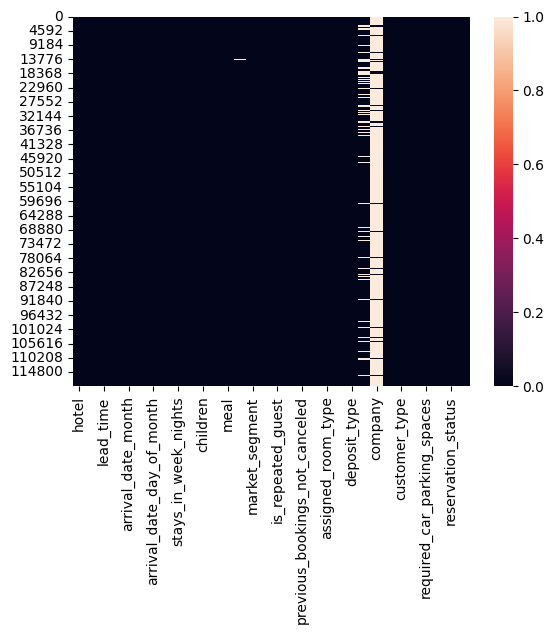

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.duplicated().sum()

31994

In [10]:
df1=df.drop_duplicates()

In [11]:
df.duplicated().sum()

31994

In [12]:
df.shape,df1.shape

((119390, 32), (87396, 32))

In [13]:
df1.describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  87396.000000       87396.000000              87396.000000   
mean      79.891368        2016.210296                 26.838334   
std       86.052325           0.686102                 13.674572   
min        0.000000        2015.000000                  1.000000   
25%       11.000000        2016.000000                 16.000000   
50%       49.000000        2016.000000                 27.000000   
75%      125.000000        2017.000000                 37.000000   
max      737.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               87396.000000             87396.000000   
mean                   15.815541                 1.005263   
std                     8.835146                 1.031921   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                19.000000   

       stays_in_week_nights        adults      children        babies  \
count          87396.000000  87396.000000  87392.000000  87396.000000   
mean               2.625395      1.875795      0.138640      0.010824   
std                2.053584      0.626500      0.455881      0.113597   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      2.000000      0.000000      0.000000   
50%                2.000000      2.000000      0.000000      0.000000   
75%                4.000000      2.000000      0.000000      0.000000   
max               50.000000     55.000000     10.000000     10.000000   

       is_repeated_guest  previous_cancellations  \
count       87396.000000            87396.000000   
mean            0.039075                0.030413   
std             0.193775                0.369145   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    87396.000000     87396.000000  75203.000000   
mean                         0.183990         0.271603     94.138306   
std                          1.731894         0.727245    113.188172   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000     14.000000   
75%                          0.000000         0.000000    240.000000   
max                         72.000000        21.000000    535.000000   

           company  days_in_waiting_list           adr  \
count  5259.000000          87396.000000  87396.000000   
mean    183.081384              0.749565    106.337246   
std     130.557608             10.015731     55.013953   
min       6.000000              0.000000     -6.380000   
25%      47.000000              0.000000     72.000000   
50%     169.000000              0.000000     98.100000   
75%     263.000000              0.000000    134.000000   
max     543.000000            391.000000   5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 87396.000000               87396.000000  
mean                      0.084226                   0.698567  
std                       0.281533                   0.831946  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000                   1.000000  
max                       8.000000  

In [14]:
df1.corr()

lead_time  arrival_date_year  \
lead_time                        1.000000           0.139135   
arrival_date_year                0.139135           1.000000   
arrival_date_week_number         0.101150          -0.514228   
arrival_date_day_of_month        0.009866          -0.010023   
stays_in_weekend_nights          0.235145           0.005144   
stays_in_week_nights             0.310129           0.003645   
adults                           0.140493           0.038619   
children                         0.028638           0.041137   
babies                          -0.003614          -0.023334   
is_repeated_guest               -0.147003           0.024343   
previous_cancellations           0.005375          -0.054212   
previous_bookings_not_canceled  -0.078931           0.027256   
booking_changes                  0.077028           0.008604   
agent                            0.023698          -0.020110   
company                          0.143630           0.250194   
days_in_waiting_list             0.132152          -0.027939   
adr                              0.023564           0.176088   
required_car_parking_spaces     -0.086541          -0.039807   
total_of_special_requests        0.034240           0.064268   

                                arrival_date_week_number  \
lead_time                                       0.101150   
arrival_date_year                              -0.514228   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.093594   
stays_in_weekend_nights                         0.026868   
stays_in_week_nights                            0.027801   
adults                                          0.024362   
children                                        0.013456   
babies                                          0.014260   
is_repeated_guest                              -0.036860   
previous_cancellations                          0.007199   
previous_bookings_not_canceled                 -0.020819   
booking_changes                                 0.011902   
agent                                           0.017685   
company                                        -0.093838   
days_in_waiting_list                            0.013843   
adr                                             0.098279   
required_car_parking_spaces                     0.008946   
total_of_special_requests                       0.046599   

                                arrival_date_day_of_month  \
lead_time                                        0.009866   
arrival_date_year                               -0.010023   
arrival_date_week_number                         0.093594   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.017803   
stays_in_week_nights                            -0.028190   
adults                                          -0.001125   
children                                         0.015807   
babies                                          -0.000393   
is_repeated_guest                               -0.004178   
previous_cancellations                          -0.008538   
previous_bookings_not_canceled                   0.000152   
booking_changes                                  0.006307   
agent                                            0.008830   
company                                          0.031916   
days_in_waiting_list                             0.006588   
adr                                              0.022591   
required_car_parking_spaces                      0.009167   
total_of_special_requests                       -0.001651   

                                stays_in_weekend_nights  stays_in_week_nights  \
lead_time                                      0.235145              0.310129   
arrival_date_year                              0.005144              0.003645   
arrival_date_week_number                       0.026868              0.027801   
arriv

<AxesSubplot:>

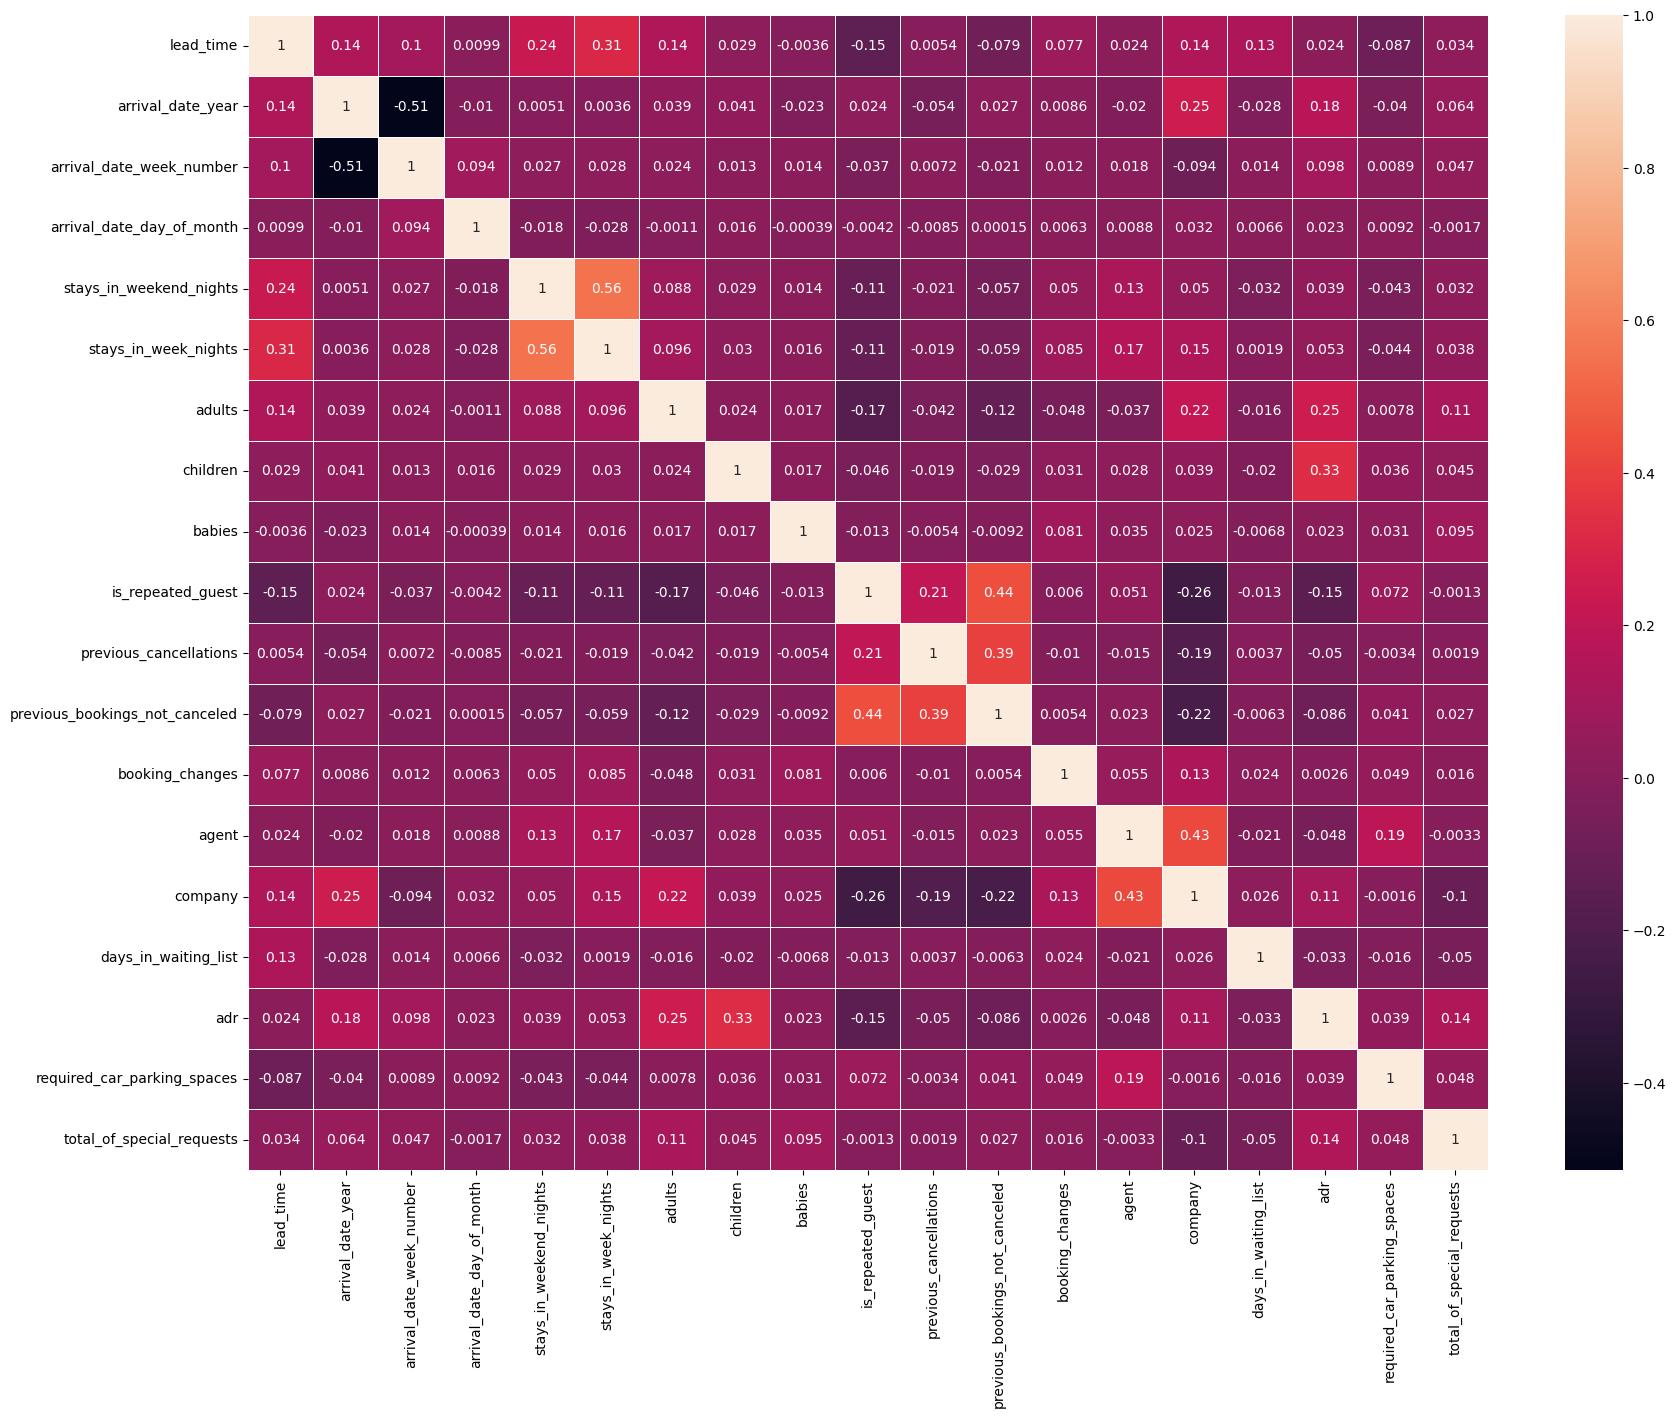

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidth=0.5,annot=True)

In [16]:
df1.select_dtypes(include='object')

hotel is_canceled arrival_date_month meal country  \
0       Resort Hotel          no               July   BB     PRT   
1       Resort Hotel          no               July   BB     PRT   
2       Resort Hotel          no               July   BB     GBR   
3       Resort Hotel          no               July   BB     GBR   
4       Resort Hotel          no               July   BB     GBR   
...              ...         ...                ...  ...     ...   
119385    City Hotel          no             August   BB     BEL   
119386    City Hotel          no             August   BB     FRA   
119387    City Hotel          no             August   BB     DEU   
119388    City Hotel          no             August   BB     GBR   
119389    City Hotel          no             August   HB     DEU   

       market_segment distribution_channel reserved_room_type  \
0              Direct               Direct                  C   
1              Direct               Direct                  C   
2              Direct               Direct                  A   
3           Corporate            Corporate                  A   
4           Online TA                TA/TO                  A   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  A   
119386      Online TA                TA/TO                  E   
119387      Online TA                TA/TO                  D   
119388      Online TA                TA/TO                  A   
119389      Online TA                TA/TO                  A   

       assigned_room_type deposit_type customer_type reservation_status  \
0                       C   No Deposit     Transient          Check-Out   
1                       C   No Deposit     Transient          Check-Out   
2                       C   No Deposit     Transient          Check-Out   
3                       A   No Deposit     Transient          Check-Out   
4                       A   No Deposit     Transient          Check-Out   
...                   ...          ...           ...                ...   
119385                  A   No Deposit     Transient          Check-Out   
119386                  E   No Deposit     Transient          Check-Out   
119387                  D   No Deposit     Transient          Check-Out   
119388                  A   No Deposit     Transient          Check-Out   
119389                  A   No Deposit     Transient          Check-Out   

       reservation_status_date  
0                     7/1/2015  
1                     7/1/2015  
2                     7/2/2015  
3                     7/2/2015  
4                     7/3/2015  
...                        ...  
119385                9/6/2017  
119386                9/7/2017  
119387                9/7/2017  
119388                9/7/2017  
119389                9/7/2017  

[87396 rows x 13 columns]

In [17]:
df1.select_dtypes(include=['int','float'])

lead_time  arrival_date_year  arrival_date_week_number  \
0             342               2015                        27   
1             737               2015                        27   
2               7               2015                        27   
3              13               2015                        27   
4              14               2015                        27   
...           ...                ...                       ...   
119385         23               2017                        35   
119386        102               2017                        35   
119387         34               2017                        35   
119388        109               2017                        35   
119389        205               2017                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
0                          0       2       0.0       0                  0   
1                          0       2       0.0       0                  0   
2                          1       1       0.0       0                  0   
3                          1       1       0.0       0                  0   
4                          2       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
119385                     5       2       0.0       0                  0   
119386                     5       3       0.0       0                  0   
119387                     5       2       0.0       0                  0   
119388                     5       2       0.0       0                  0   
119389                     7       2       0.0       0                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   
...                        ...                             ...   
119385                       0                               0   
119386                       0                               0   
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

        booking_changes  agent  company  days_in_waiting_list     adr  \
0                     3    NaN      NaN                     0    0.00   
1                     4    NaN      NaN                     0    0.00   
2                     0    NaN      NaN                     0   75.00   
3                     0  304.0      NaN                     0   75.00   
4                     0  240.0      NaN                     0   98.00   
...                 ...    ...      ...                   ...     ...   
119385                0  394.0      NaN                     0   96.14   
119386                0    9.0      NaN                     0  225.43   
119387                0    9.0      NaN                     0  157.71   
119388                

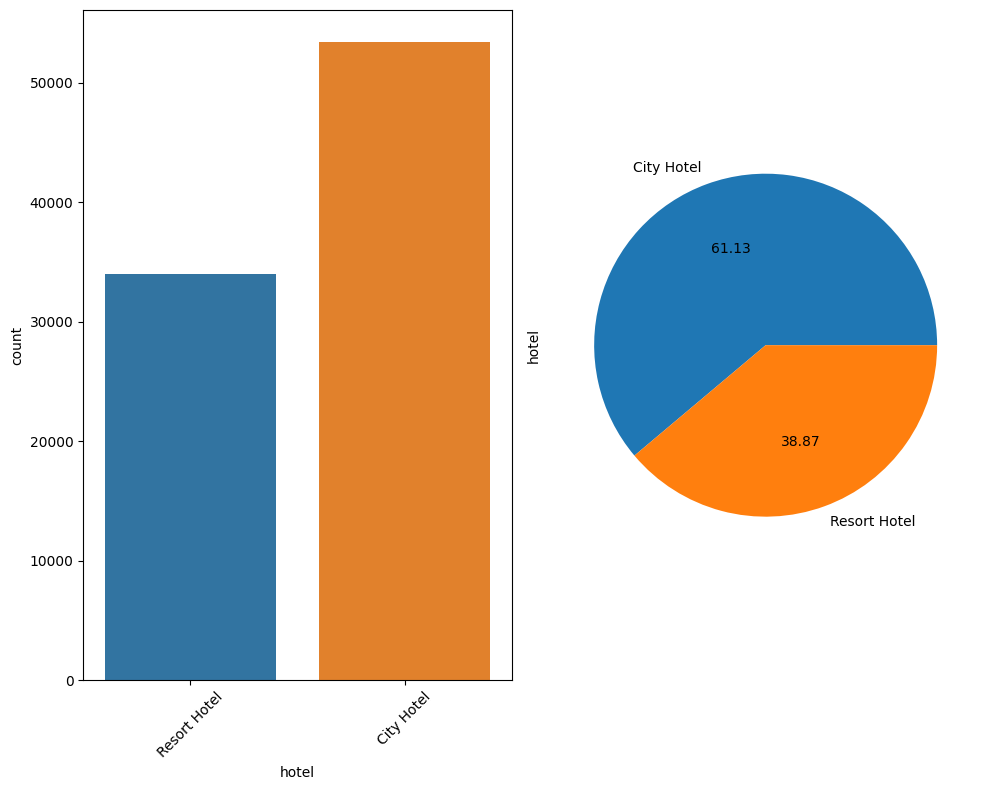

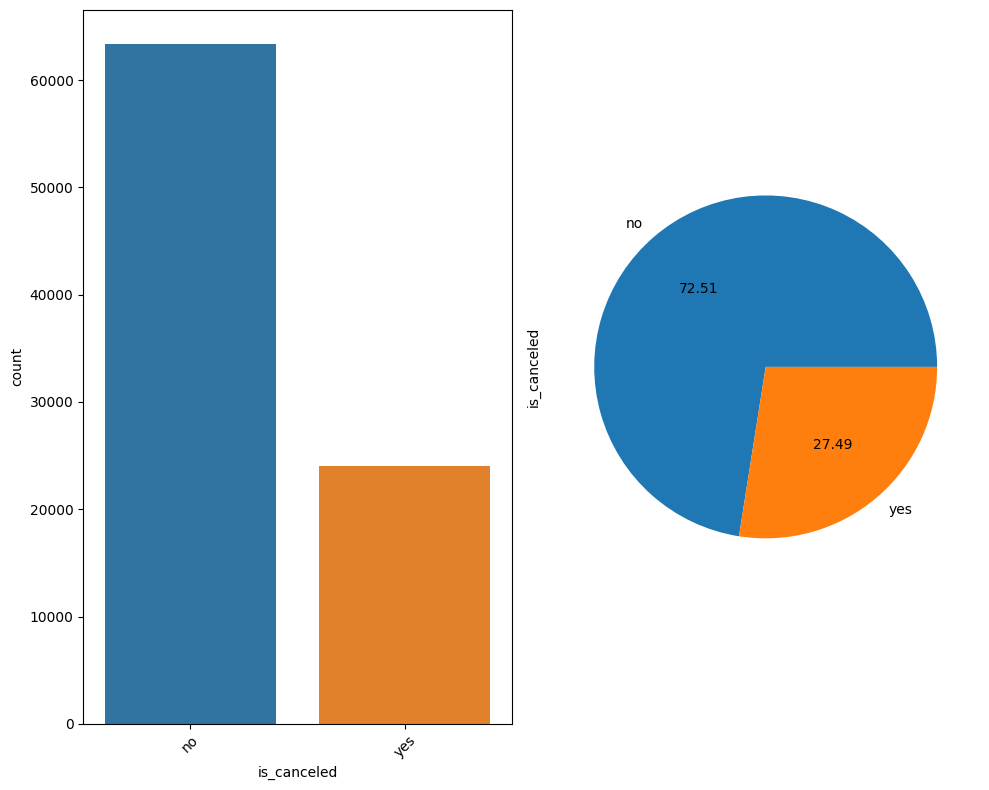

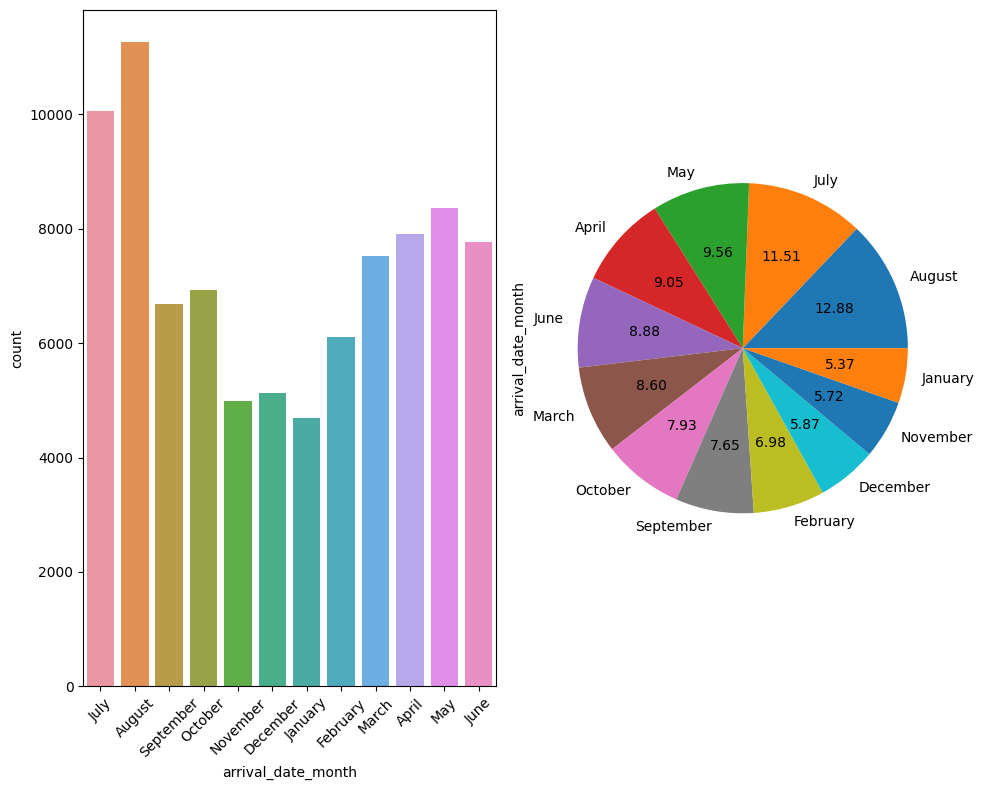

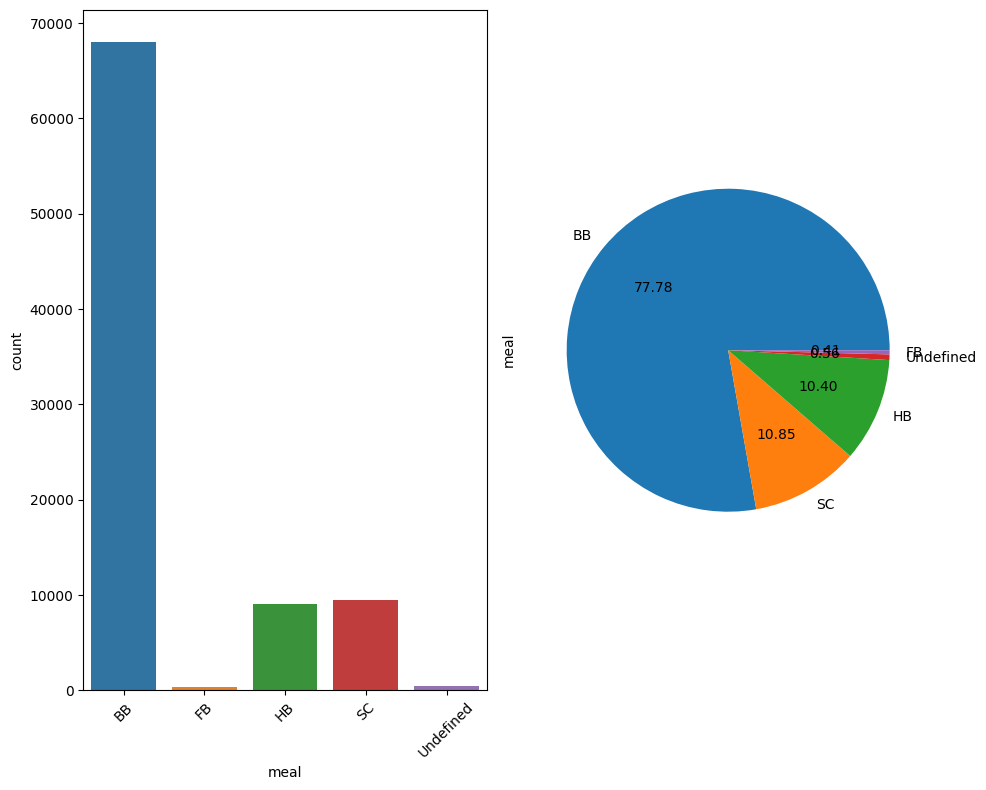

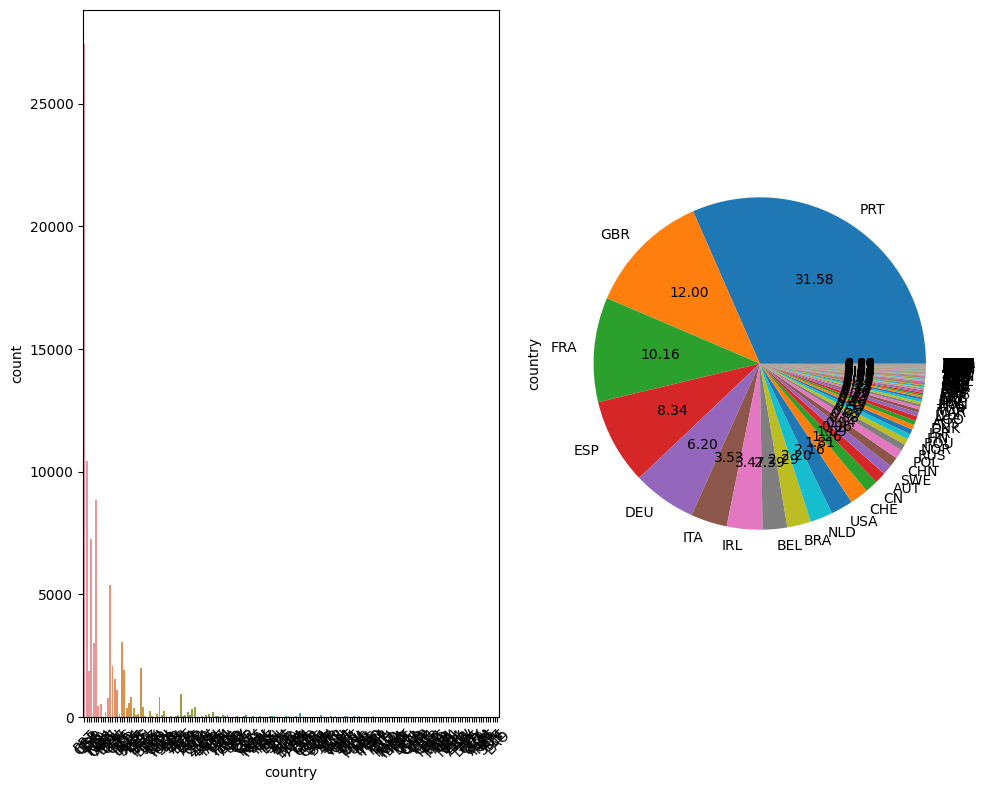

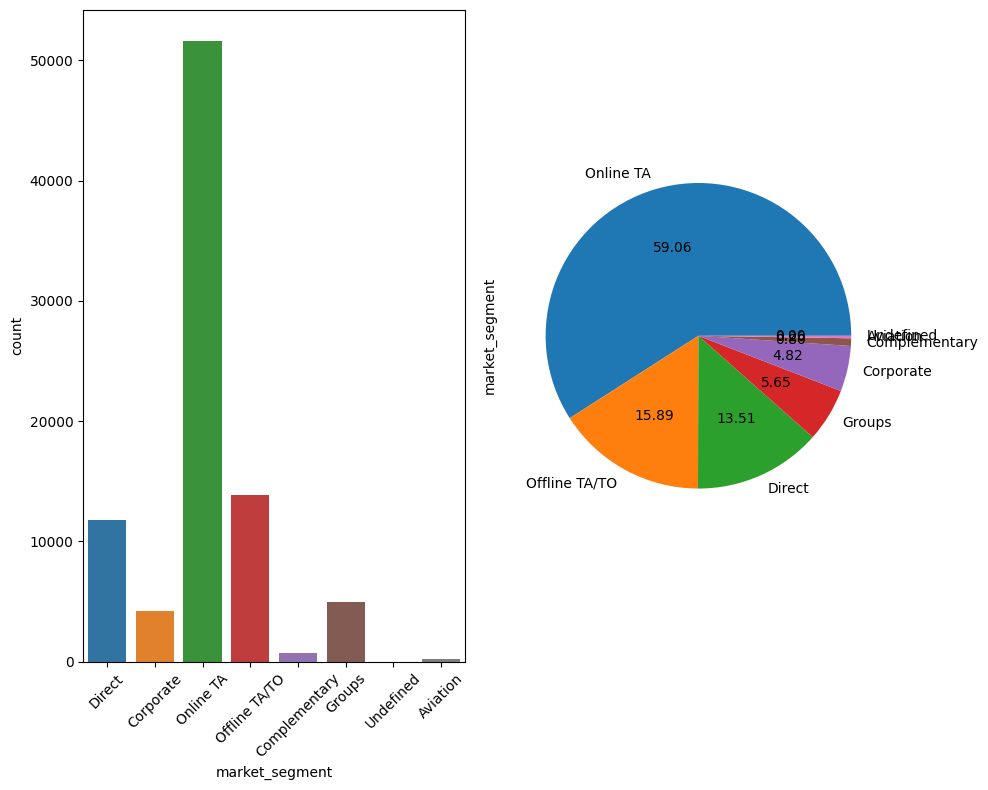

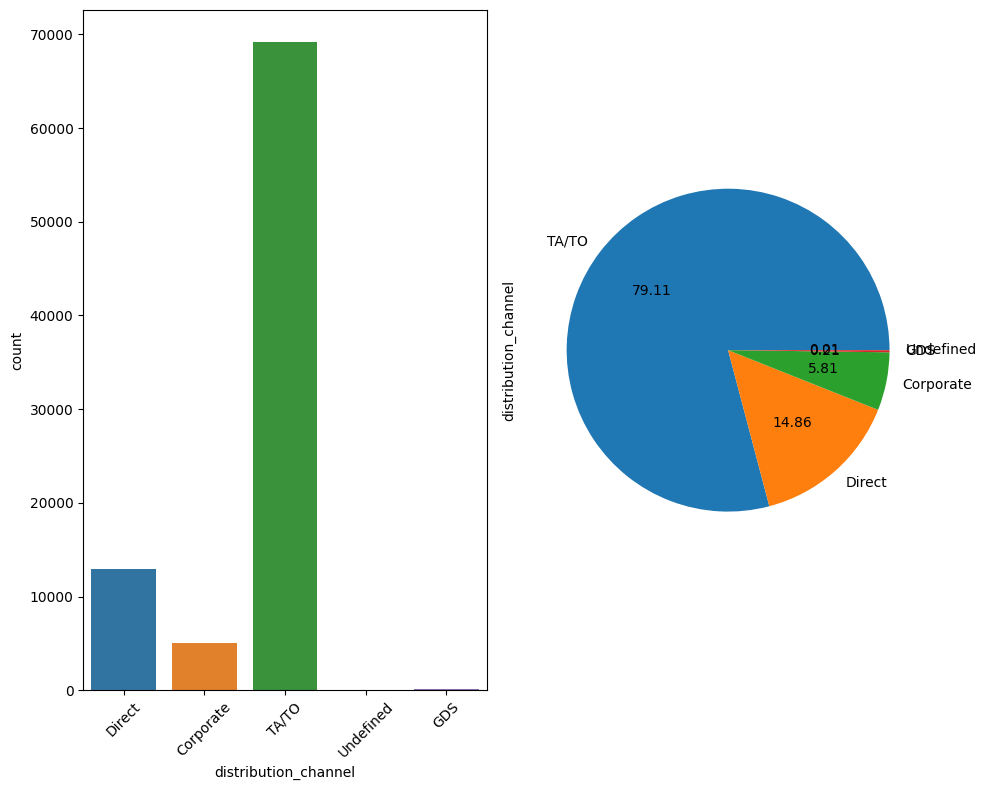

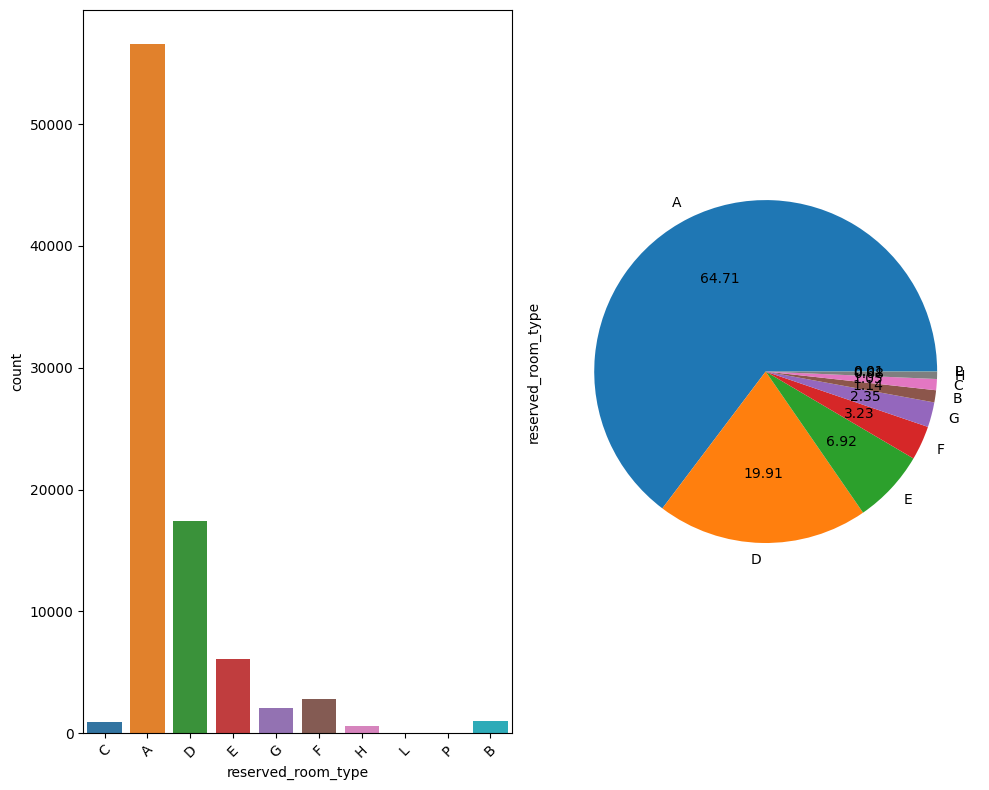

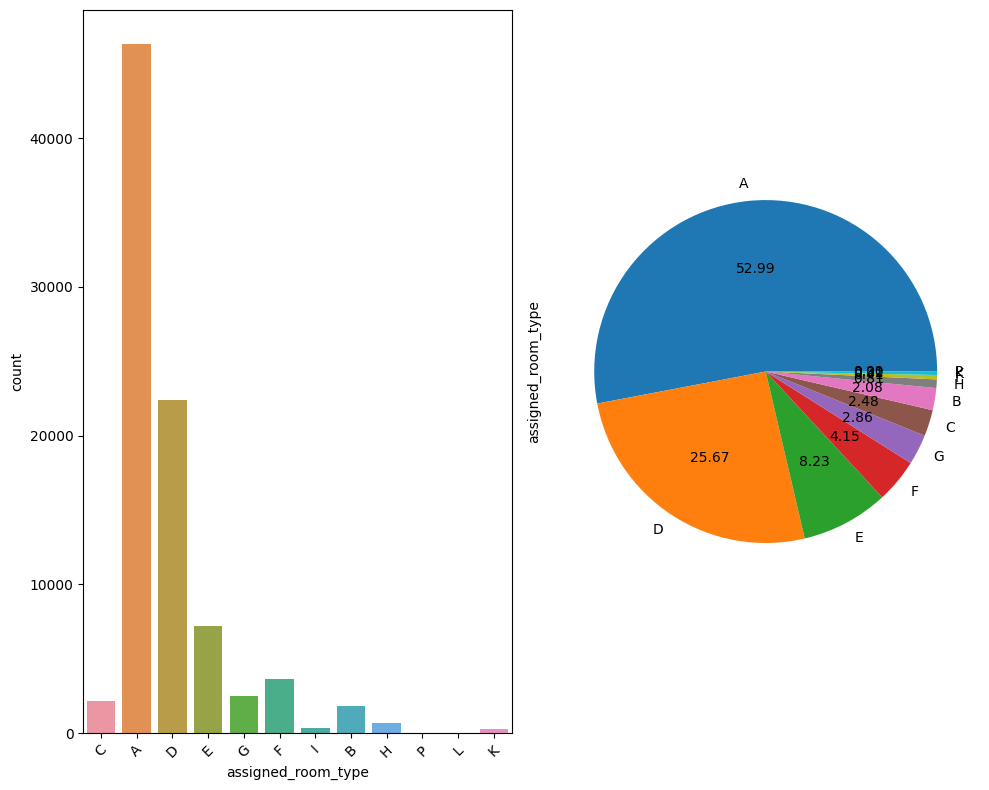

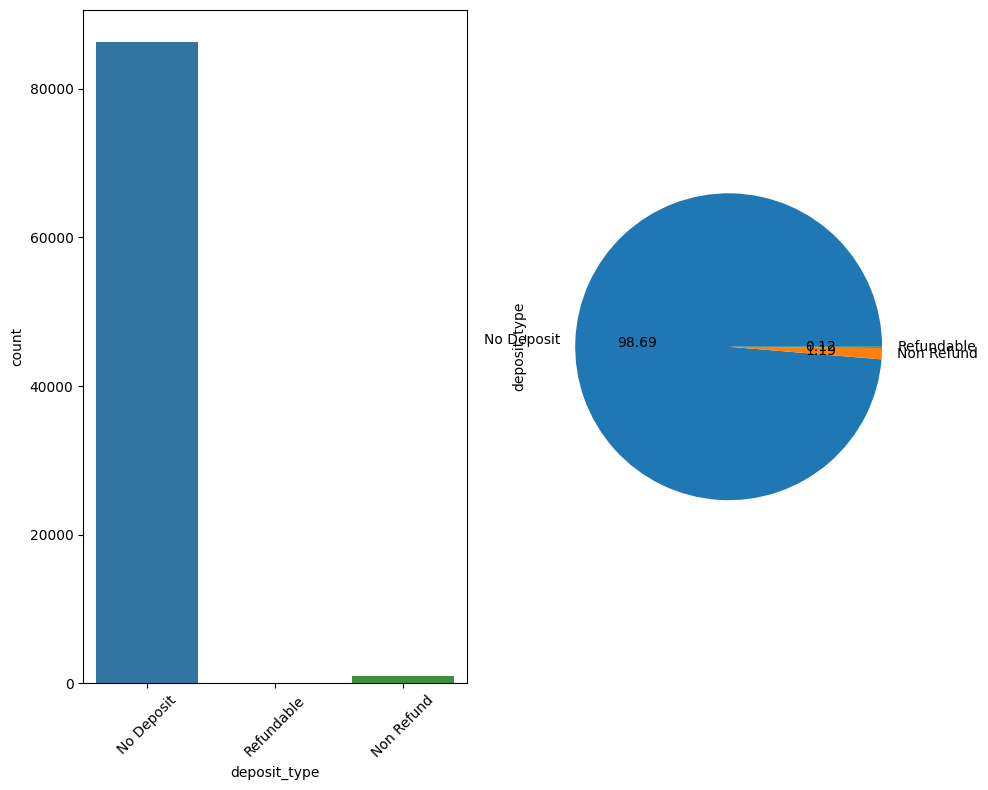

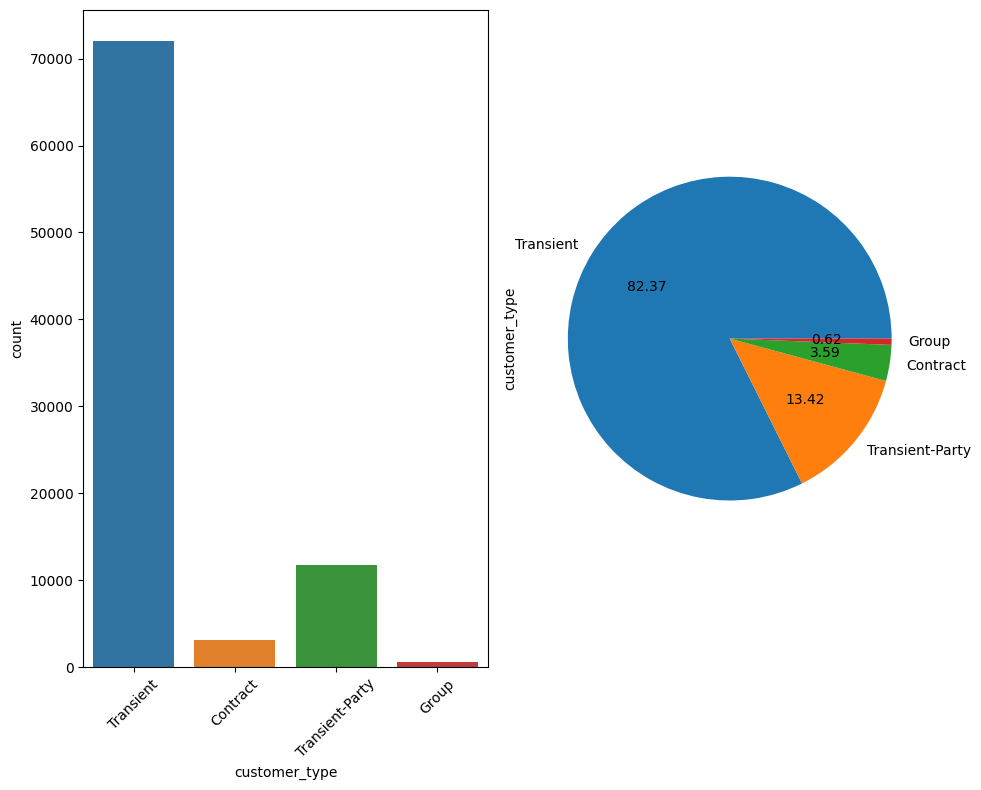

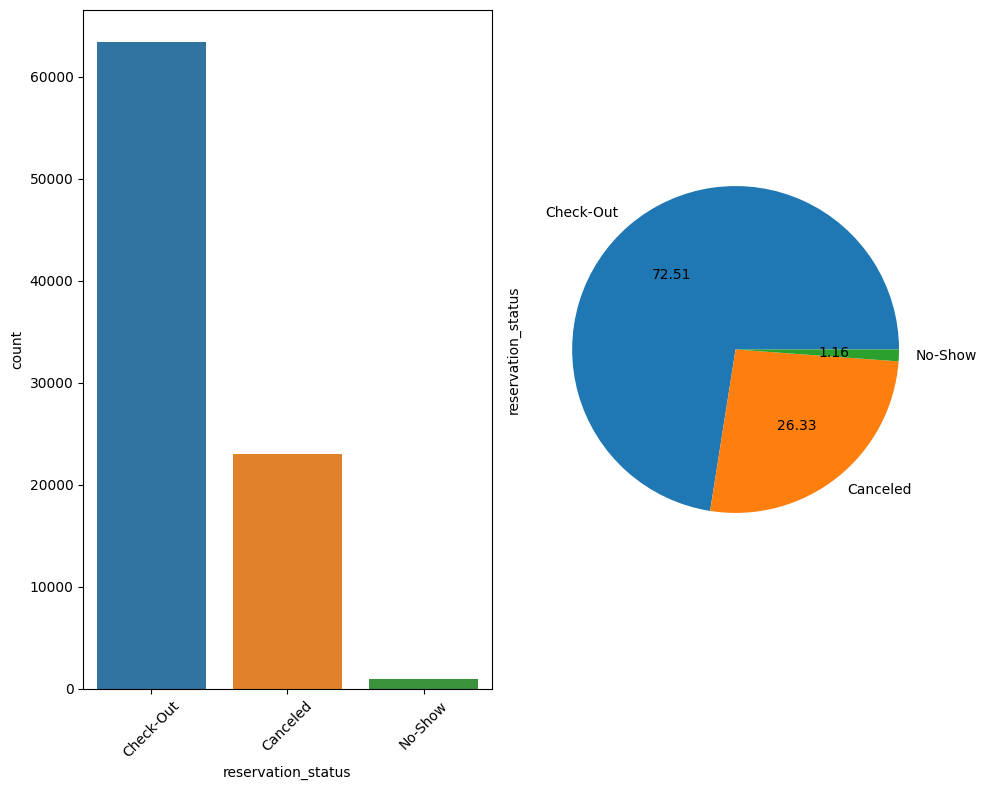

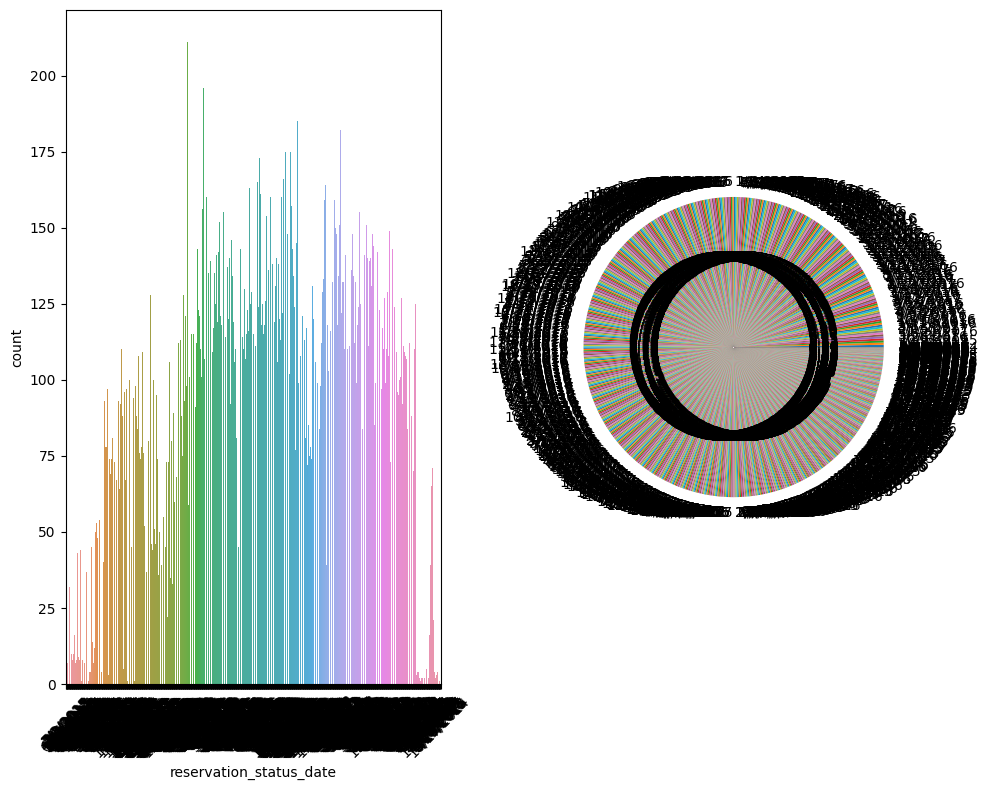

In [18]:
for col in df1.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.countplot(x=df1[col])
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    df1[col].value_counts().plot(kind='pie',autopct='%.2f')
    
    plt.tight_layout()
    plt.show()

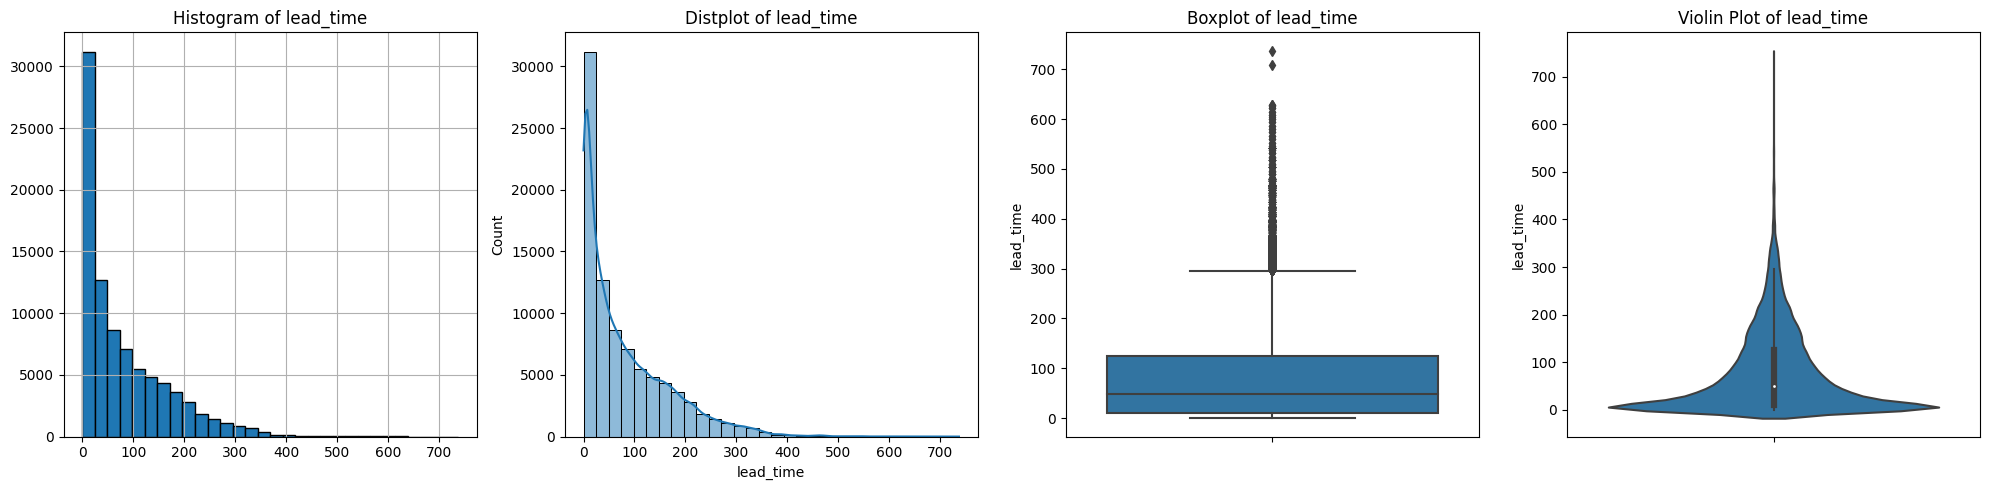

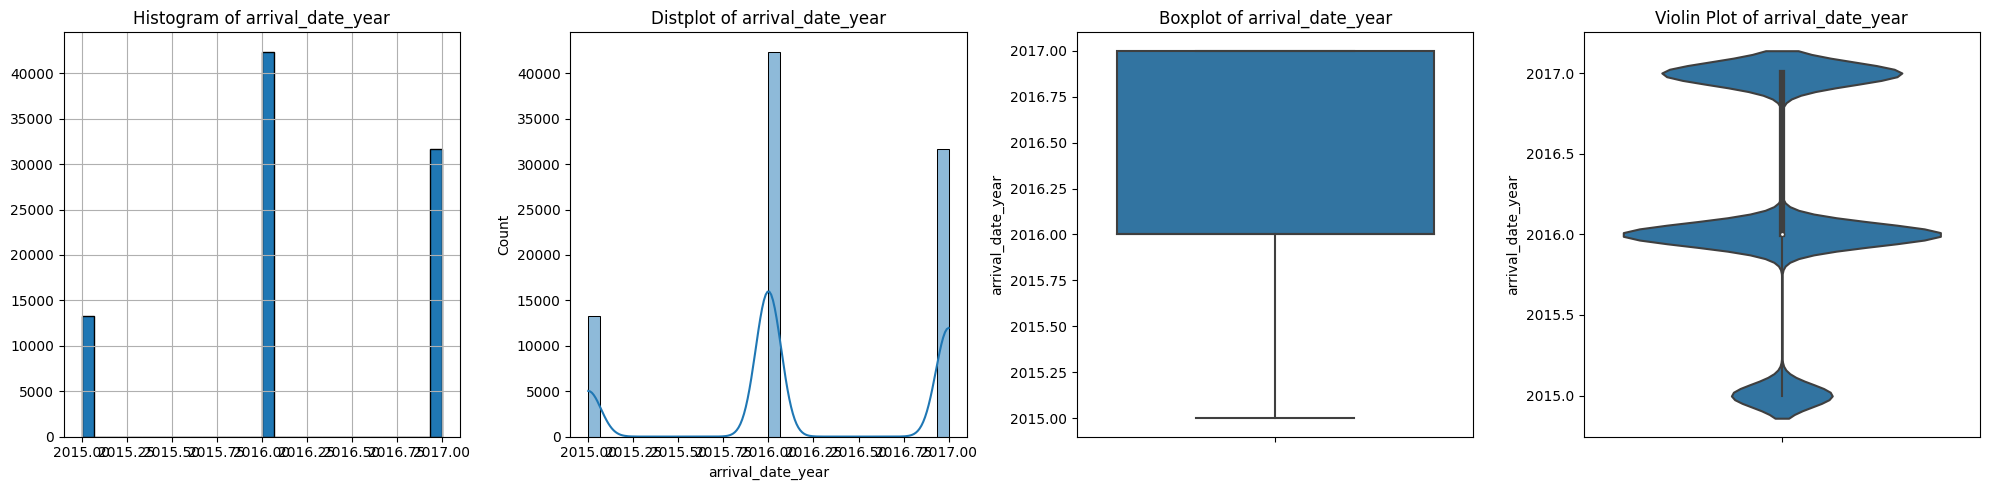

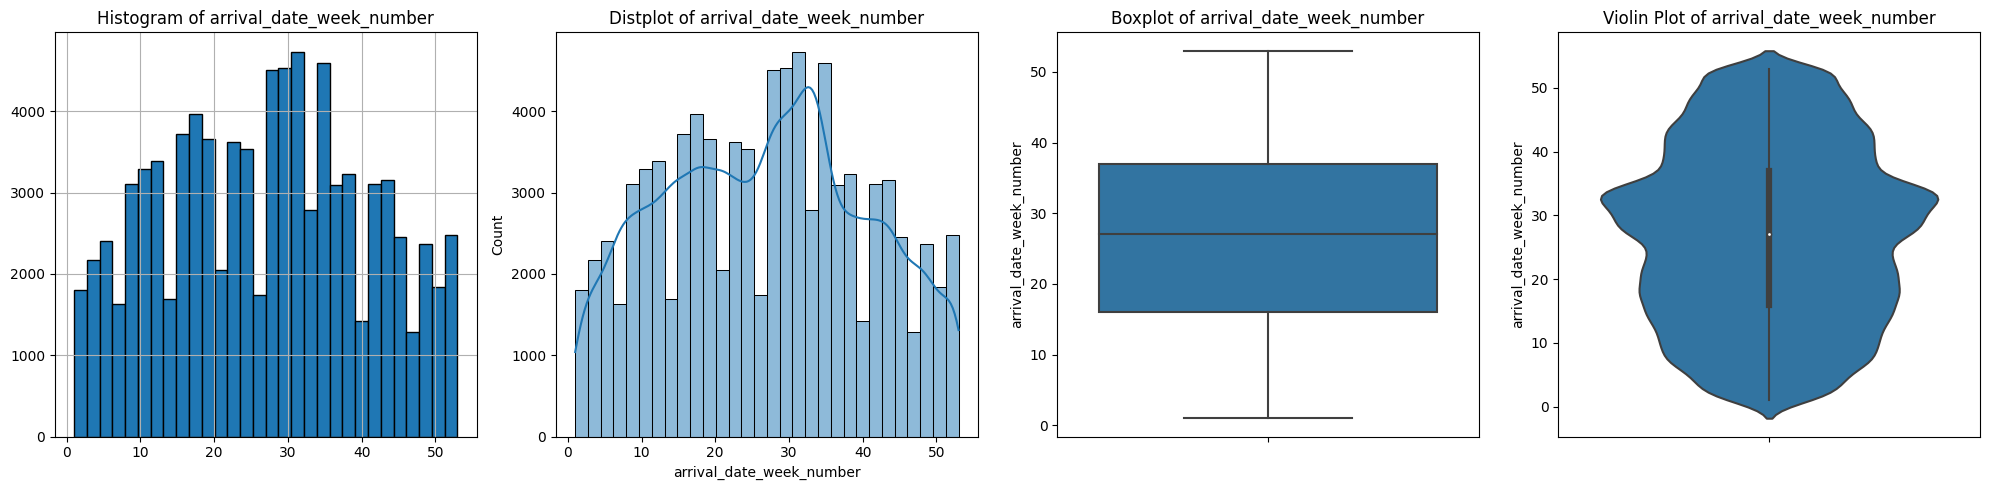

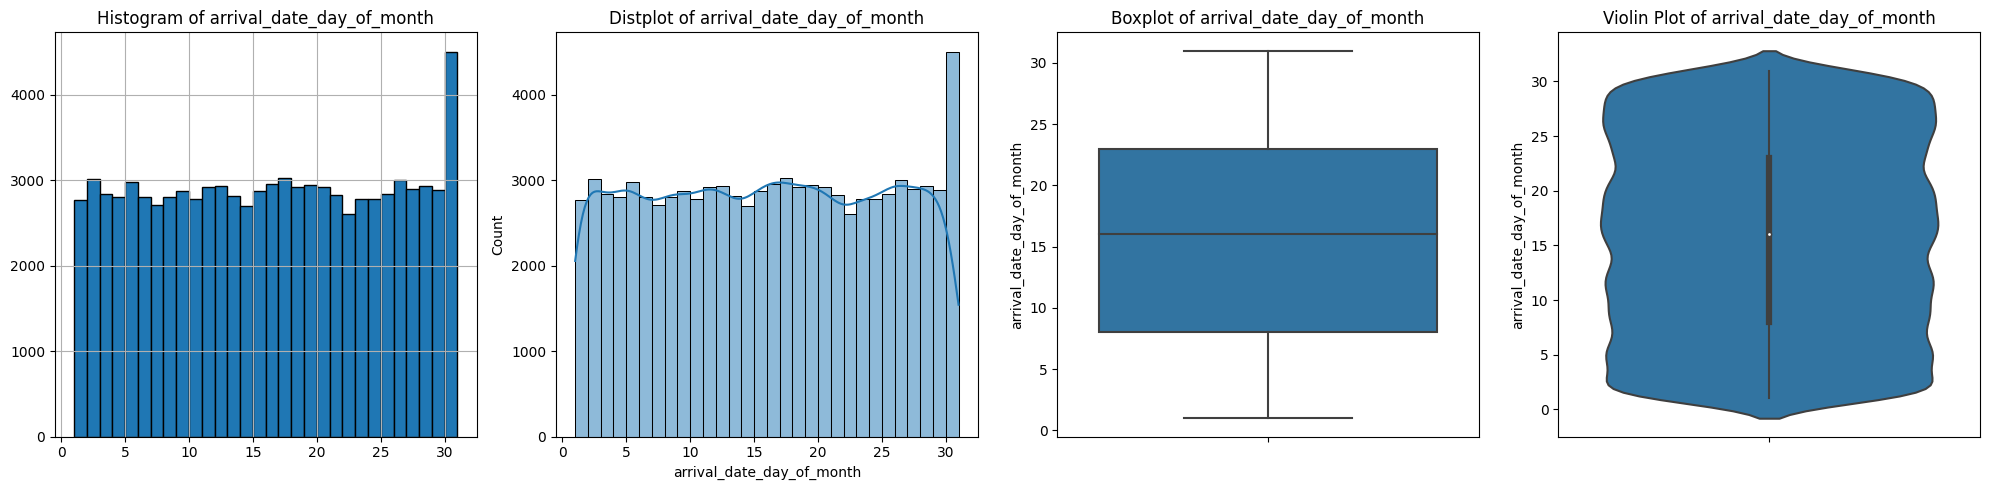

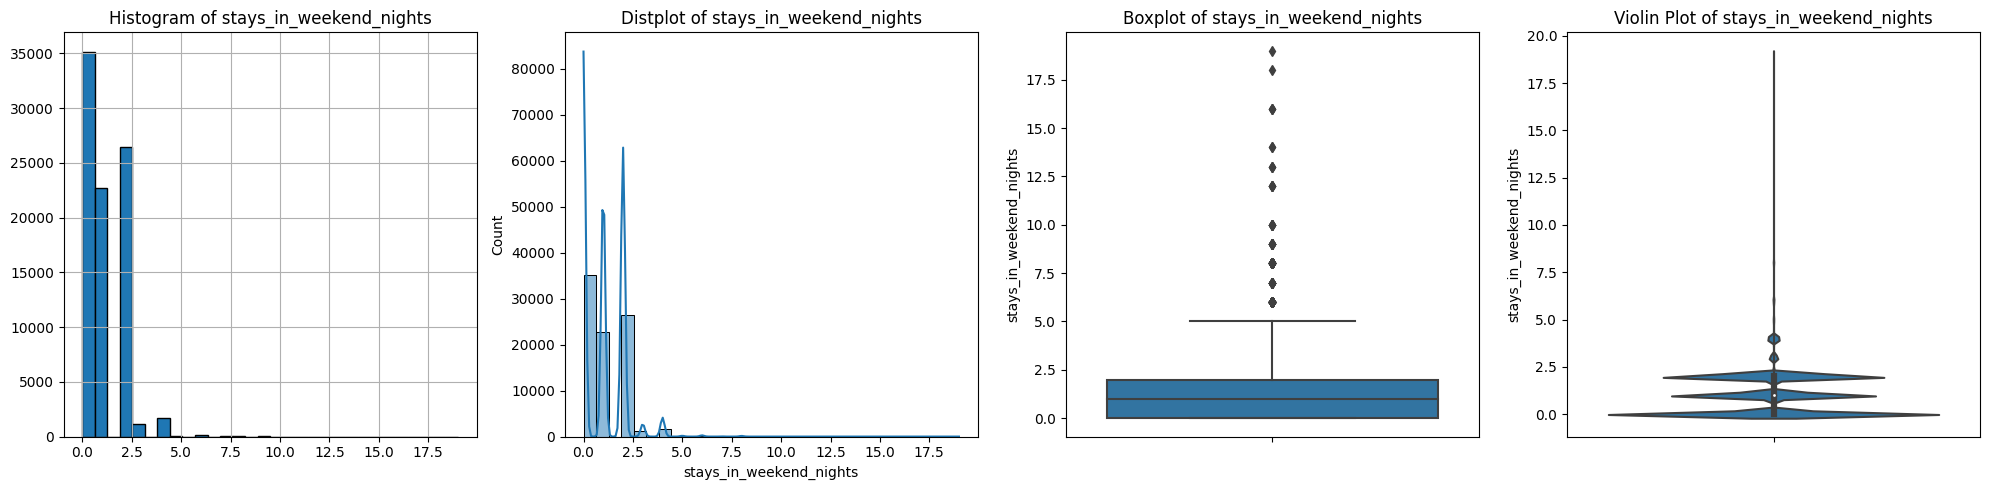

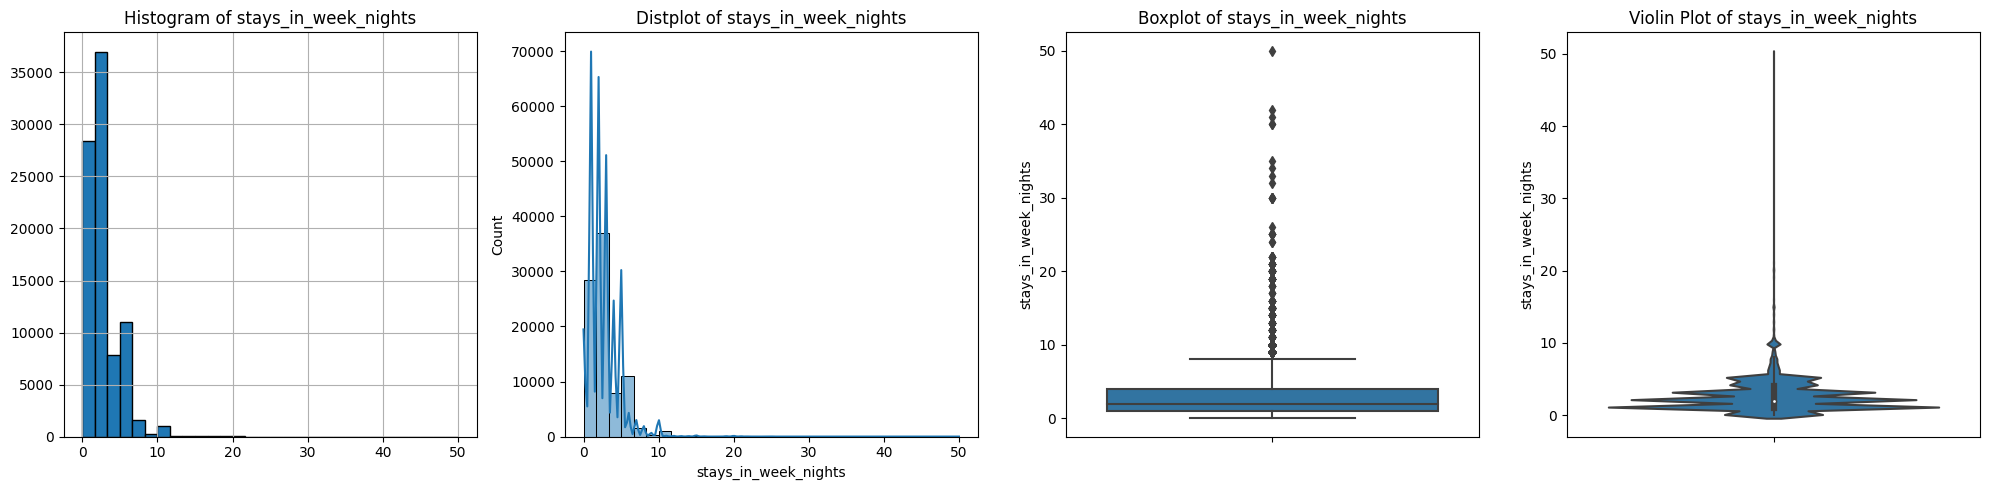

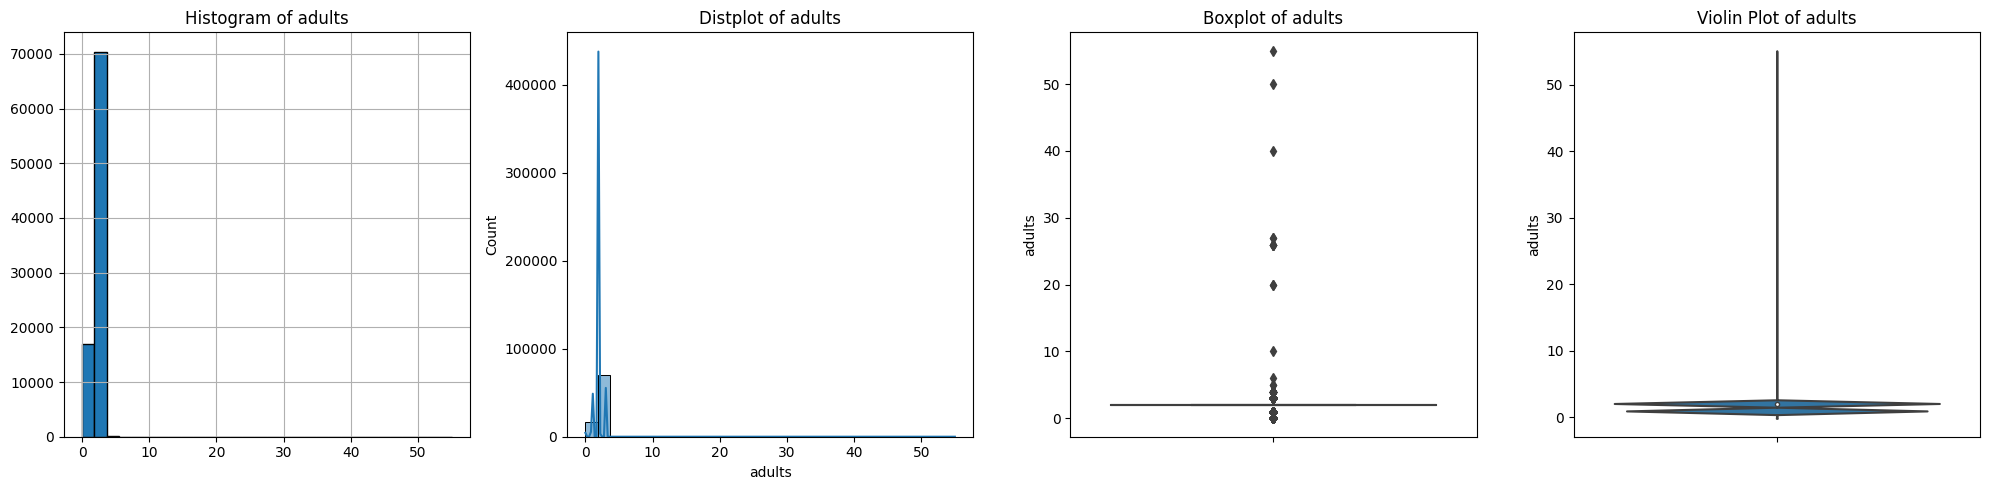

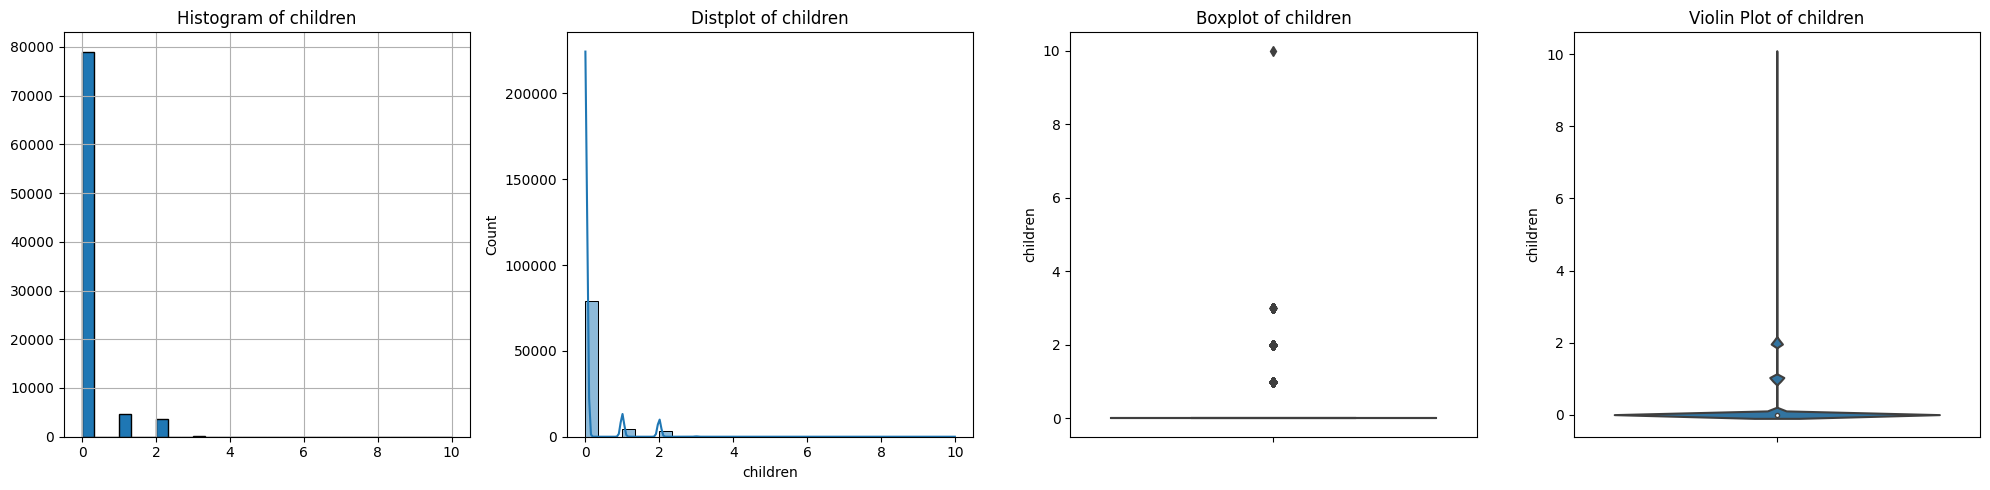

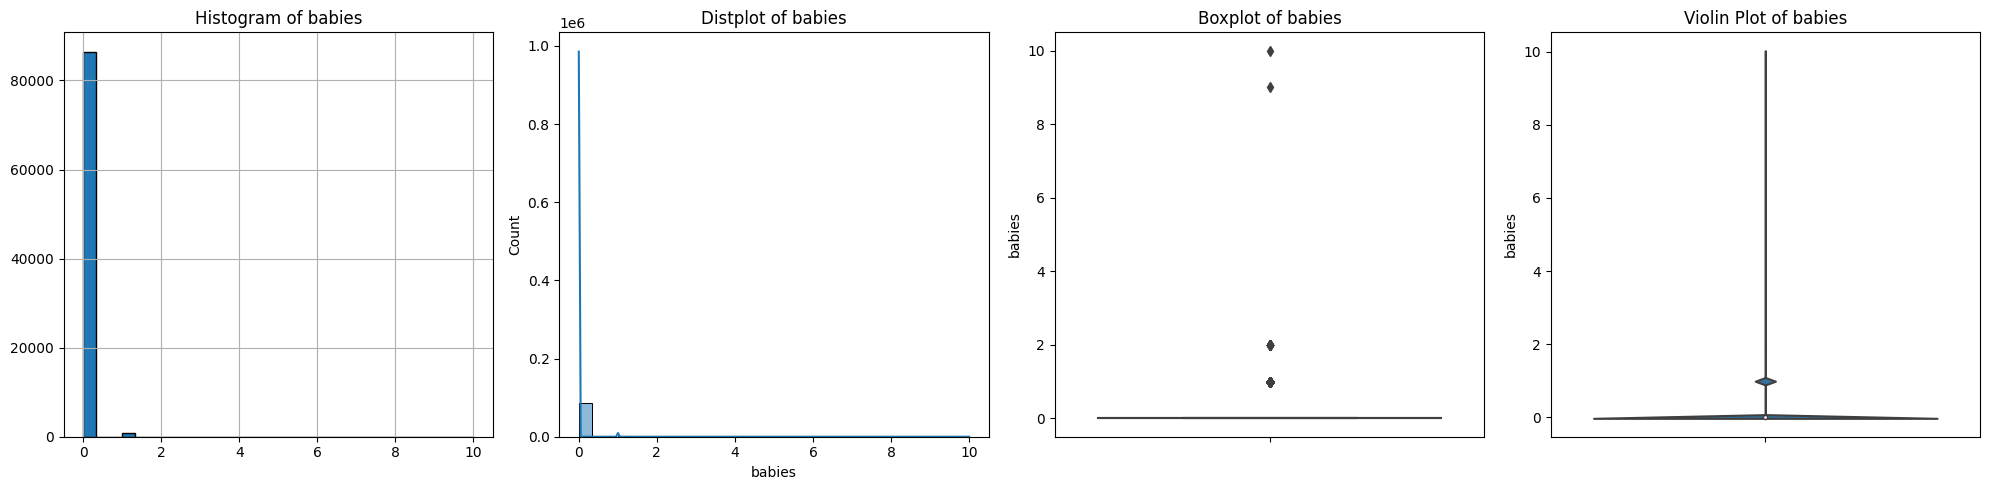

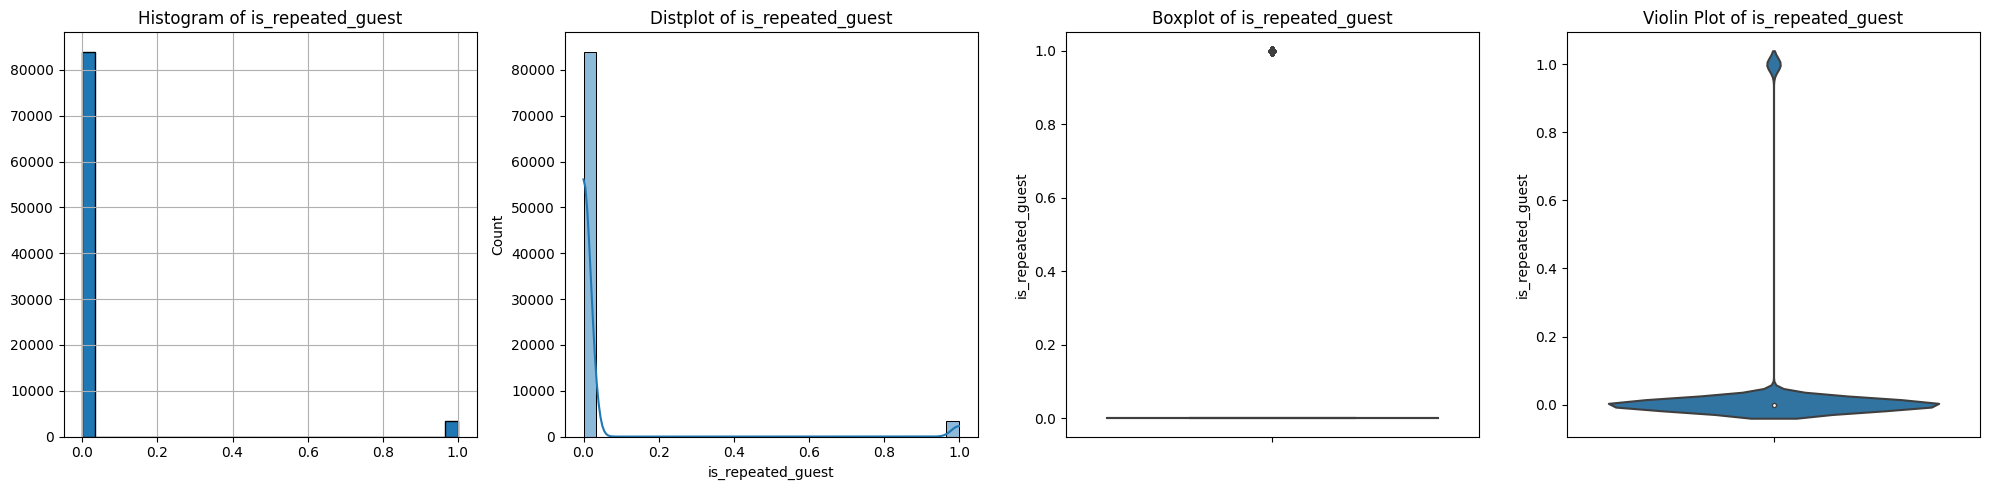

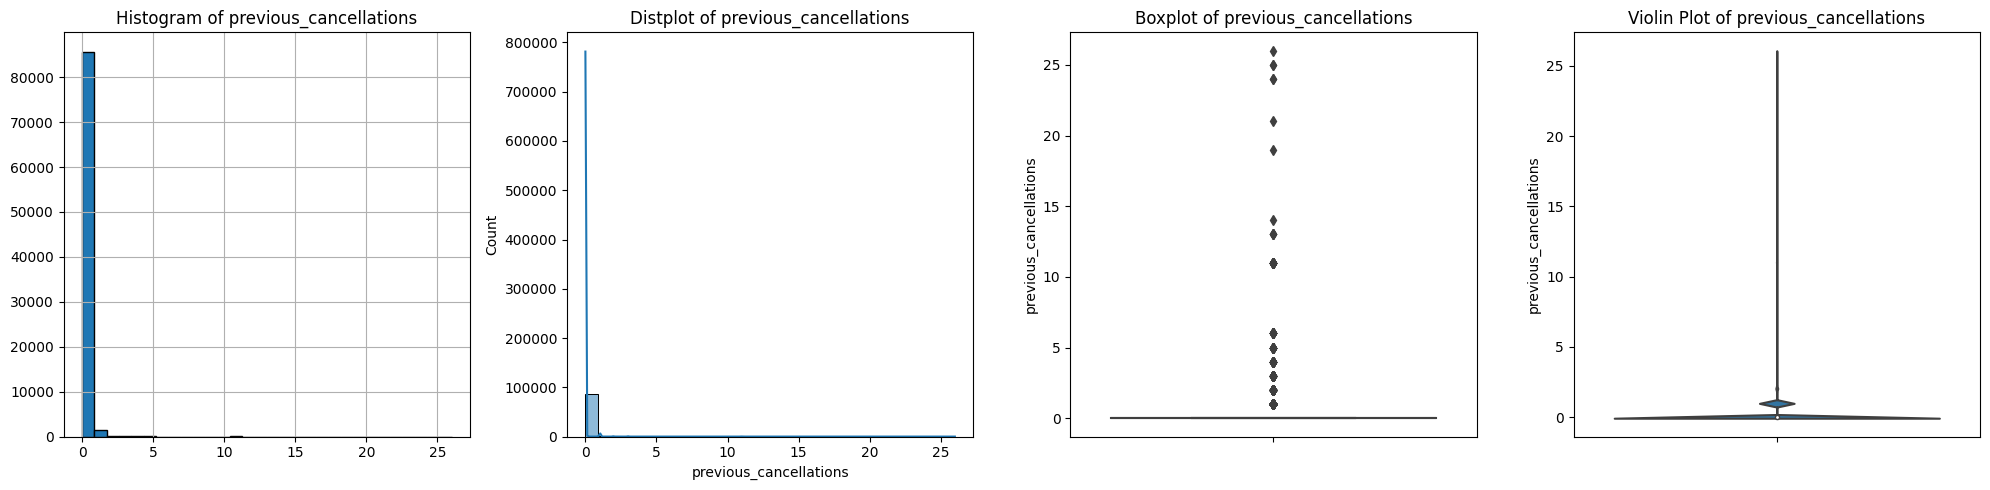

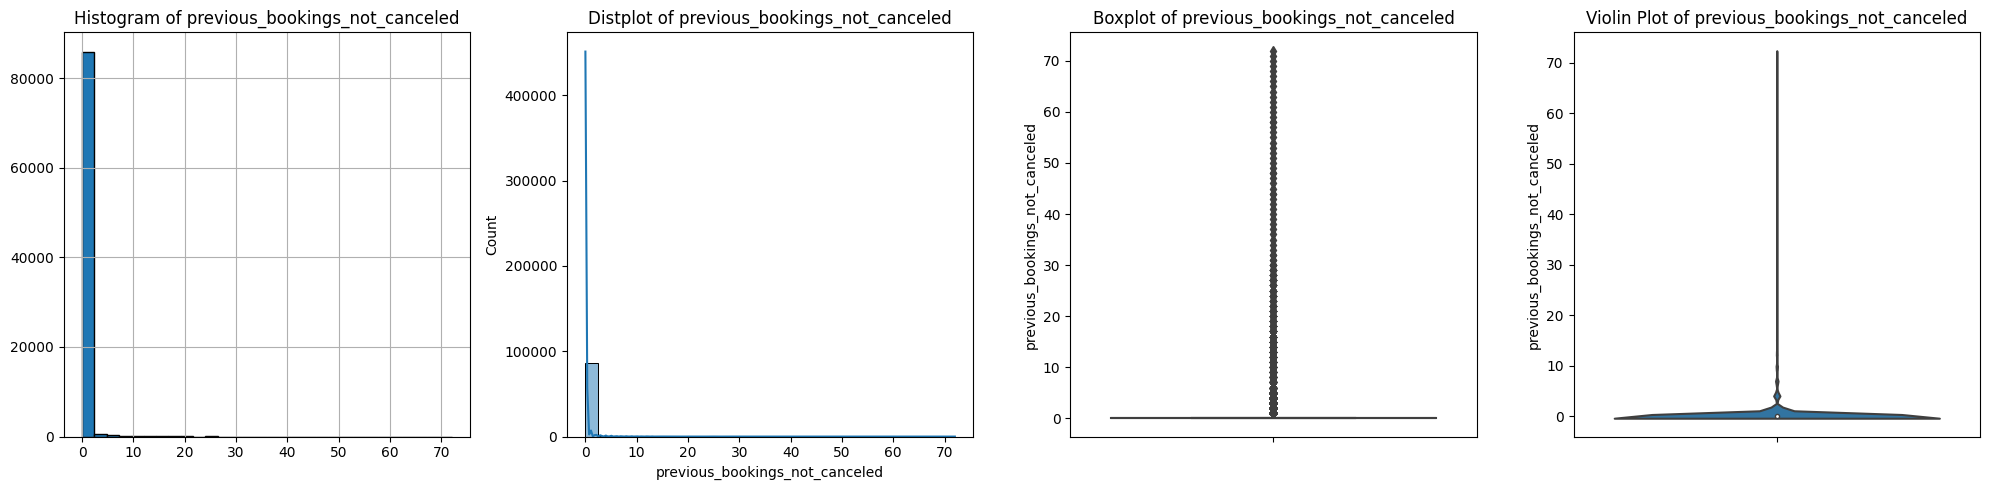

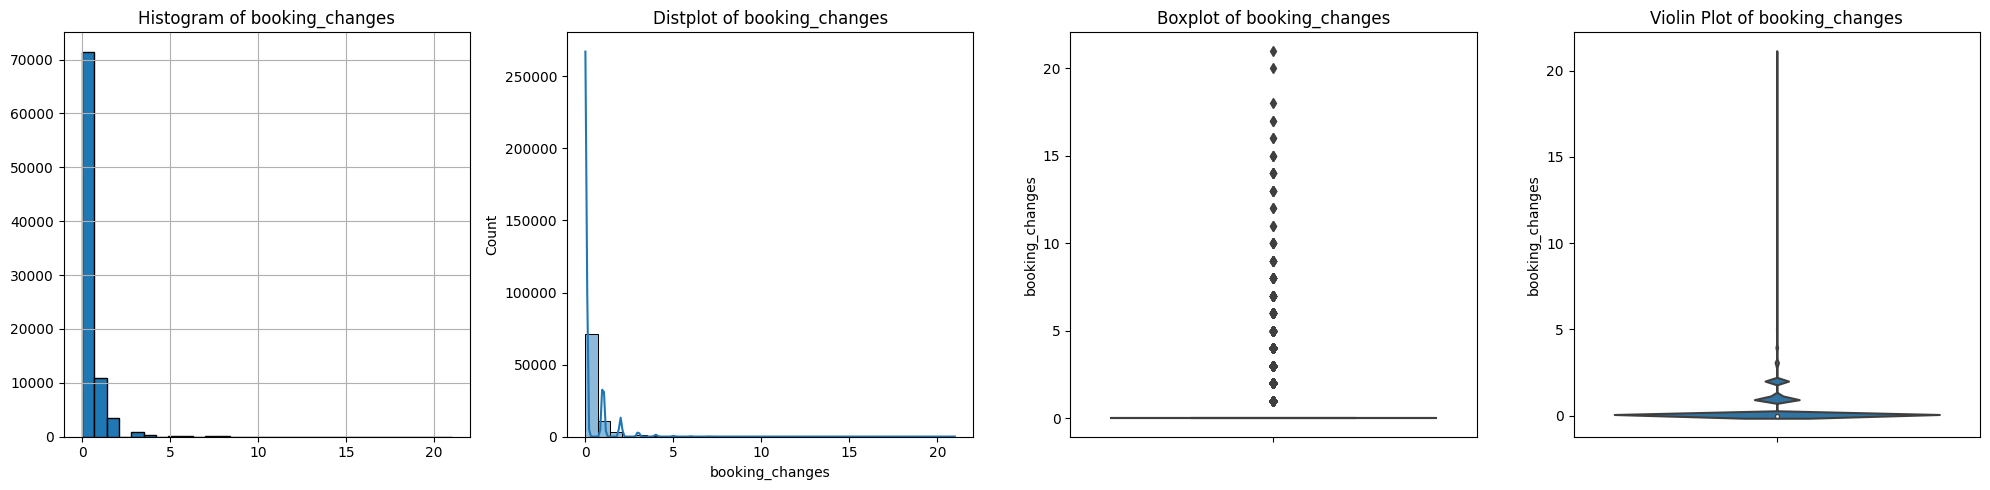

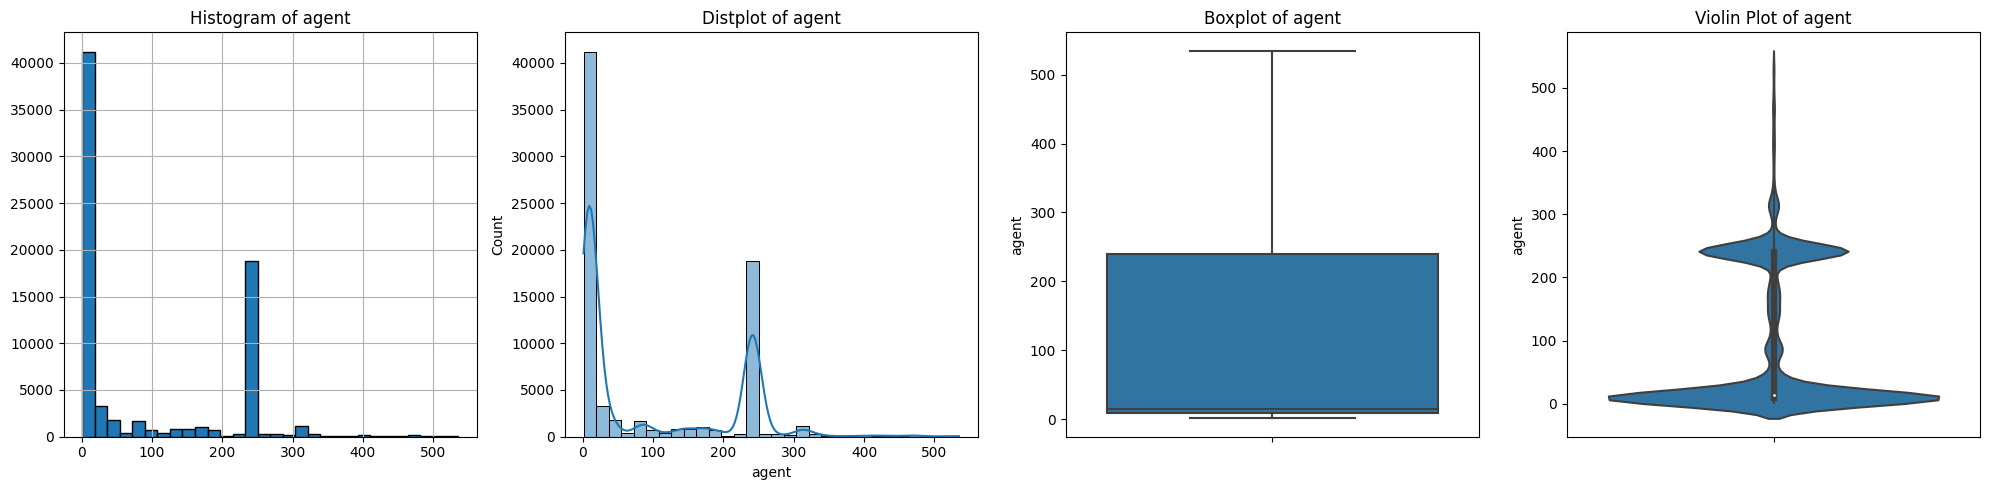

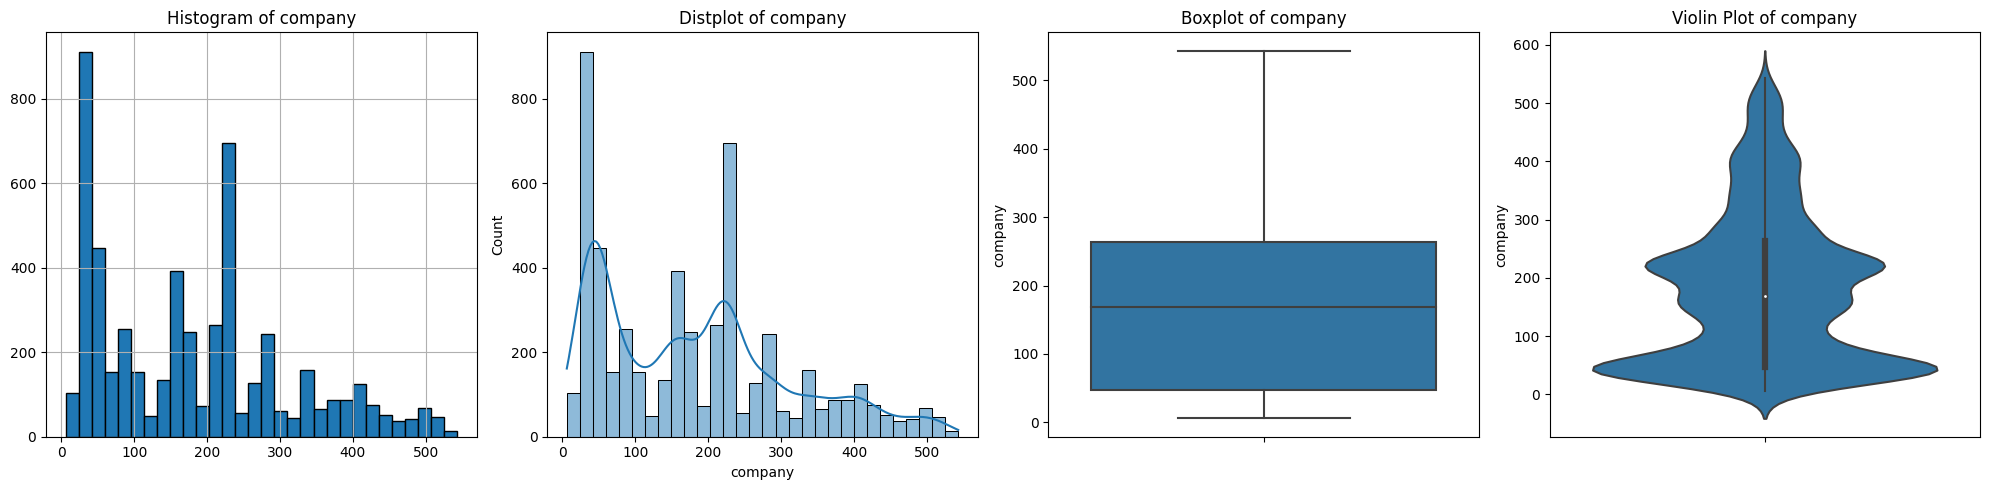

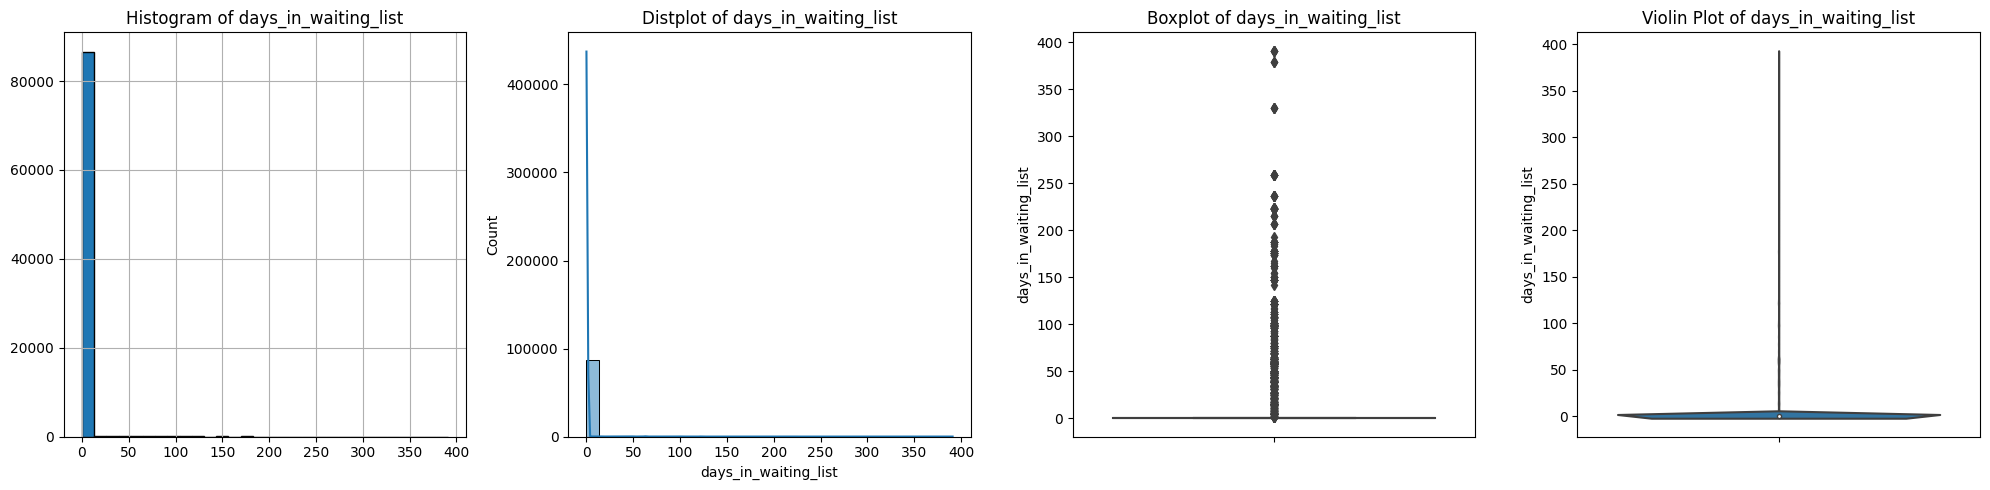

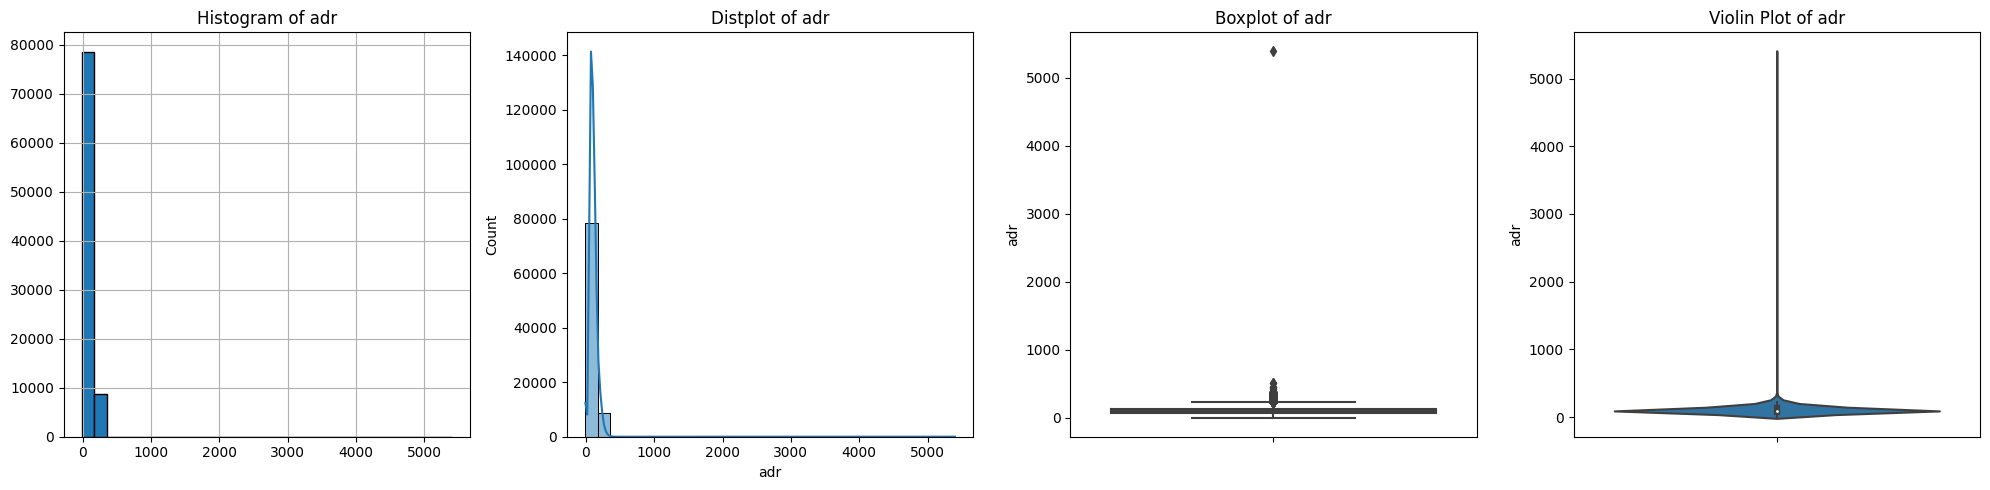

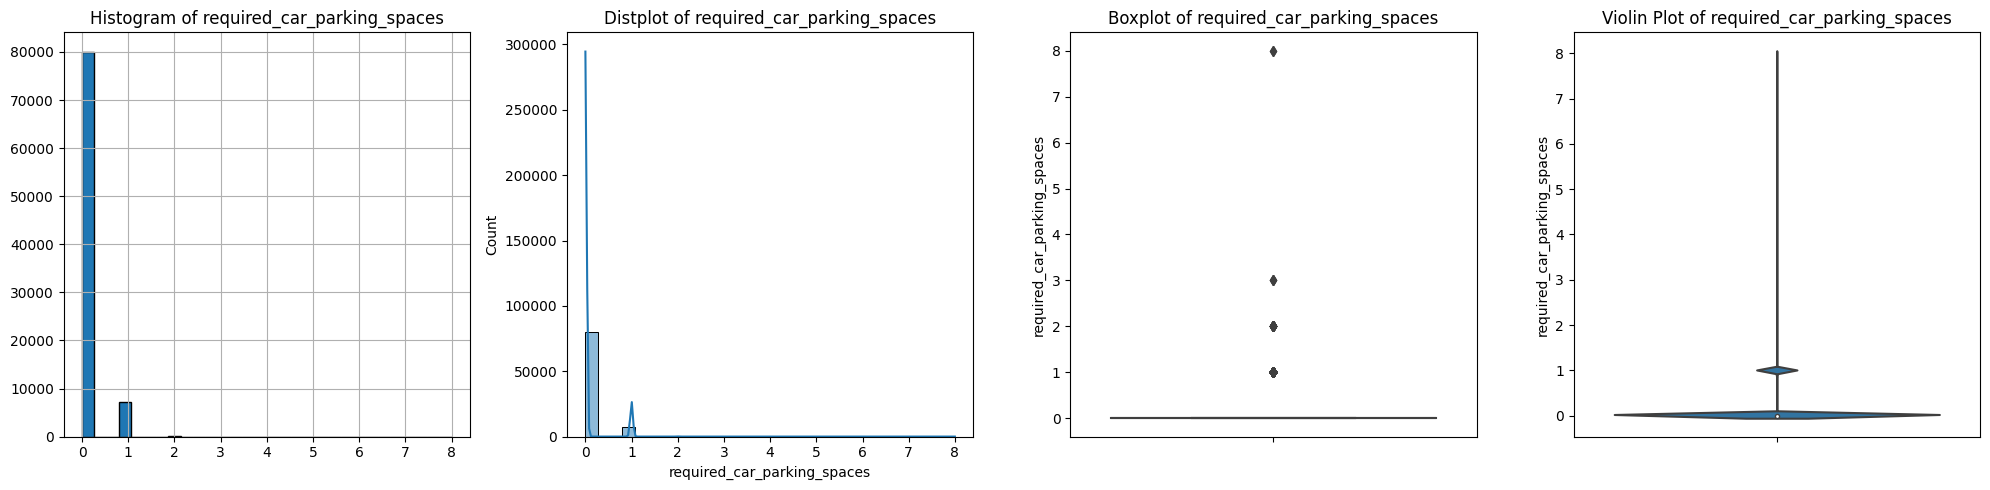

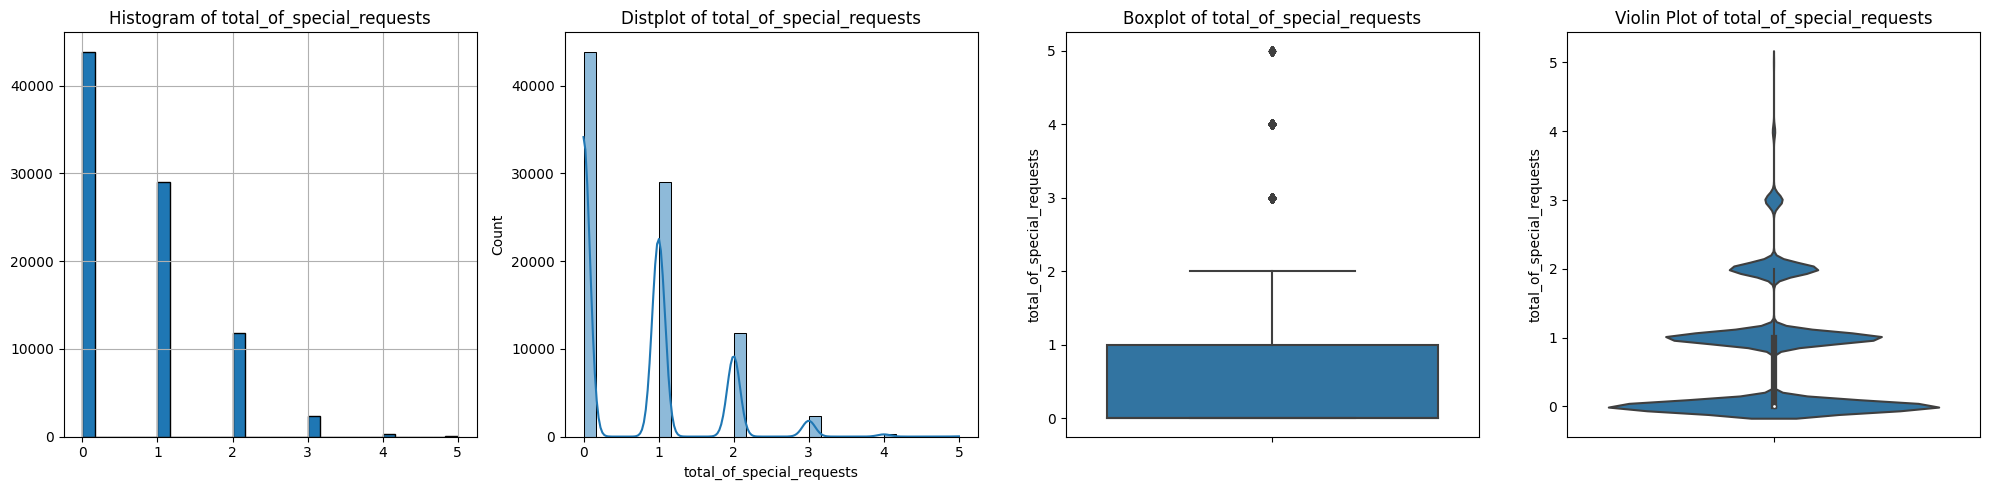

In [19]:
# Plot for each numeric column
for col in df1.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(20, 5))
    
    # Histogram
    plt.subplot(1, 4, 1)
    df1[col].hist(bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    
    # Distplot
    plt.subplot(1, 4, 2)
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Distplot of {col}')
    
    # Boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot of {col}')
    
    # Violin Plot
    plt.subplot(1, 4, 4)
    sns.violinplot(y=df1[col])
    plt.title(f'Violin Plot of {col}')
    
    plt.tight_layout()
    plt.show()

#  DATA CLEANING

In [20]:
df1.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [21]:
missing_percentage = df1['country'].isnull().sum() / df1['country'].shape[0] * 100
print(missing_percentage)

0.5171861412421621


In [22]:
df1['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [23]:
df1['country'].fillna('missing',inplace=True)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [24]:
df1.isnull().sum().sort_values(ascending=False).head()

company                   82137
agent                     12193
children                      4
hotel                         0
previous_cancellations        0
dtype: int64

In [25]:
null_columns=['agent','children','company']
for col in null_columns:
    df1[col].fillna(0,inplace=True)

In [26]:
df1.isnull().sum().head()

hotel                 0
is_canceled           0
lead_time             0
arrival_date_year     0
arrival_date_month    0
dtype: int64

<AxesSubplot:>

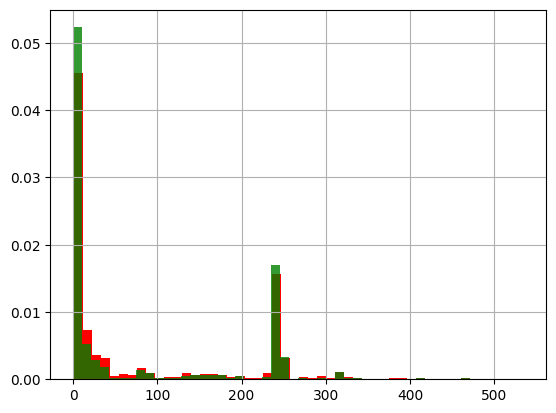

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['agent'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df1['agent'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

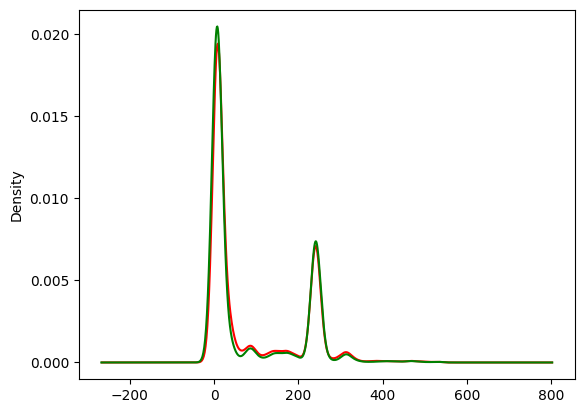

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['agent'].plot.density(color='red')

# data after cca
df1['agent'].plot.density(color='green')

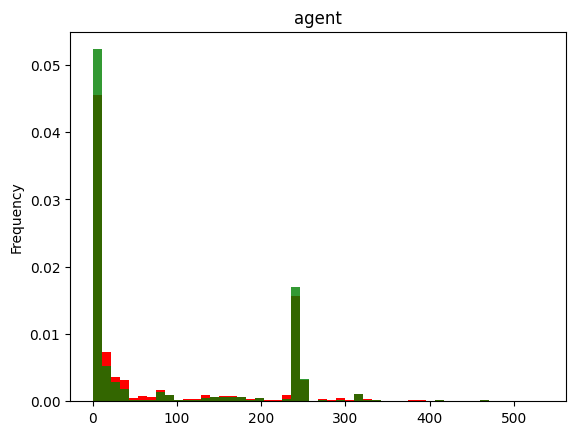

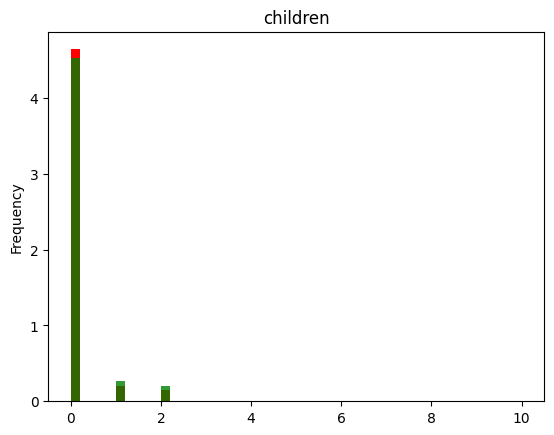

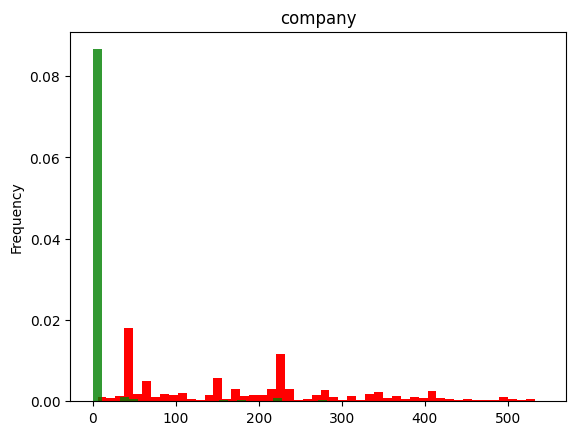

In [29]:
null_columns=['agent','children','company']
for col in null_columns:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    df[col].plot.hist(bins=50, ax=ax, density=True, color='red')
    df1[col].plot.hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
    plt.title(col)

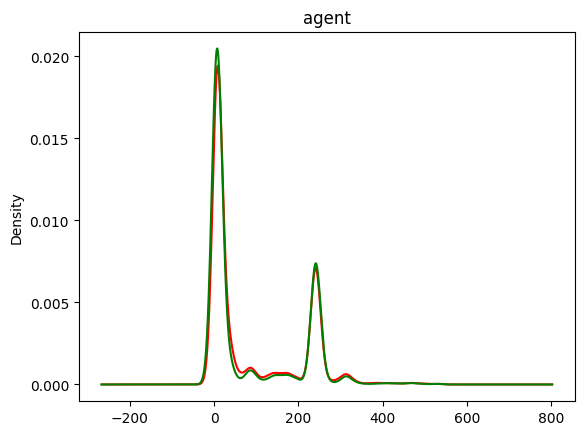

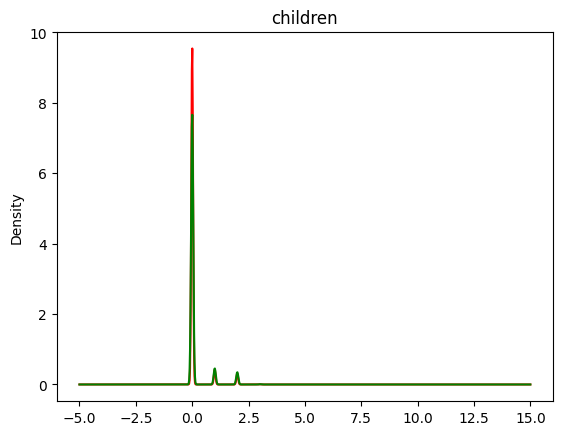

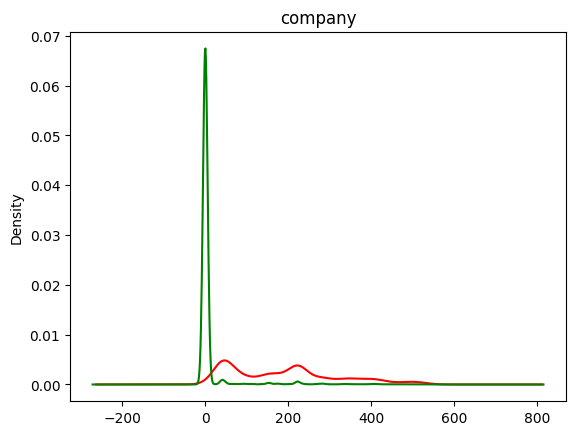

In [30]:
null_columns=['agent','children','company']
for col in null_columns:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    df[col].plot.density(color='red')
    df1[col].plot.density(color='green')
    plt.title(col)

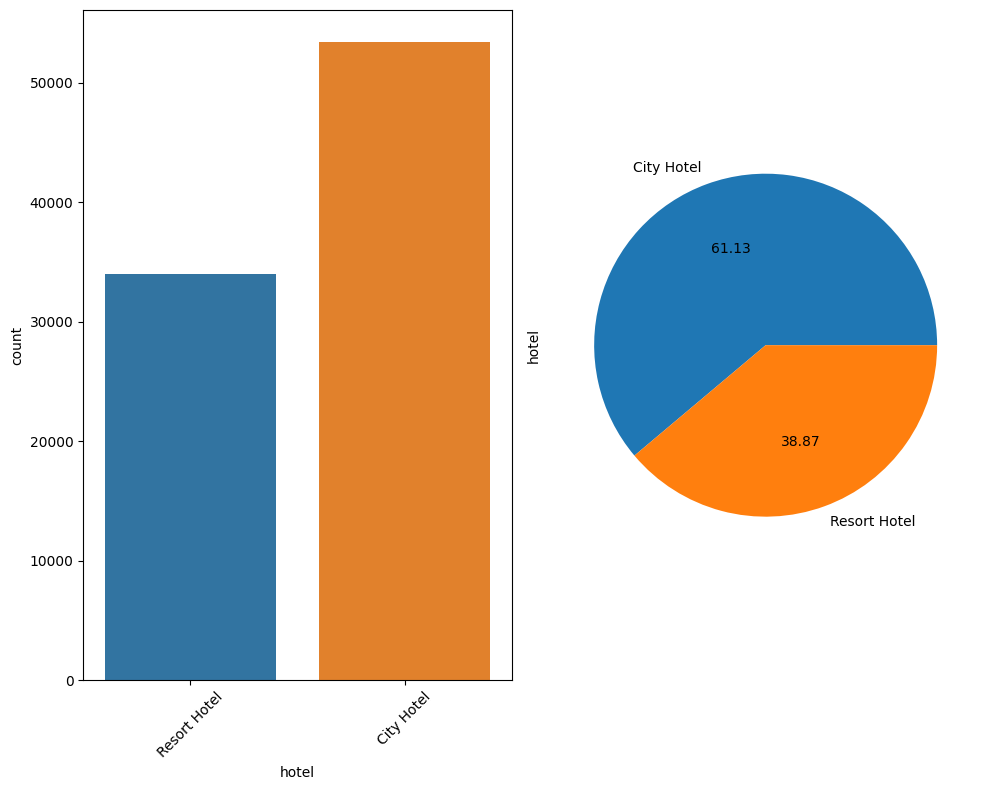

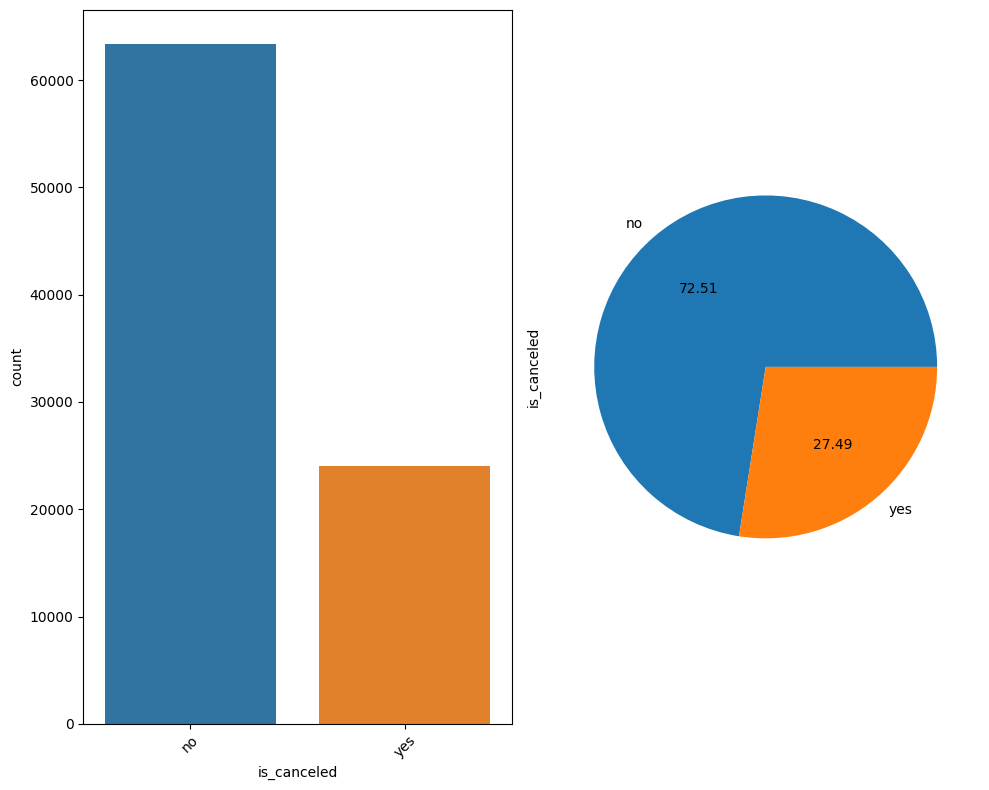

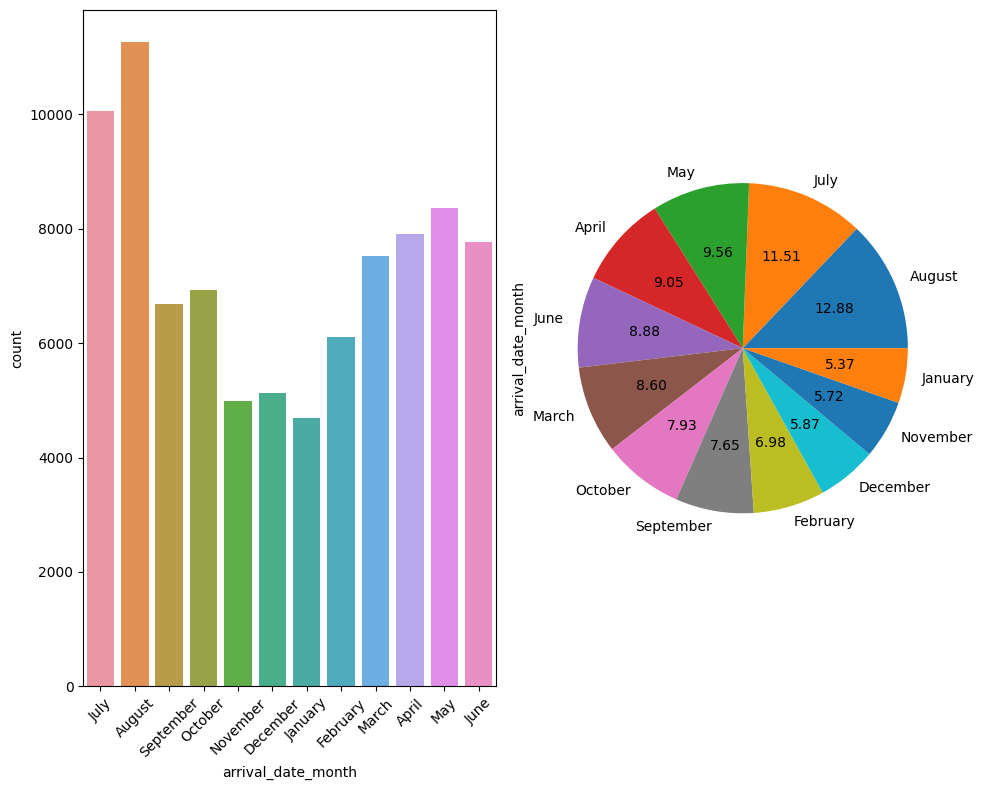

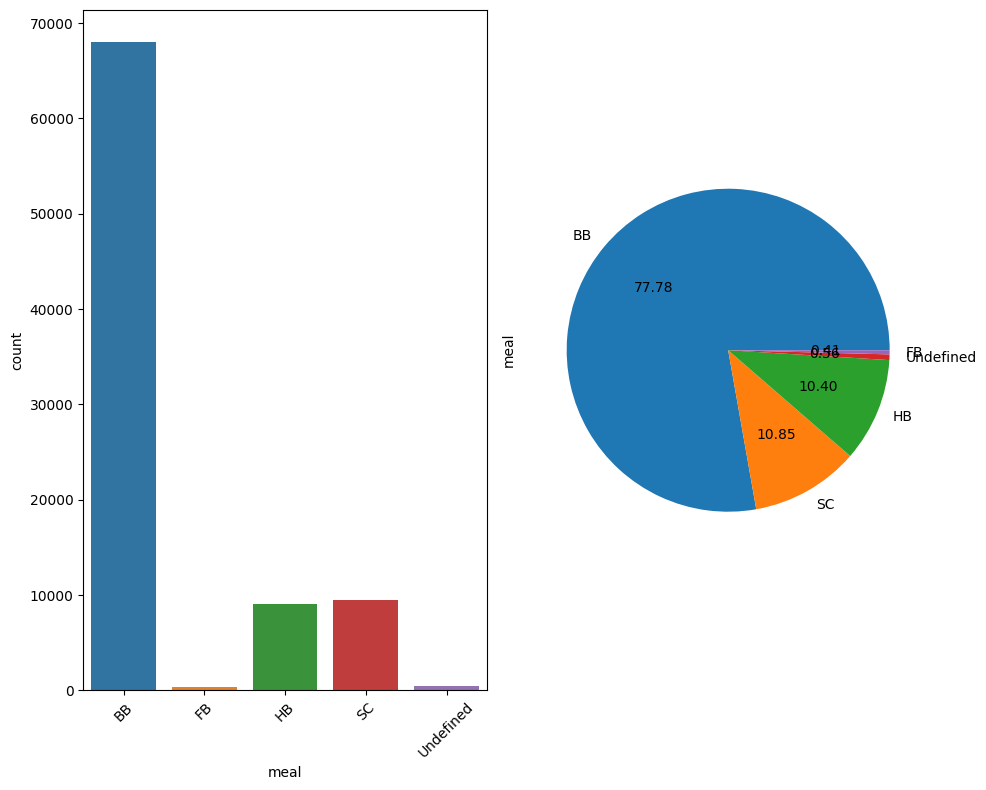

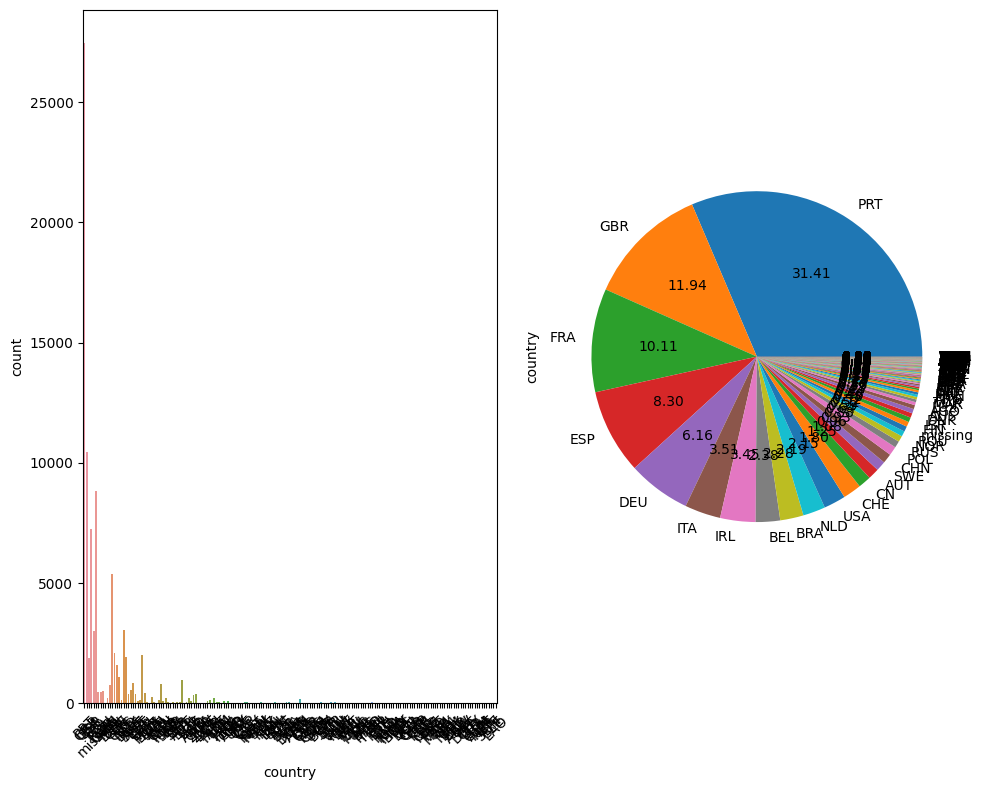

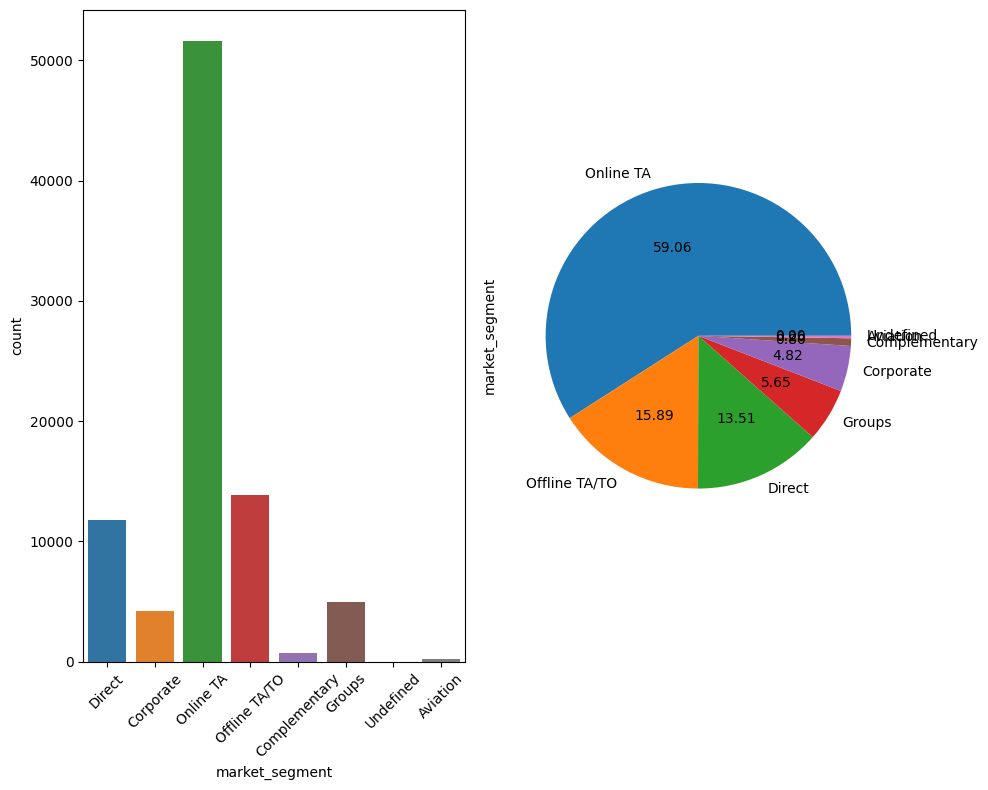

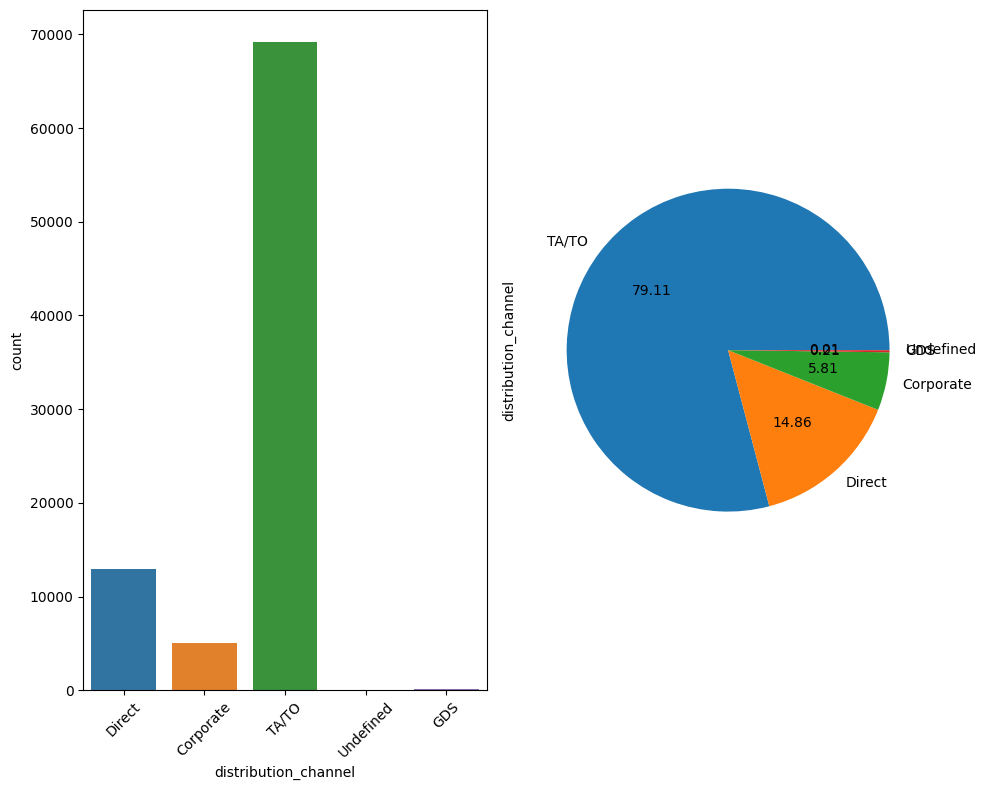

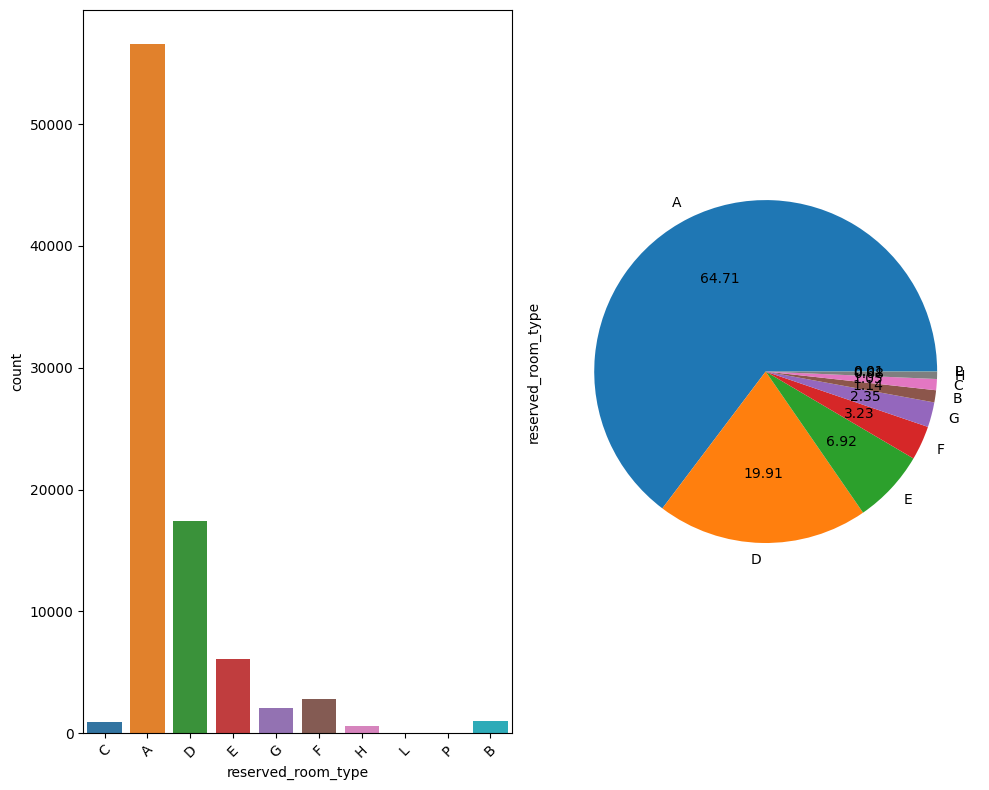

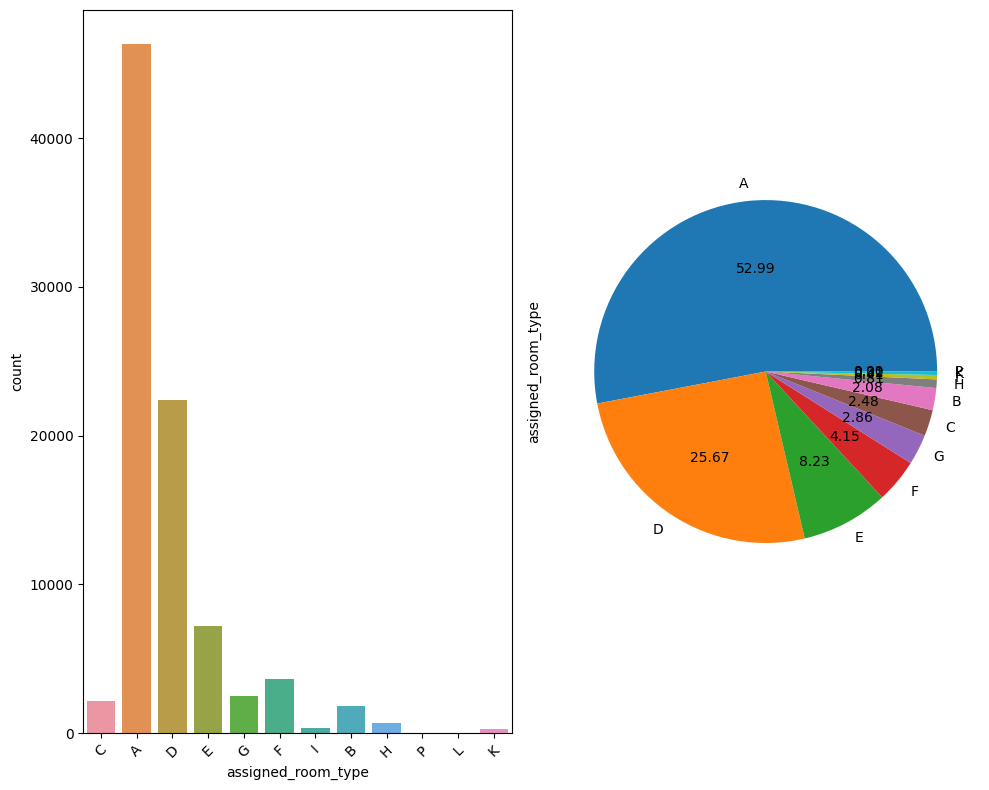

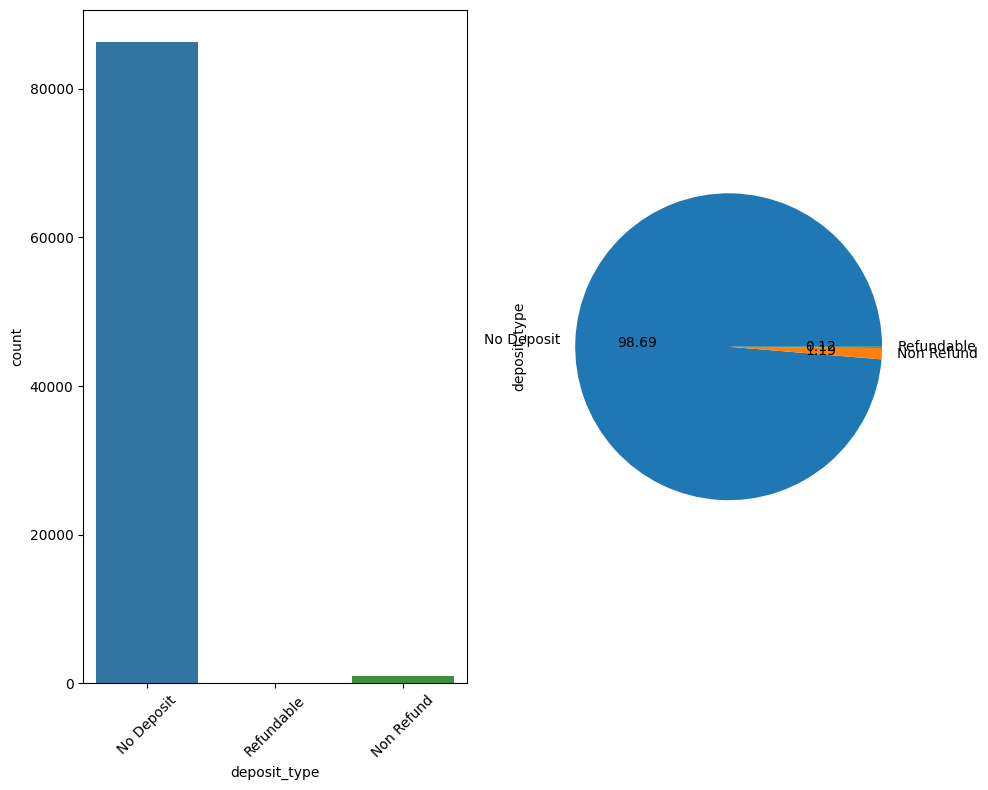

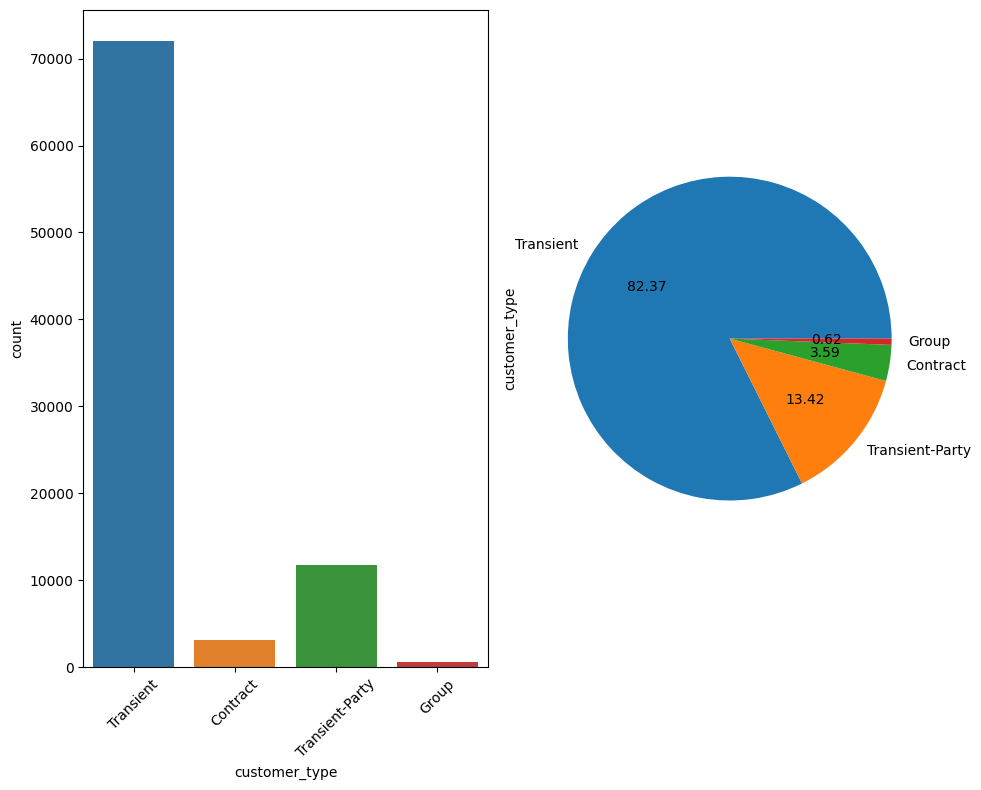

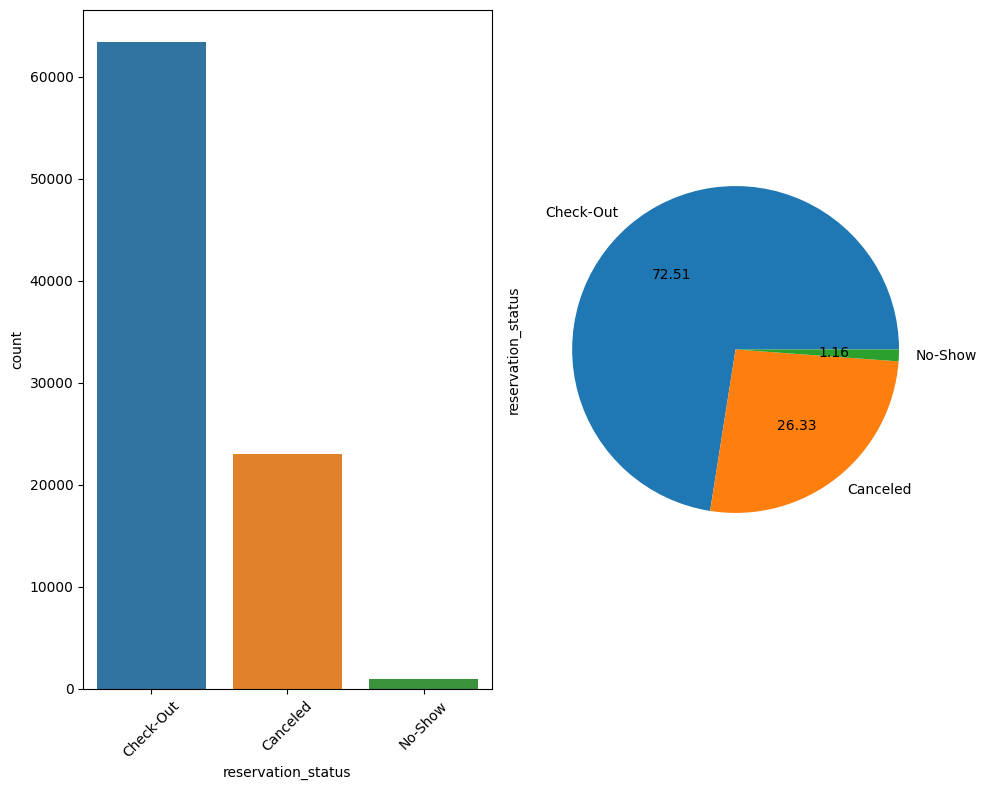

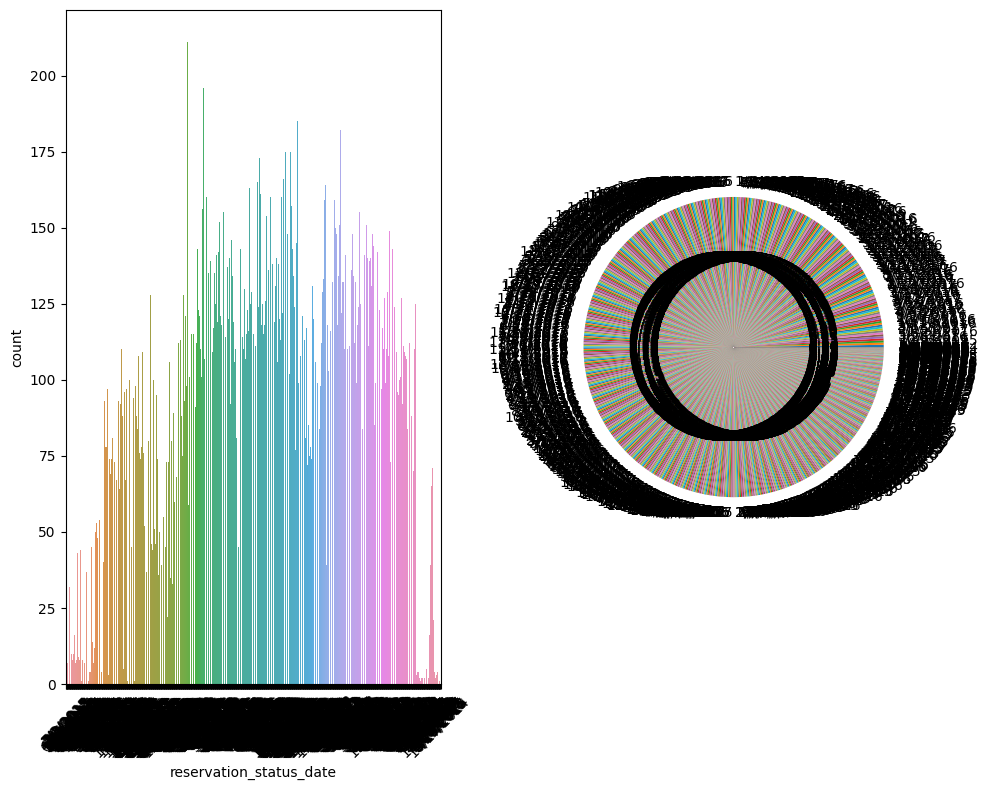

In [31]:
for col in df1.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.countplot(x=df1[col])
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    df1[col].value_counts().plot(kind='pie',autopct='%.2f')
    
    plt.tight_layout()
    plt.show()

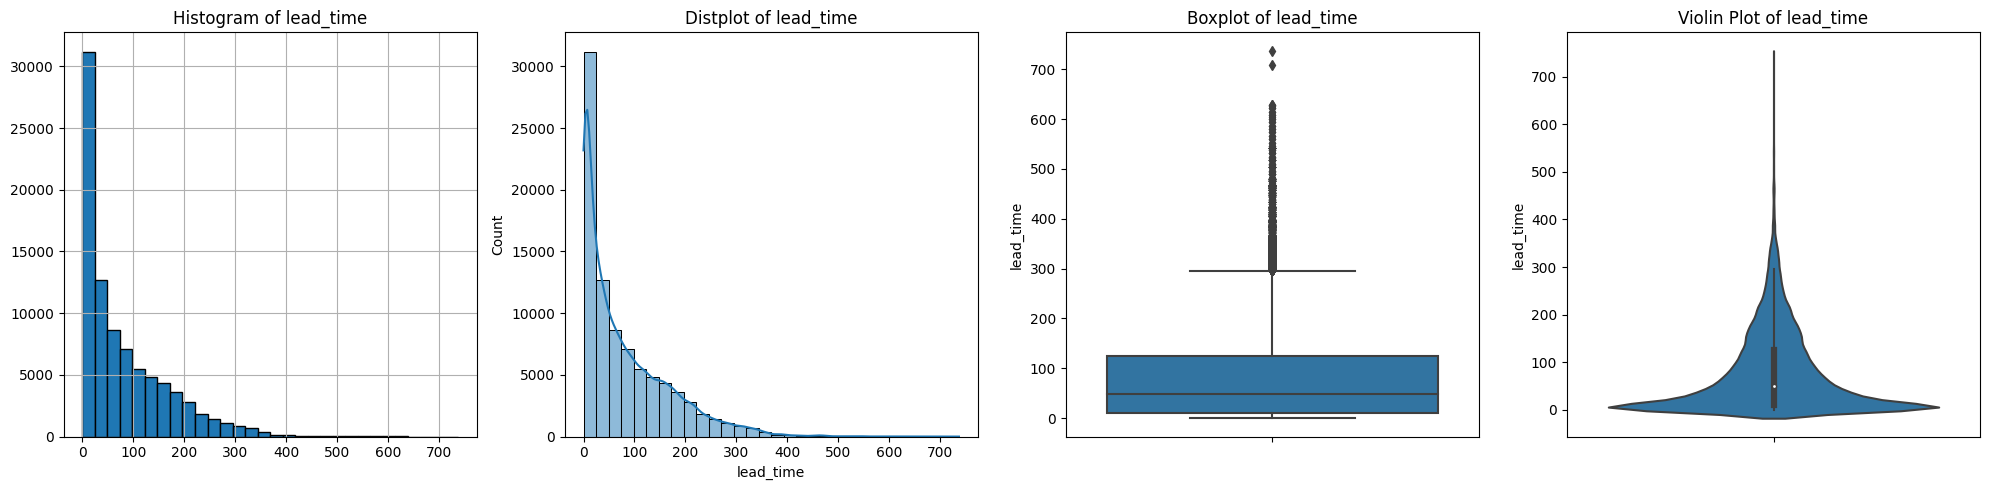

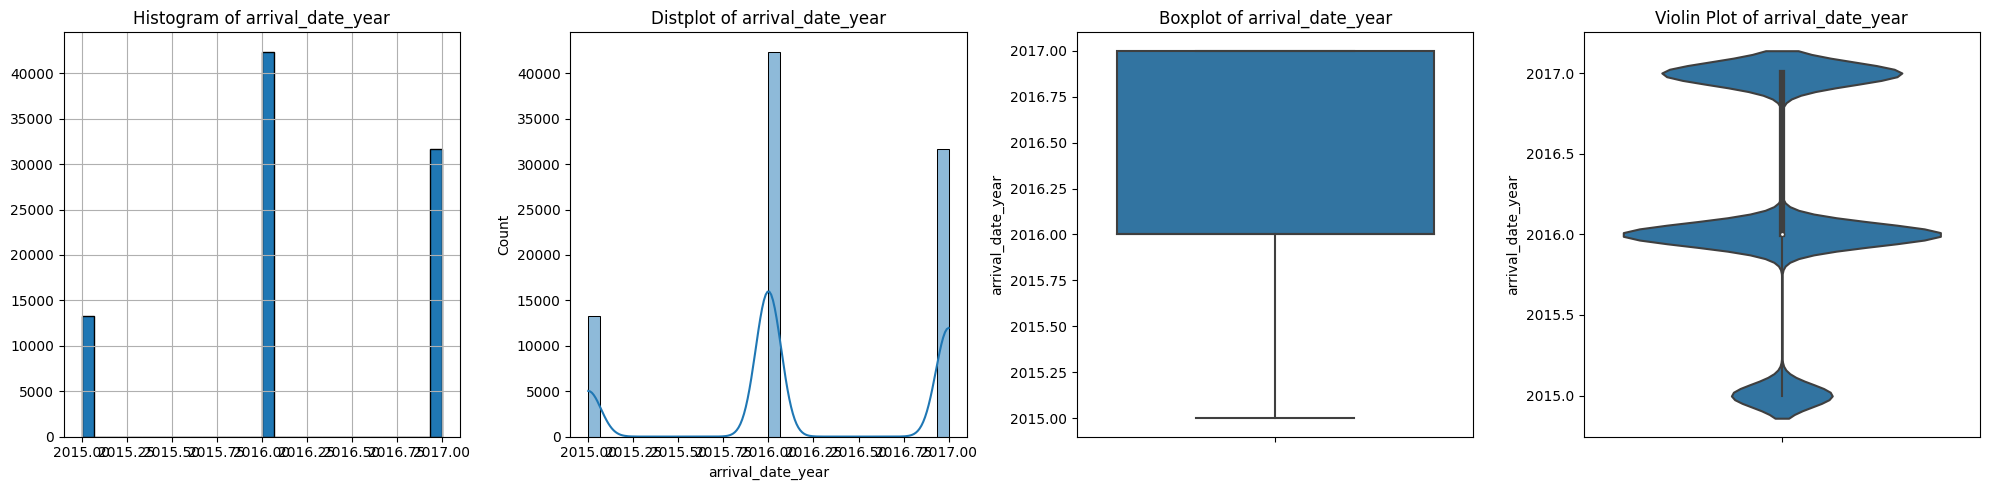

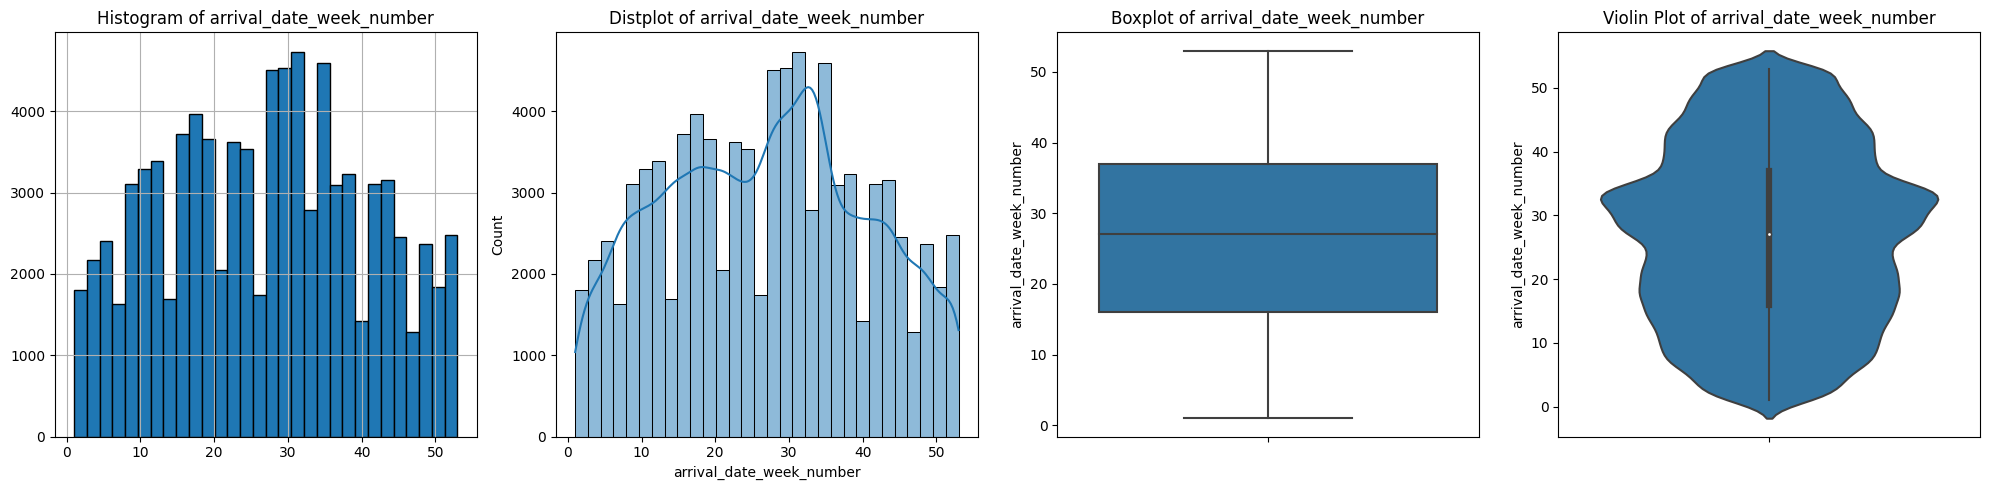

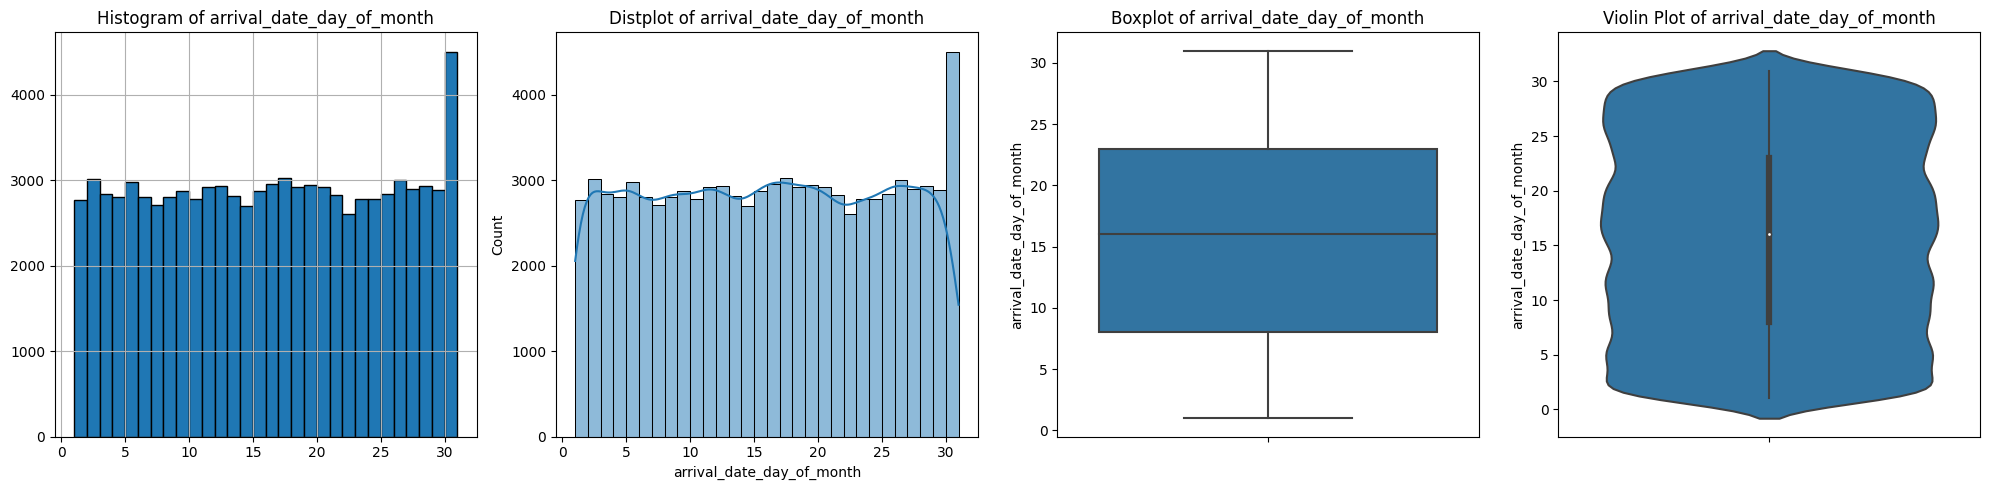

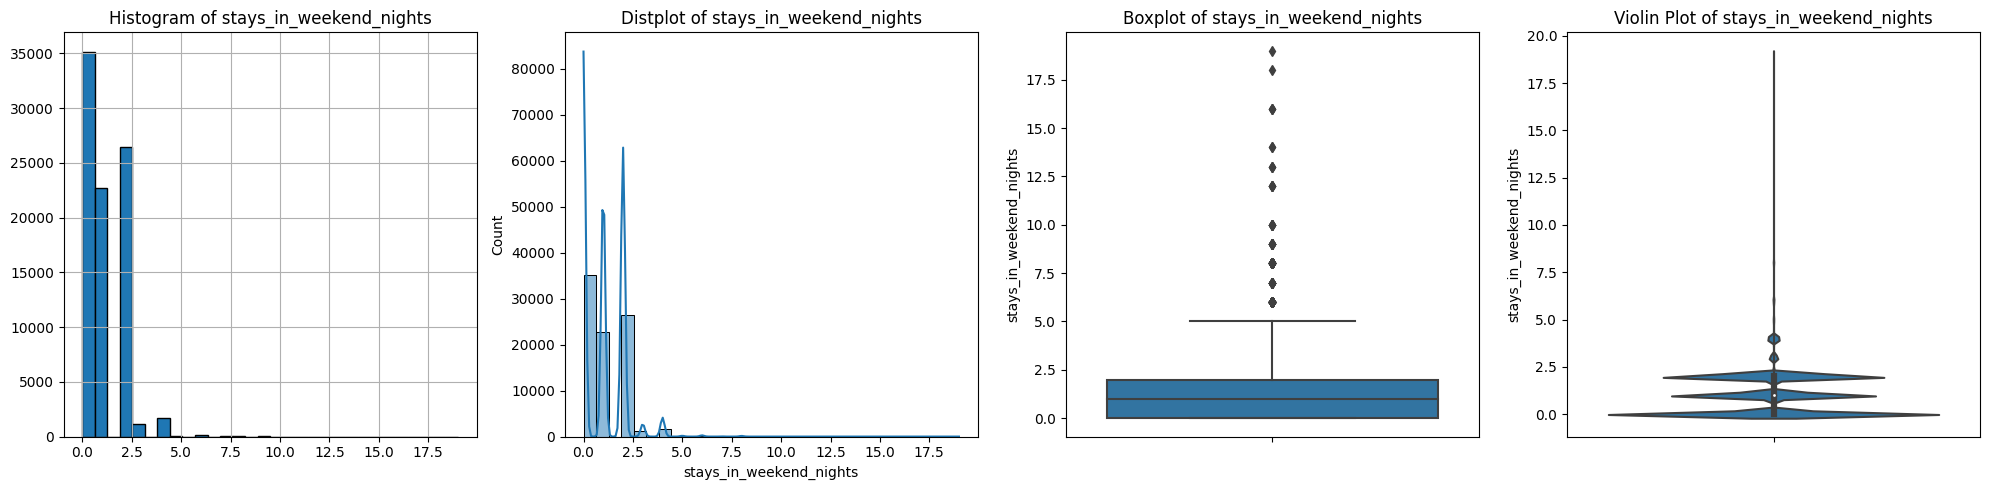

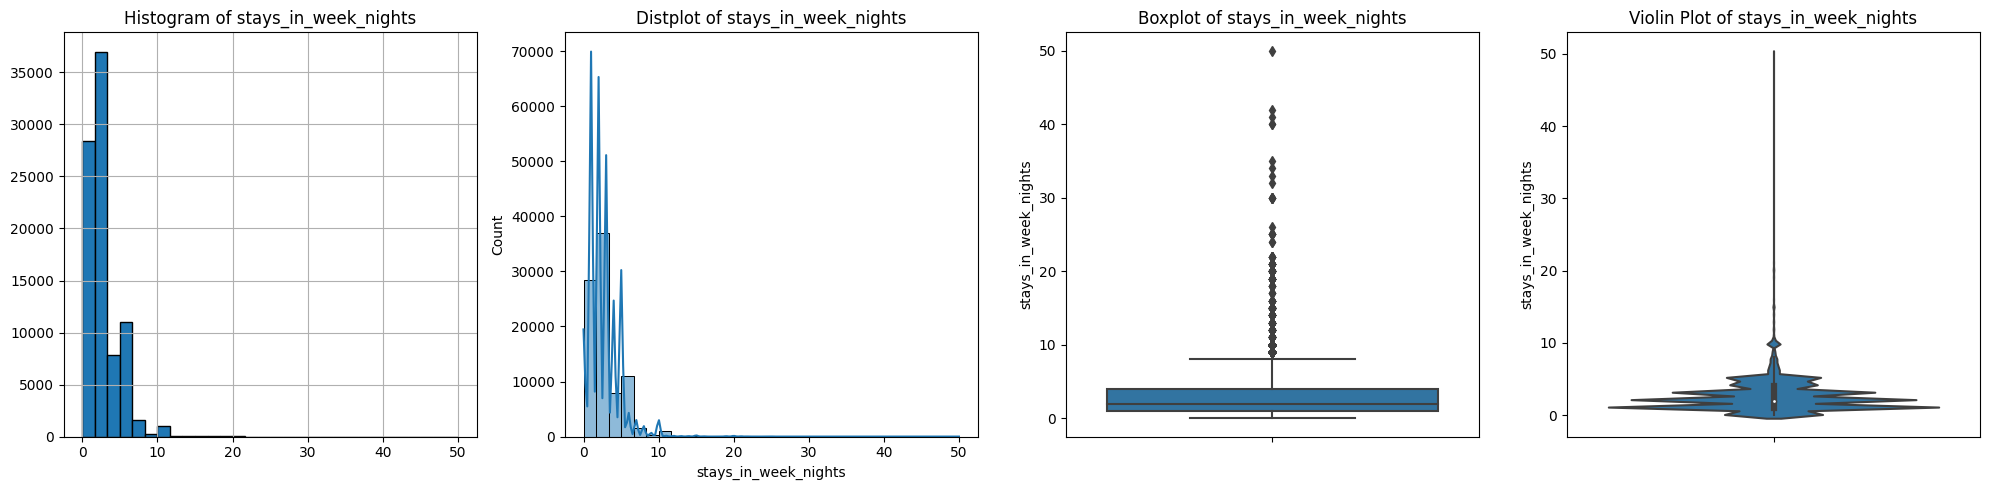

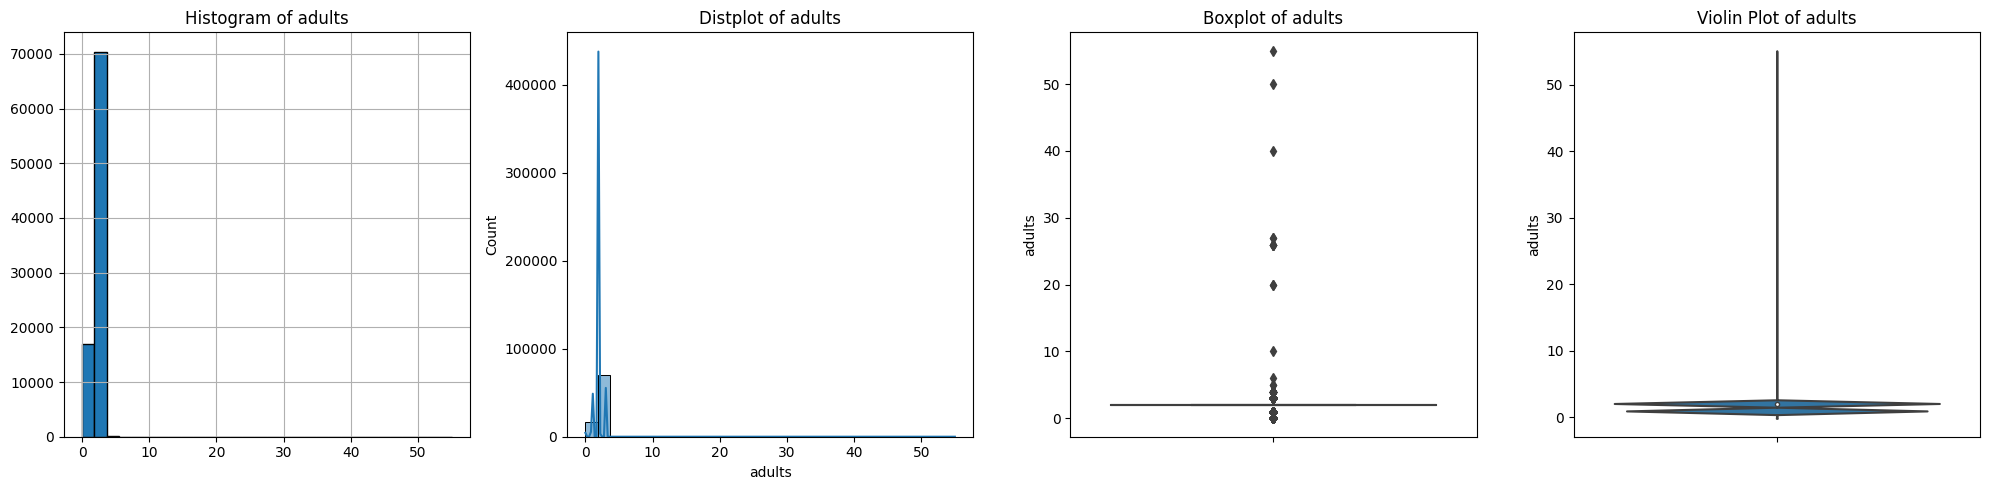

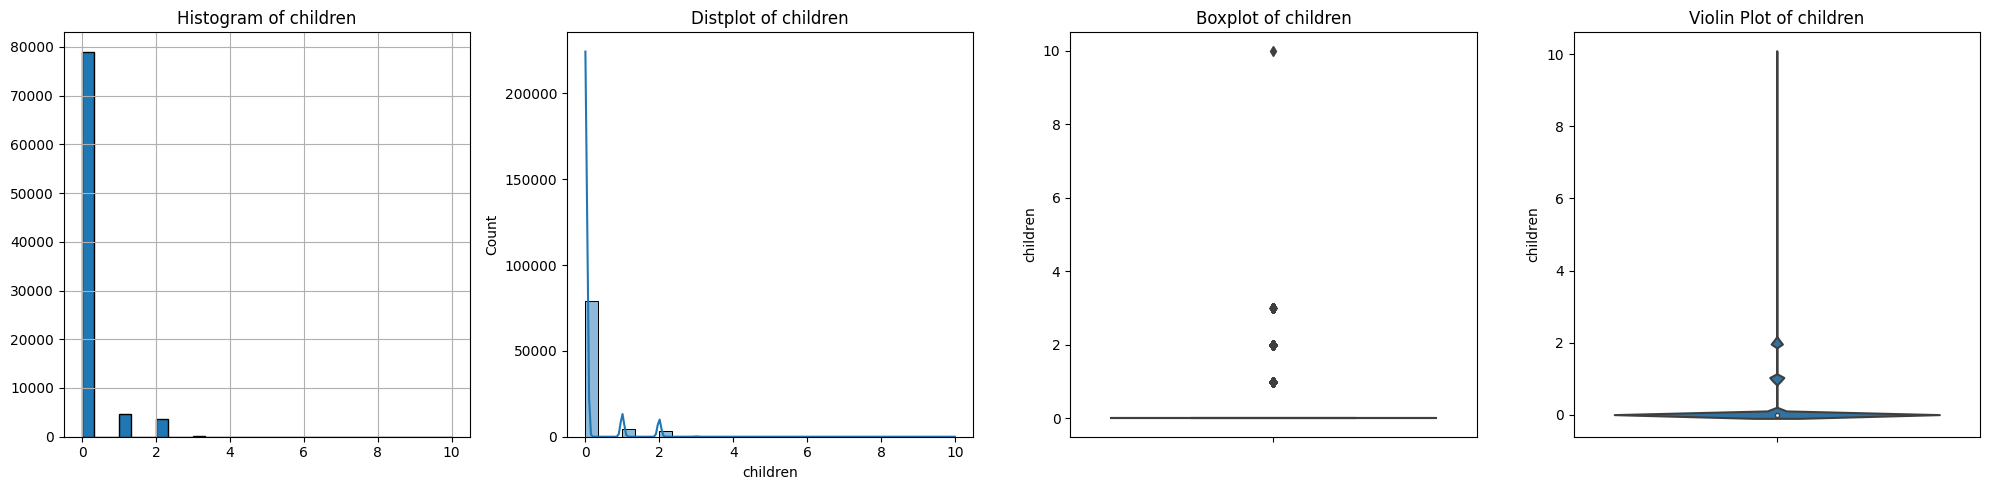

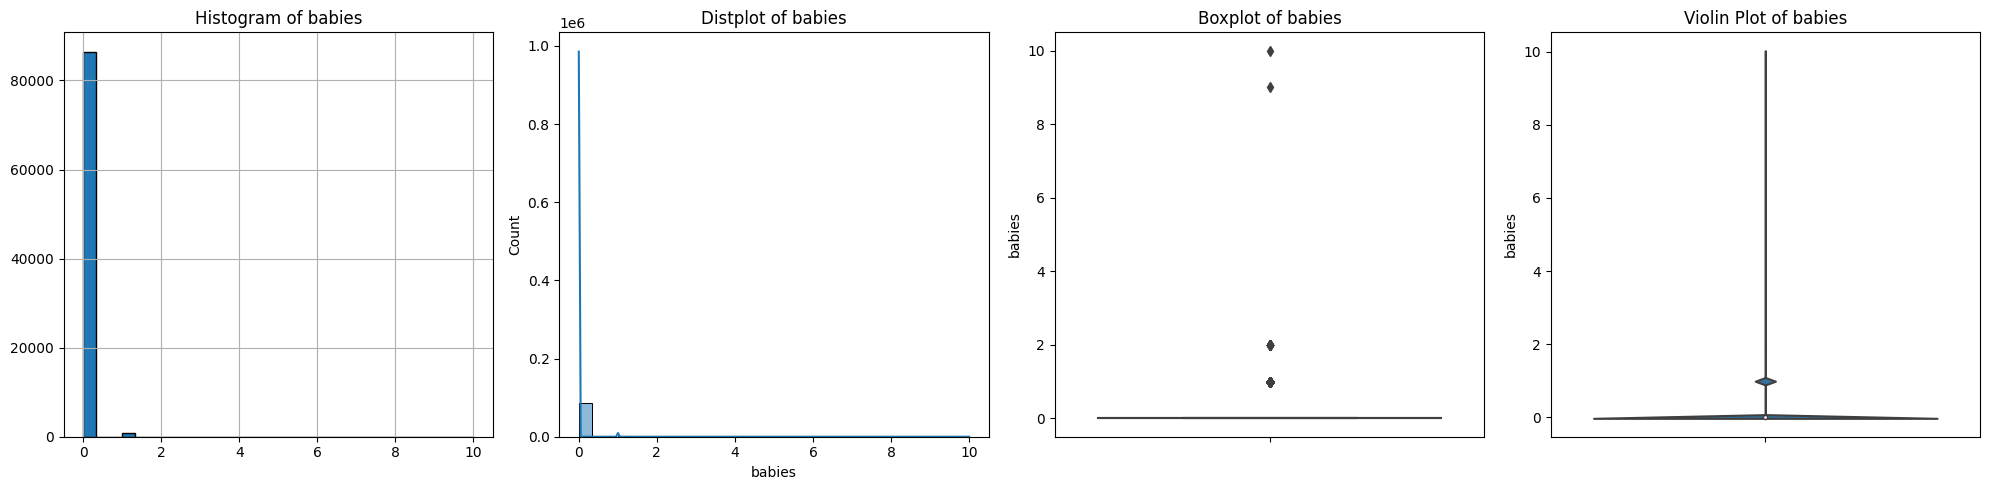

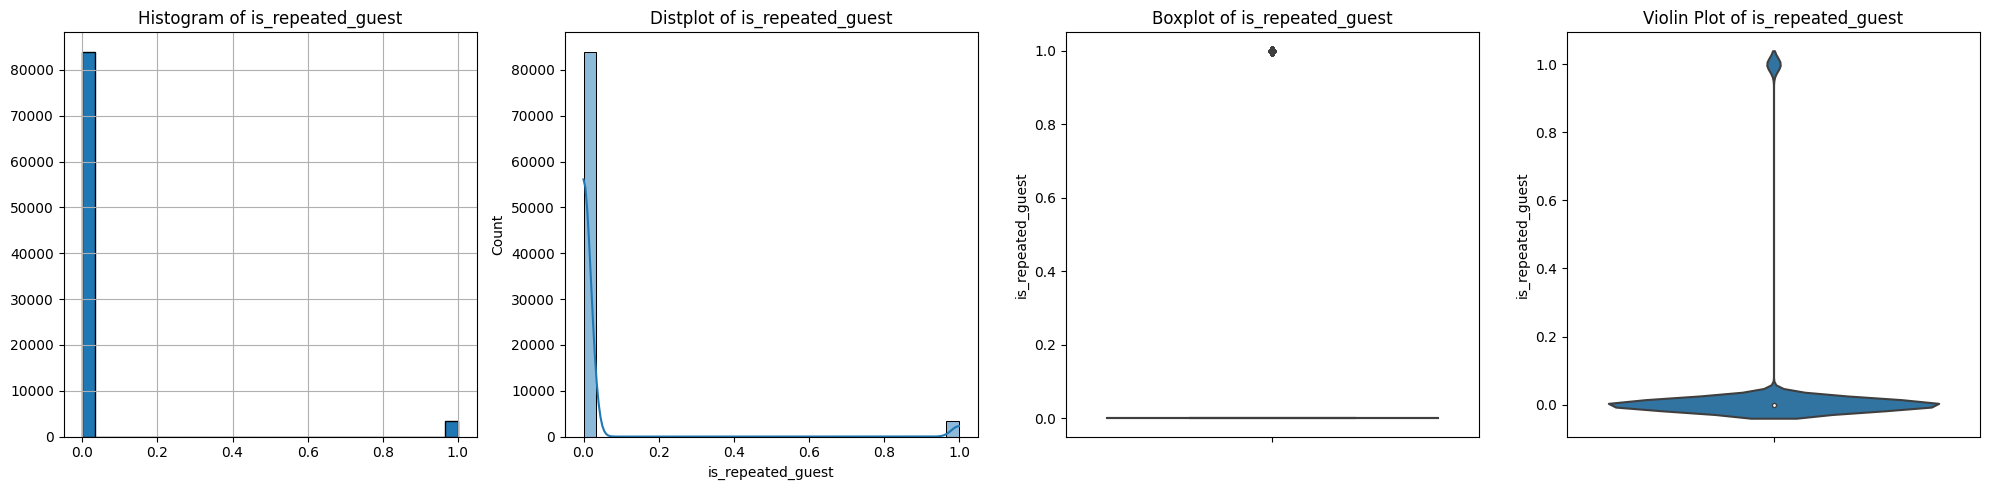

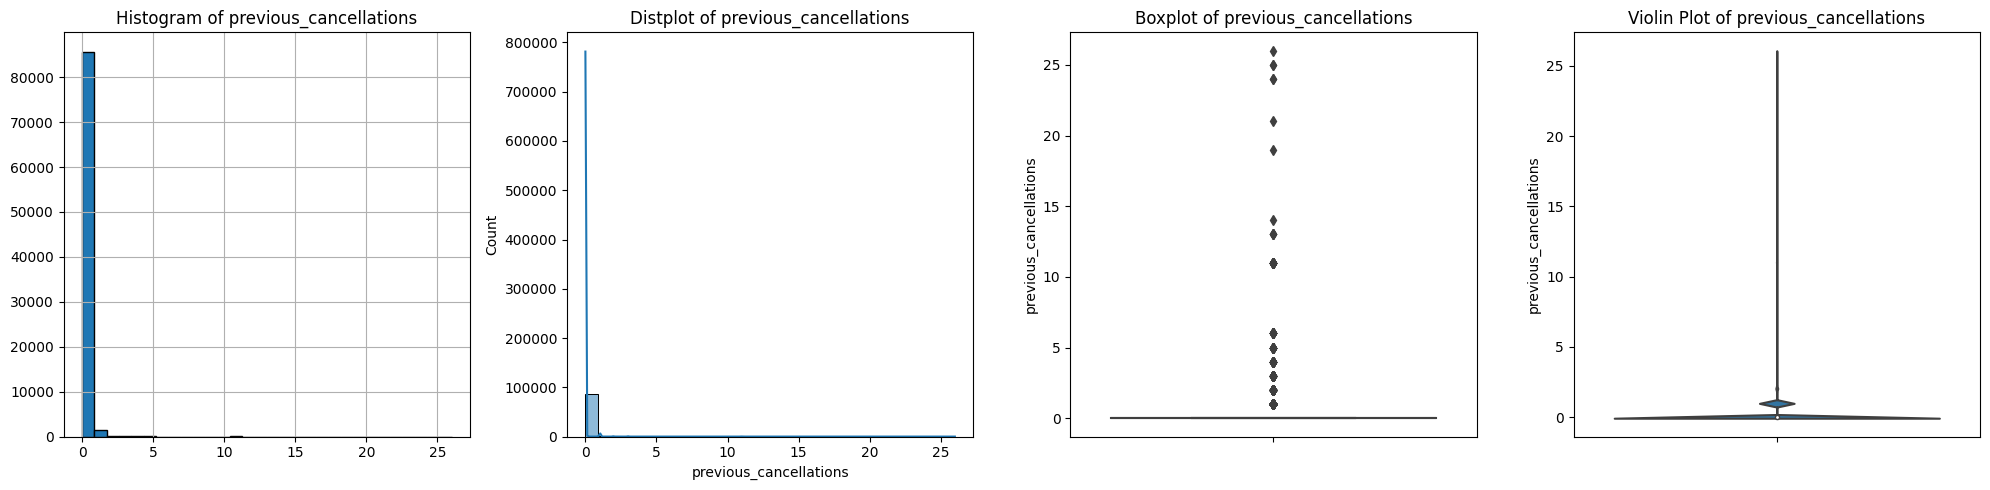

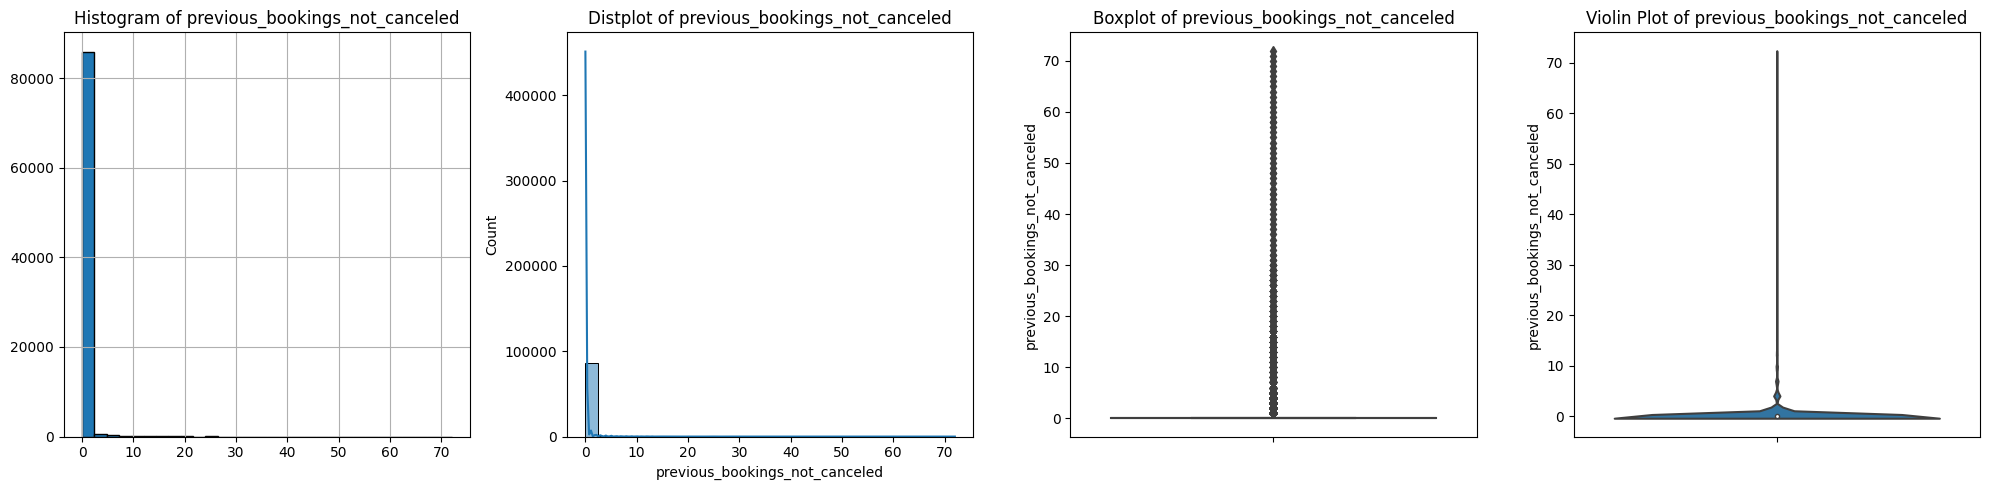

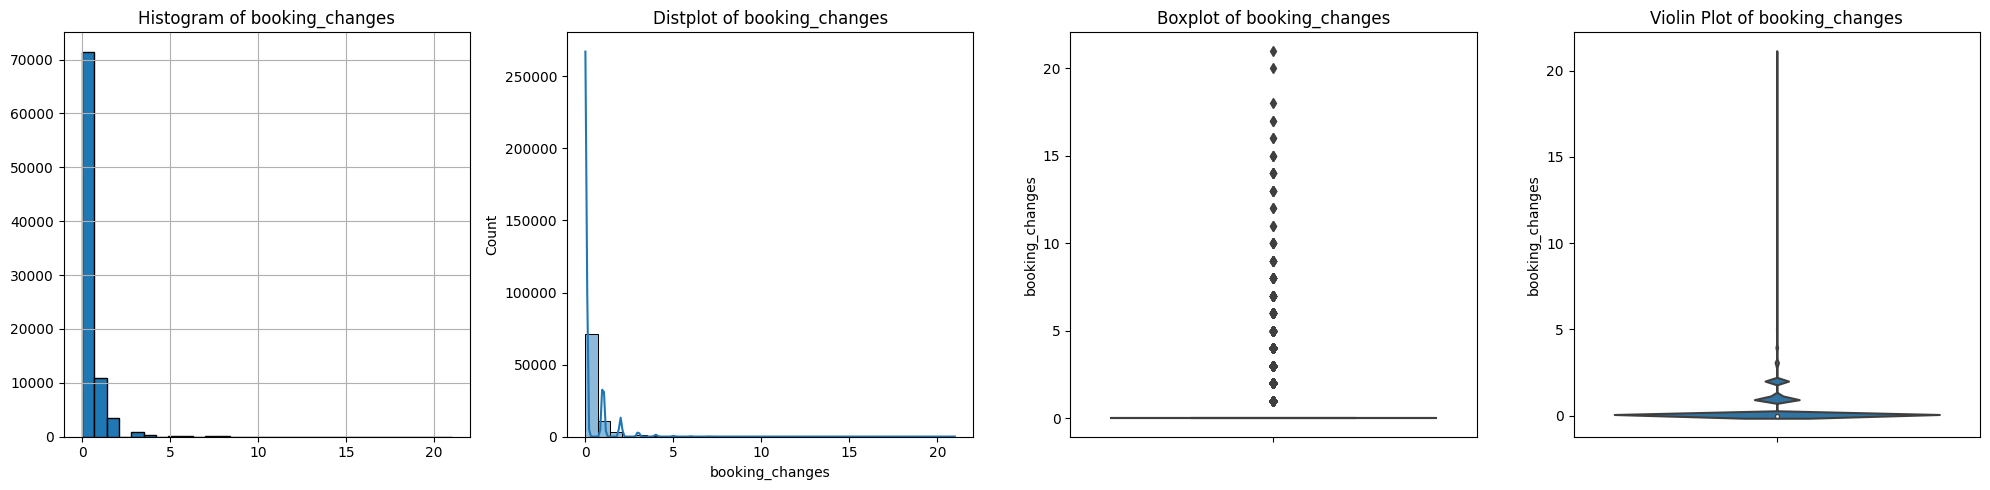

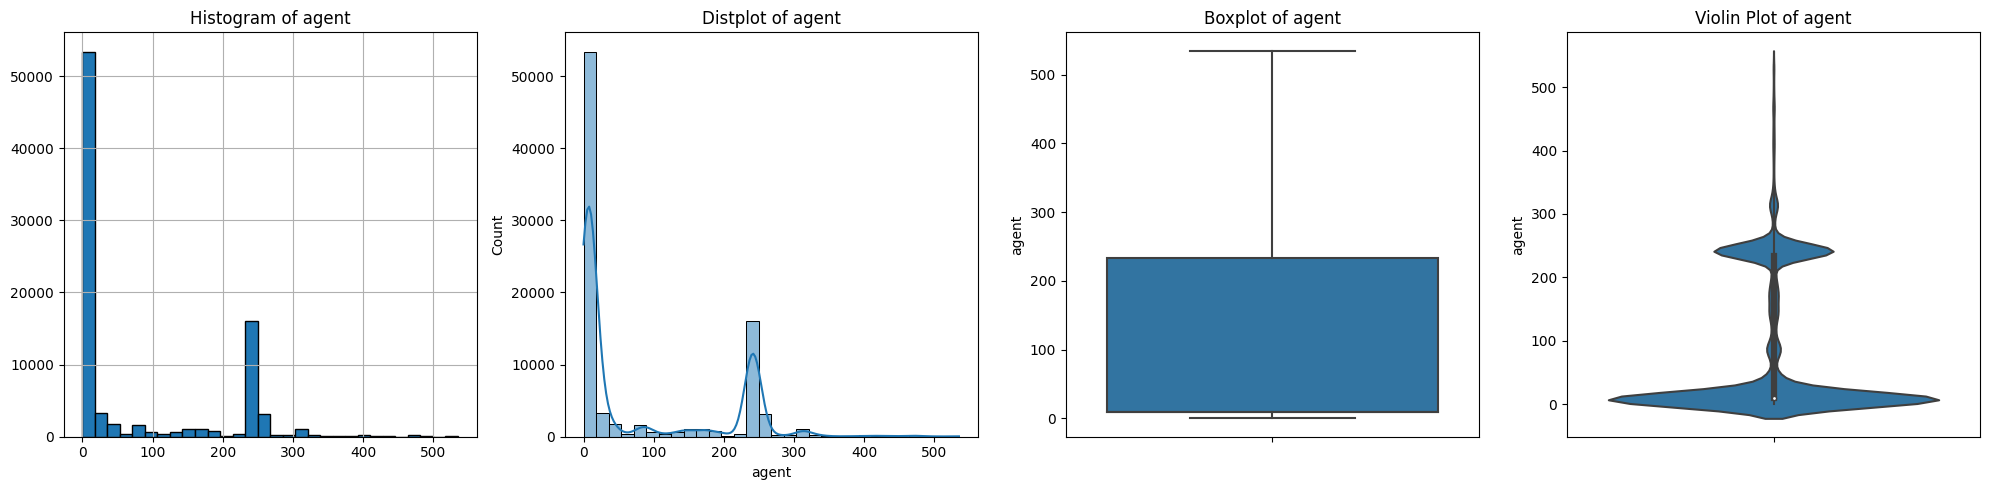

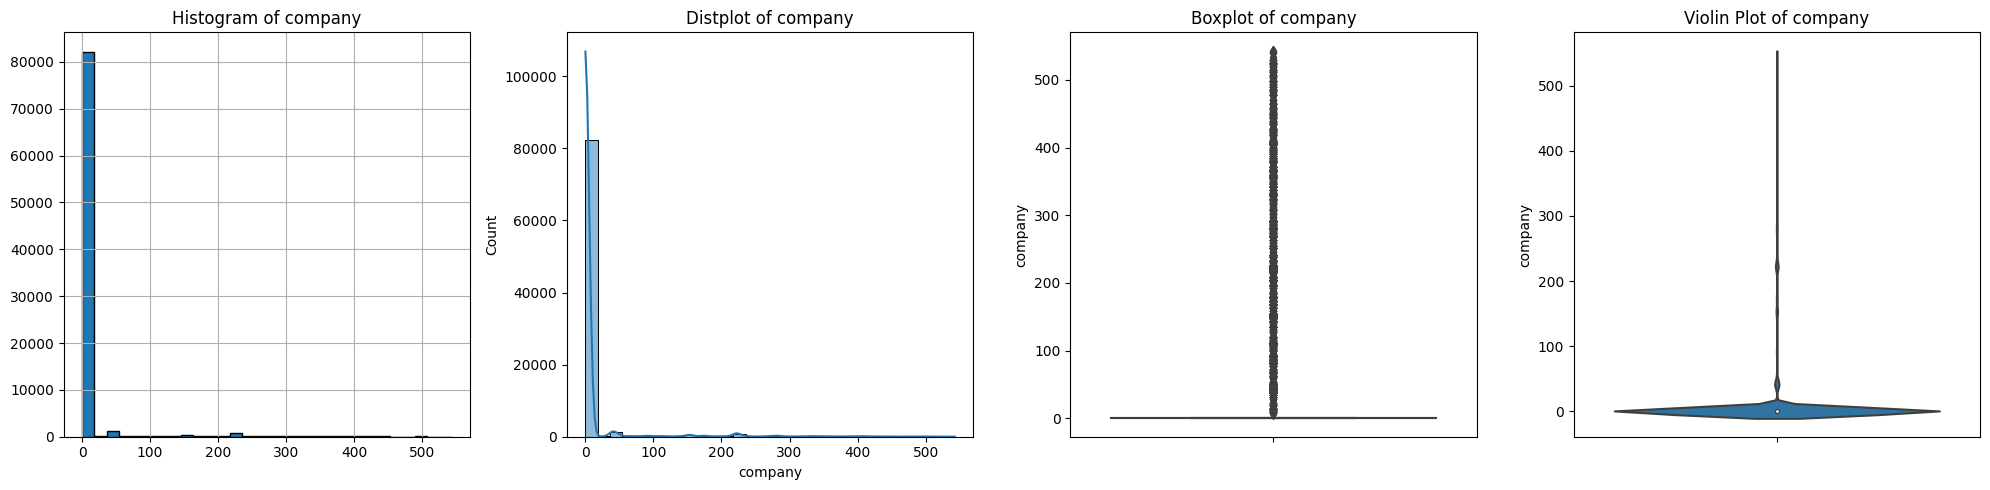

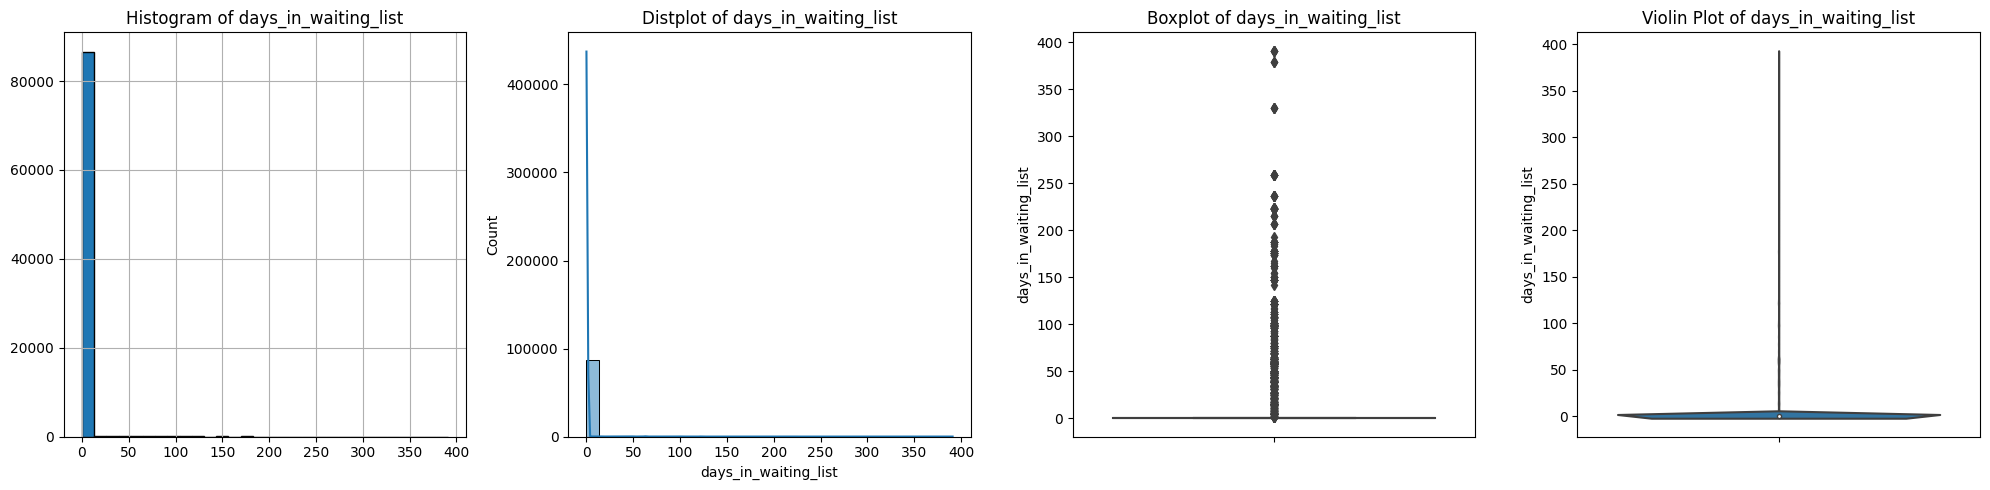

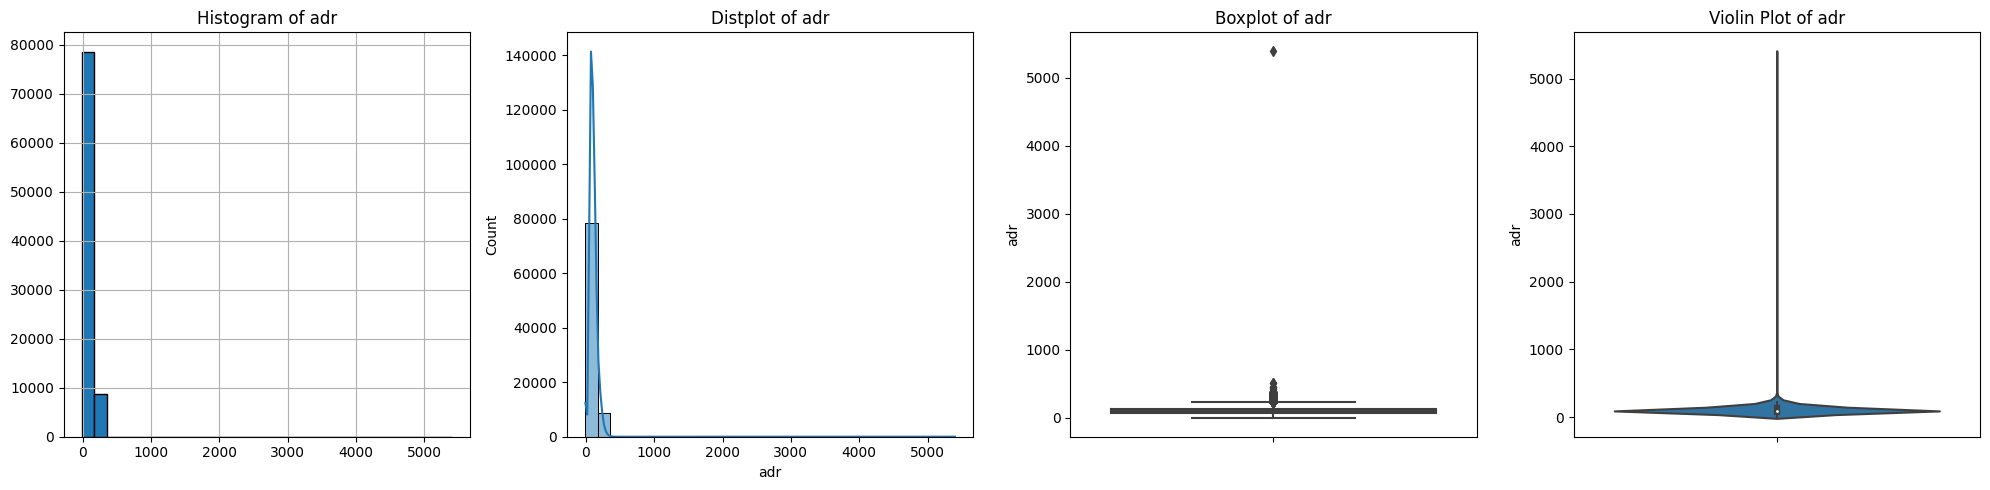

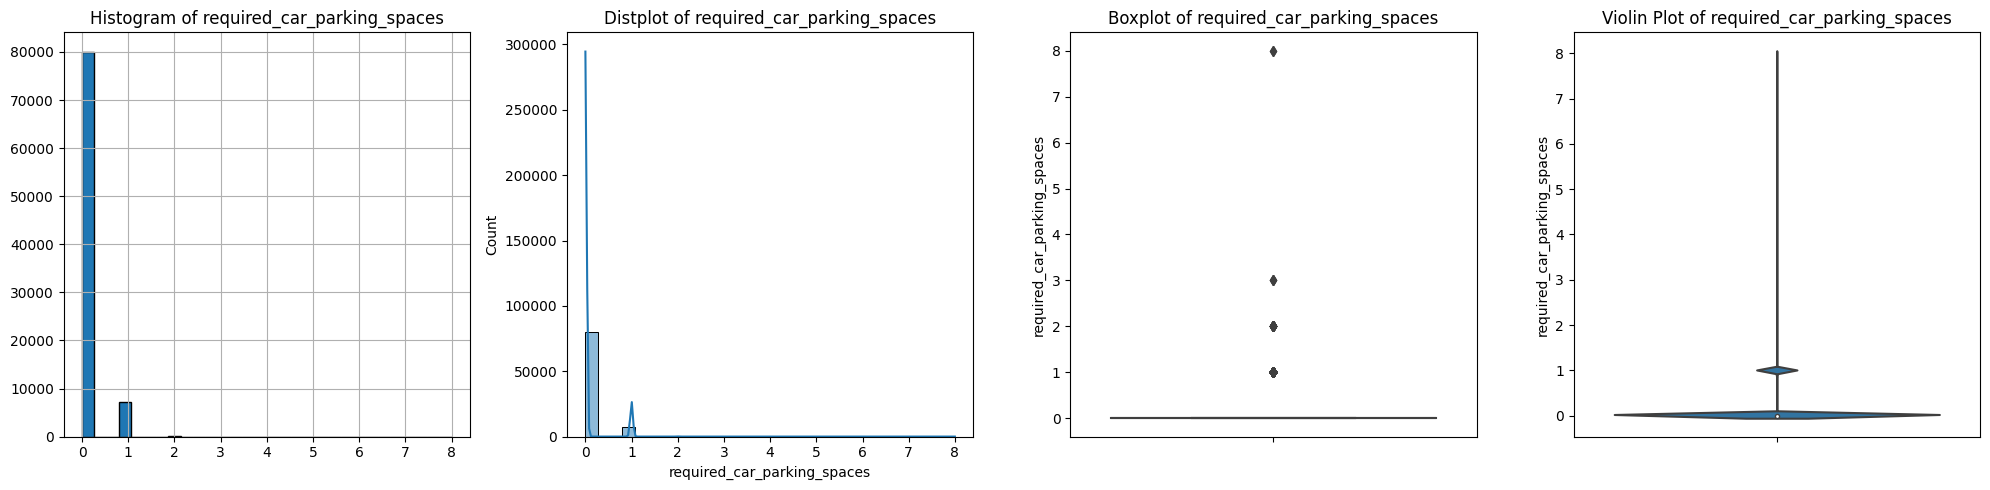

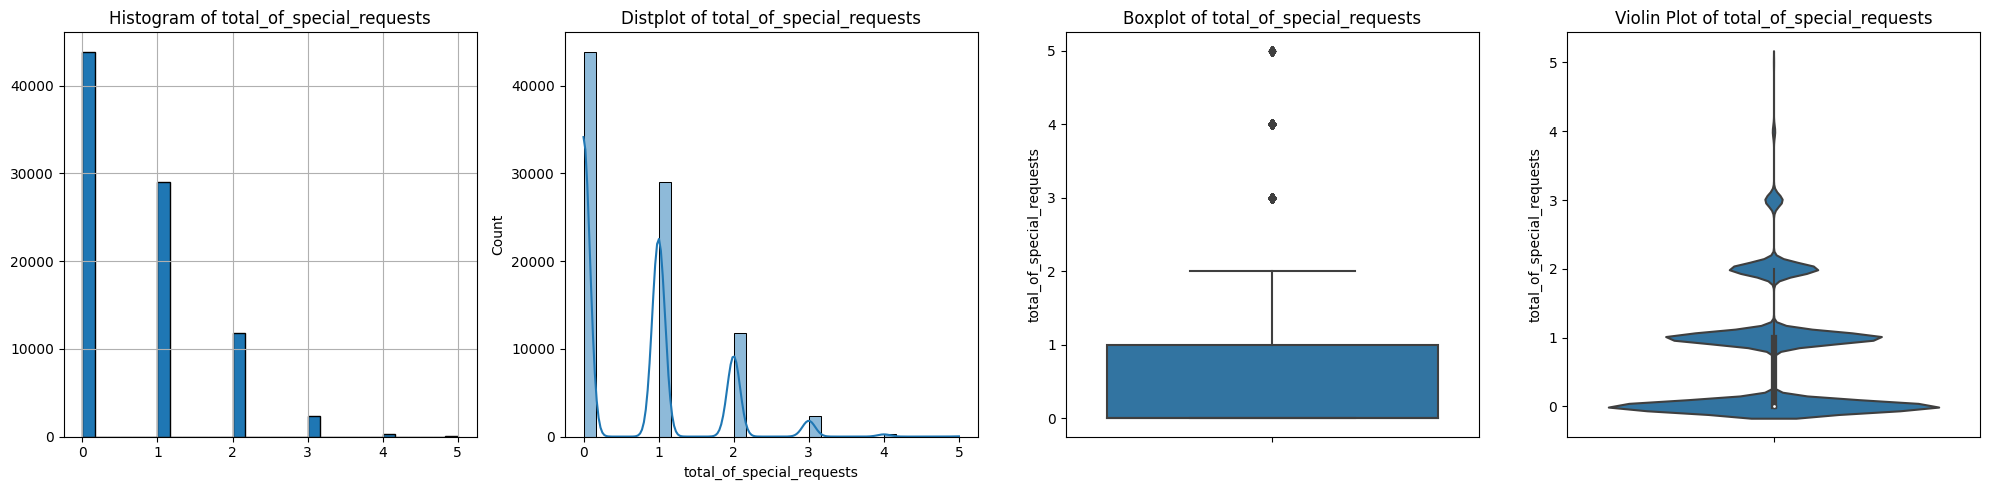

In [32]:
# Plot for each numeric column
for col in df1.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(20, 5))
    
    # Histogram
    plt.subplot(1, 4, 1)
    df1[col].hist(bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    
    # Distplot
    plt.subplot(1, 4, 2)
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Distplot of {col}')
    
    # Boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot of {col}')
    
    # Violin Plot
    plt.subplot(1, 4, 4)
    sns.violinplot(y=df1[col])
    plt.title(f'Violin Plot of {col}')
    
    plt.tight_layout()
    plt.show()

# featue engineering

In [33]:
df1.head()

hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          no        342               2015               July   
1  Resort Hotel          no        737               2015               July   
2  Resort Hotel          no          7               2015               July   
3  Resort Hotel          no         13               2015               July   
4  Resort Hotel          no         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [34]:
df1['family_mumber']=df1['adults']+ df1['babies'] + df1['children']
  
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
df1.shape

(87396, 34)

# Univariate Analysis

### Descriptive Statistics:

In [36]:
df1['lead_time'].agg(['min','max','mean','median','std'])

min         0.000000
max       737.000000
mean       79.891368
median     49.000000
std        86.052325
Name: lead_time, dtype: float64

# What is the distribution of hotel types?

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

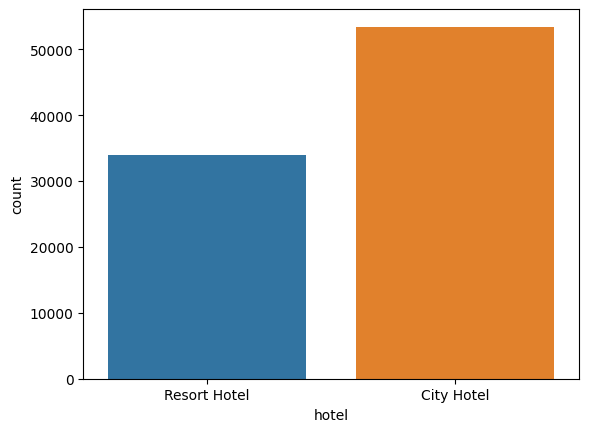

In [37]:
sns.countplot(x=df1['hotel'])
df1['hotel'].value_counts()


# What percentage of bookings were canceled?

In [38]:
canceled_percentage = (df1['is_canceled'].value_counts(normalize=True) * 100)
print(canceled_percentage)

no     72.510184
yes    27.489816
Name: is_canceled, dtype: float64


In [39]:
canceled_percentage = (df1['is_canceled'].value_counts()/df1['is_canceled'].shape * 100)
print(canceled_percentage)

no     72.510184
yes    27.489816
Name: is_canceled, dtype: float64


# What is the distribution of lead times for bookings?

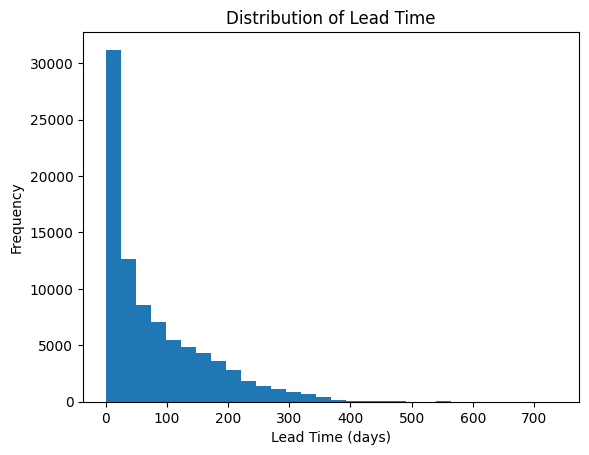

In [40]:
df1['lead_time'].plot(kind='hist', bins=30)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

# What are the most common arrival months?

In [41]:
print(df['arrival_date_month'].value_counts())

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'July'),
  Text(1, 0, 'August'),
  Text(2, 0, 'September'),
  Text(3, 0, 'October'),
  Text(4, 0, 'November'),
  Text(5, 0, 'December'),
  Text(6, 0, 'January'),
  Text(7, 0, 'February'),
  Text(8, 0, 'March'),
  Text(9, 0, 'April'),
  Text(10, 0, 'May'),
  Text(11, 0, 'June')])

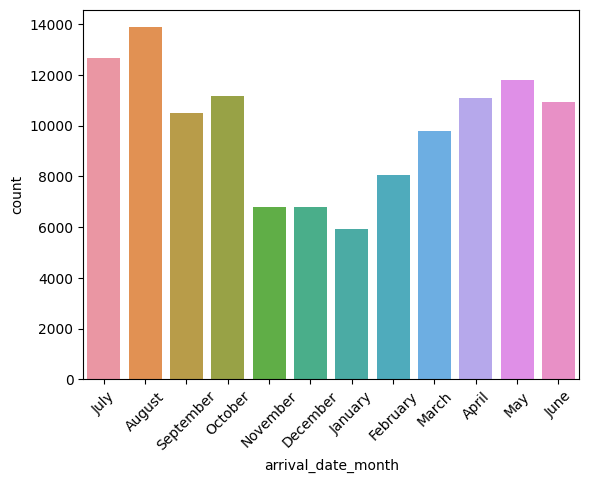

In [42]:
sns.countplot(x=df['arrival_date_month'])
plt.xticks(rotation=45)

# What is the average number of stays in weekend nights?

In [43]:
df1['stays_in_weekend_nights'].mean()

1.005263398782553

# What is the average number of adults per booking?

In [44]:
df1['adults'].mean()

1.8757952309030161

# What are the common customer types?

In [45]:
df1['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

# What is the average ADR (Average Daily Rate)?

In [46]:
df1['adr'].mean()

106.33724644148474

# How many bookings have required car parking spaces?

In [47]:
df['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

# What is the distribution of special requests?

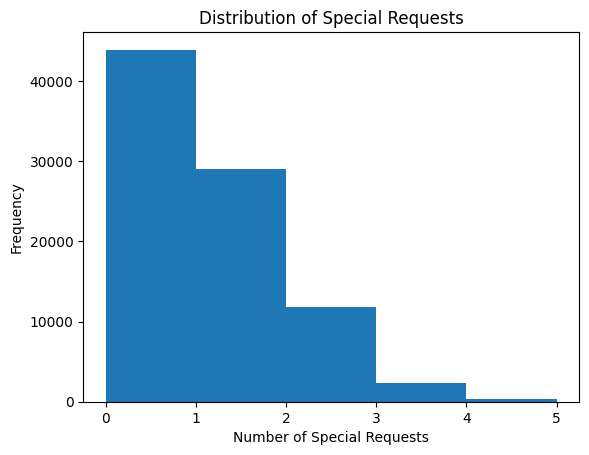

In [48]:
df1['total_of_special_requests'].plot(kind='hist', bins=5)
plt.title('Distribution of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Frequency')
plt.show()

In [49]:
# return highest bookings made by agents
highest_bookings= df1.groupby(['agent'])['agent'].agg({'count'})
highest_bookings

count
agent       
0.0    12193
1.0     1232
2.0      129
3.0      363
4.0       18
...      ...
510.0      1
526.0     10
527.0     25
531.0     60
535.0      3

[334 rows x 1 columns]

In [50]:
# return highest bookings made by agents
highest_bookings= df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

In [51]:
highest_bookings

agent  Most_Bookings
9      9.0          28759
174  240.0          13028
0      0.0          12193
14    14.0           3349
7      7.0           3300
..     ...            ...
213  295.0              1
193  265.0              1
161  213.0              1
299  444.0              1
300  446.0              1

[334 rows x 2 columns]

# Which year had the highest bookings?

Text(0.5, 1.0, 'Year Wise bookings')

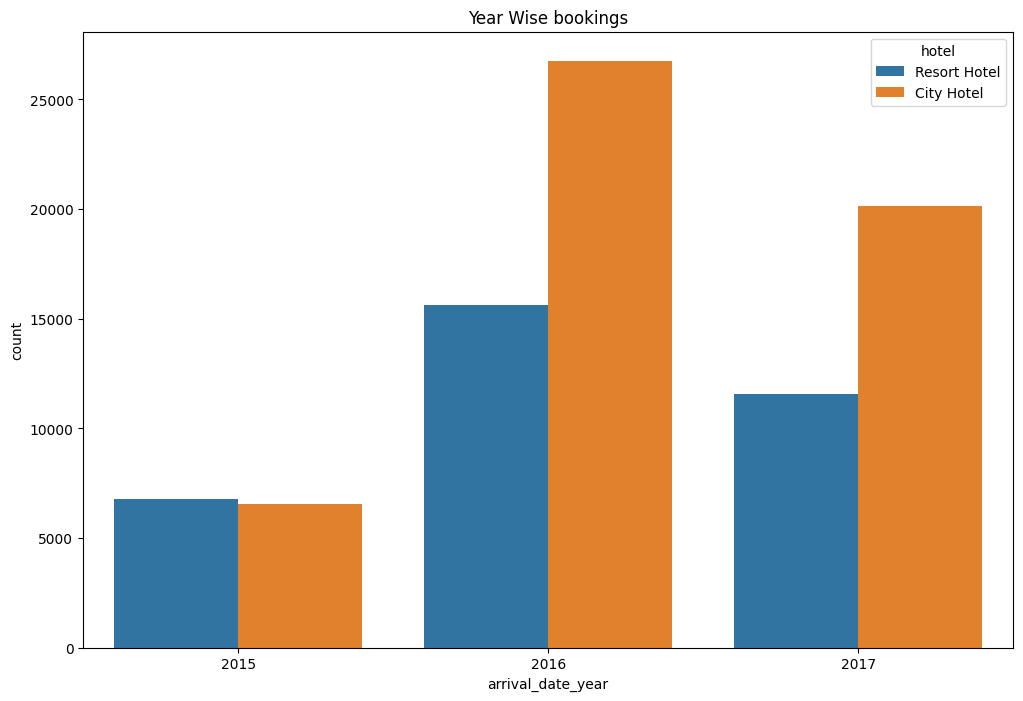

In [52]:

plt.figure(figsize=(12,8))

sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title("Year Wise bookings")

2016 had the higest bookings.
2015 had less 7000 bookings.
overall City hotels had the most of the bookings.

# Bivariate and Multivariate Analysis

In [53]:
grup_by_hotel=df1.groupby('hotel')

# Which Hotel type has the highest ADR?

In [54]:
highest_adr_hotel = df1.groupby('hotel')['adr'].mean().idxmax()
highest_adr_hotel

'City Hotel'

In [55]:
highest_adr_value = df.groupby('hotel')['adr'].mean().max()
highest_adr_value

105.30446539770578

<AxesSubplot:title={'center':'Avg ADR of each Hotel type'}, xlabel='hotel', ylabel='adr'>

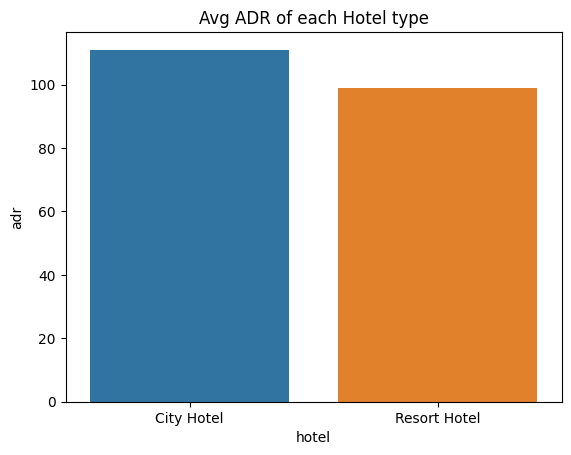

In [56]:
#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

# Which hotel has longer waiting time?

In [57]:
#groupping by hoetl and takin mean of days in waiting list
waiting_time_df=df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
waiting_time_df

hotel  days_in_waiting_list
0    City Hotel              1.020233
1  Resort Hotel              0.323834

<AxesSubplot:xlabel='hotel', ylabel='days_in_waiting_list'>

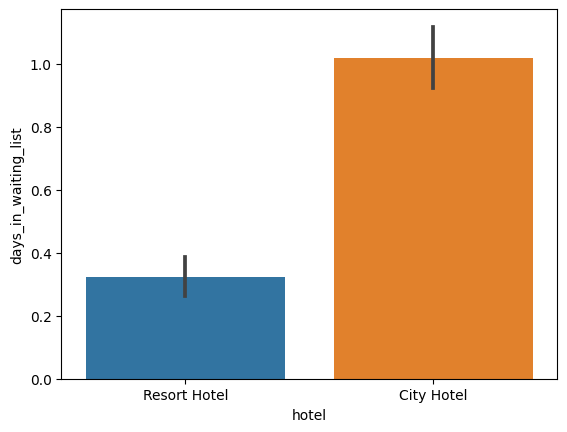

In [58]:
sns.barplot(x=df1['hotel'],y=df1['days_in_waiting_list'])

In [59]:
#!pip install psycopg2 SQLAlchemy

In [60]:
#pip install pandas==1.3.3 sqlalchemy==1.4.22

  Using cached pandas-1.3.3-cp37-cp37m-win_amd64.whl.metadata (11 kB)
  Using cached SQLAlchemy-1.4.22-cp37-cp37m-win_amd64.whl.metadata (9.4 kB)
Using cached pandas-1.3.3-cp37-cp37m-win_amd64.whl (10.0 MB)
Using cached SQLAlchemy-1.4.22-cp37-cp37m-win_amd64.whl (1.5 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.23
    Uninstalling SQLAlchemy-1.3.23:
      Successfully uninstalled SQLAlchemy-1.3.23
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [61]:
#pip install pandas sqlalchemy psycopg2-binary


  Using cached psycopg2_binary-2.9.9-cp37-cp37m-win_amd64.whl.metadata (4.5 kB)
Using cached psycopg2_binary-2.9.9-cp37-cp37m-win_amd64.whl (1.2 MB)


In [62]:
#pip install --upgrade pandas sqlalchemy

  Using cached pandas-1.3.5-cp37-cp37m-win_amd64.whl.metadata (12 kB)
  Using cached SQLAlchemy-2.0.31-cp37-cp37m-win_amd64.whl.metadata (9.9 kB)
Using cached pandas-1.3.5-cp37-cp37m-win_amd64.whl (10.0 MB)
Using cached SQLAlchemy-2.0.31-cp37-cp37m-win_amd64.whl (2.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.22
    Uninstalling SQLAlchemy-1.4.22:
      Successfully uninstalled SQLAlchemy-1.4.22
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.3
    Uninstalling pandas-1.3.3:
      Successfully uninstalled pandas-1.3.3
Note: you may need to restart the kernel to use updated packages.


In [63]:
#pip install --upgrade pandas sqlalchemy

In [64]:
#pip install sqlalchemy==1.3.23

  Using cached SQLAlchemy-1.3.23-cp37-cp37m-win_amd64.whl.metadata (7.9 kB)
Using cached SQLAlchemy-1.3.23-cp37-cp37m-win_amd64.whl (1.2 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.31
    Uninstalling SQLAlchemy-2.0.31:
      Successfully uninstalled SQLAlchemy-2.0.31
Note: you may need to restart the kernel to use updated packages.


In [65]:
from sqlalchemy import create_engine
import psycopg2

In [66]:
DATABASE_TYPE = 'postgresql'
DBAPI = 'psycopg2'
ENDPOINT = 'localhost'
USER = 'postgres'
PASSWORD = 'root'
PORT = 5432
DATABASE = 'hotal_eda'

In [67]:
# Creating the connection string
connection_string = f"{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{ENDPOINT}:{PORT}/{DATABASE}"
# Creating the engine
engine = create_engine(connection_string)

In [68]:
try:
    # Create engine
    engine = create_engine(connection_string)
    
    # Try to connect
    with engine.connect() as conn:
        print("Connection to PostgreSQL successful!")
        
    # If connection successful, you can execute further queries here
    
except Exception as e:
    print(f"Error: {e}")

Connection to PostgreSQL successful!


In [69]:
df2=pd.read_csv("amazon_products.csv")

In [70]:
df2.head()

asin                                              title  \
0  B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...   
1  B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...   
2  B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...   
3  B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...   
4  B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/815dLQKYIY...   
1  https://m.media-amazon.com/images/I/81bQlm7vf6...   
2  https://m.media-amazon.com/images/I/71EA35zvJB...   
3  https://m.media-amazon.com/images/I/91k6NYLQyI...   
4  https://m.media-amazon.com/images/I/61NJoaZcP9...   

                             productURL  stars  reviews   price  listPrice  \
0  https://www.amazon.com/dp/B014TMV5YE    4.5        0  139.99       0.00   
1  https://www.amazon.com/dp/B07GDLCQXV    4.5        0  169.99     209.99   
2  https://www.amazon.com/dp/B07XSCCZYG    4.6        0  365.49     429.99   
3  https://www.amazon.com/dp/B08MVFKGJM    4.6        0  291.59     354.37   
4  https://www.amazon.com/dp/B01DJLKZBA    4.5        0  174.99     309.99   

   category_id  isBestSeller  boughtInLastMonth  
0          104         False               2000  
1          104         False               1000  
2          104         False                300  
3          104         False                400  
4          104         False                400

In [71]:
table_name = 'hotel'
df1.to_sql(table_name, con=engine, if_exists='replace', index=False)

In [72]:
df1.to_sql('hotel', con=engine, if_exists='replace', index=False, schema='public')

In [73]:
table_name = "hotel"
query = f'SELECT * FROM {table_name}'
df_from_sql = pd.read_sql(query, con=engine)

In [74]:
df_from_sql.head()

hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          no        342               2015               July   
1  Resort Hotel          no        737               2015               July   
2  Resort Hotel          no          7               2015               July   
3  Resort Hotel          no         13               2015               July   
4  Resort Hotel          no         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...      0.0   
1                        0                     0       2  ...      0.0   
2                        0                     1       1  ...      0.0   
3                        0                     1       1  ...      0.0   
4                        0                     2       2  ...      0.0   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                     0     Transient   0.0                           0   
1                     0     Transient   0.0                           0   
2                     0     Transient  75.0                           0   
3                     0     Transient  75.0                           0   
4                     0     Transient  98.0                           0   

  total_of_special_requests  reservation_status  reservation_status_date  \
0                         0           Check-Out                 7/1/2015   
1                         0           Check-Out                 7/1/2015   
2                         0           Check-Out                 7/2/2015   
3                         0           Check-Out                 7/2/2015   
4                         1           Check-Out                 7/3/2015   

   family_mumber total_stay  
0            2.0          0  
1            2.0          0  
2            1.0          1  
3            1.0          1  
4            2.0          2  

[5 rows x 34 columns]